<a href="https://colab.research.google.com/github/lauben2001/Market_data/blob/main/Market_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Packages & Initis**

In [ ]:
!pip install fredapi > /dev/null
!pip install joypy > /dev/null
!pip install yahoo_fin > /dev/null
!pip install FPDF > /dev/null
!pip install yfinance > /dev/null
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [ ]:
import joypy as joypy
import random
from dateutil.relativedelta import relativedelta
import datetime
from datetime import datetime
from numpy import random as np_random
from math import e
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from dateutil.relativedelta import relativedelta
import sys
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import randn
from scipy import array, newaxis
from fredapi import Fred
from yahoo_fin import options as op
from pandas_datareader.data import Options
from dateutil.parser import parse
from datetime import datetime
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
from functools import partial
from scipy import optimize
from scipy.interpolate import griddata
import sys
from scipy.stats import norm
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from numpy.random import randn
from scipy import array, newaxis
from mpl_toolkits import mplot3d
import yahoo_fin.stock_info as si
import matplotlib.colors as mcolors

In [ ]:
from pylab import title, figure, xlabel, ylabel, xticks, bar, legend, axis, savefig
from fpdf import FPDF

# **US Data**

In [ ]:
fred_key = "53917613661bf2de6cc1184fed44e685"
fred= Fred(api_key = fred_key)

plt.style.use("fivethirtyeight")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

Funktion, die alle Keys in einer Liste abfragt und zusammen in einem Dataframe mergt

In [ ]:
def fred_query(list_name, dict_name, start):
  all_results = []
  #Durch Liste loopen, alle Zeitreihen aus FRED ziehen & in df temporär speichern
  for myid in list_name:
    results = fred.get_series(myid,start)
    results = results.to_frame(name=myid)
    all_results.append(results)
  #Alle dataframes zusammenpacken und dann gemäß Dict umbennen
  df_fred_results = pd.concat(all_results,axis =1)
  df_fred_results.columns= [dict_name[c] for c in df_fred_results.columns]

  return df_fred_results

#Überlegung wie ich am besten das einbaue! Vermutlich wird es custom für die Einzelnen Kategorien
#df_test = fred.get_series("GDP", "01-01-2015")

### Collection of multiple time series

In [ ]:
#EQUITY
equity_id = ["SP500"]
equity_dict = {"SP500": "S&P500"}

#CRYPTO
crypto_id= ["CBBTCUSD","CBETHUSD"]
crypto_dict = {"CBBTCUSD": "Bitcoin_Price",
               "CBETHUSD":"Etherium_Price"}


#FIXED INCOME
yield_curve_id = ["DGS30","DGS20","DGS10","DGS7","DGS5","DGS3","DGS1","DGS6MO","DGS3MO","DGS1MO","DFII30","DFII20","DFII10","DFII7","DFII5"]
yield_curve_dict = {"DGS30":"US_Treasury_Yield_30Y",
                    "DGS20":"US_Treasury_Yield_20Y",
                    "DGS10":"US_Treasury_Yield_10Y",
                    "DGS7":"US_Treasury_Yield_7Y",
                    "DGS5":"US_Treasury_Yield_5Y",
                    "DGS3":"US_Treasury_Yield_3Y",
                    "DGS1":"US_Treasury_Yield_1Y",
                    "DGS6MO":"US_Treasury_Yield_6MO",
                    "DGS3MO":"US_Treasury_Yield_3MO",
                    "DGS1MO":"US_Treasury_Yield_1MO",
                    "DFII30":"US_Treasury_Yield_30Y_Inflation_Indexed",
                    "DFII20":"US_Treasury_Yield_20Y_Inflation_Indexed",
                    "DFII10":"US_Treasury_Yield_10Y_Inflation_Indexed",
                    "DFII7":"US_Treasury_Yield_7Y_Inflation_Indexed",
                    "DFII5":"US_Treasury_Yield_5Y_Inflation_Indexed"}

ICE_Bofa_EUR_id = ["BAMLHE00EHYIOAS","BAMLHE00EHYITRIV","BAMLHE00EHYISYTW"]
ICE_Bofa_EUR_dict = {"BAMLHE00EHYIOAS":"Euro_High_Yield_OAS",
                      "BAMLHE00EHYITRIV":"Euro_High_Yield_TR_Index",
                      "BAMLHE00EHYISYTW":"Euro_High_Yield_YTW",}
ICE_Bofa_USD_id = ["BAMLHYH0A0HYM2TRIV","BAMLH0A0HYM2","BAMLH0A0HYM2SYTW","BAMLCC0A0CMTRIV","BAMLC0A0CM","BAMLC0A0CMSYTW","BAMLCC0A1AAATRIV","BAMLC0A1CAAA","BAMLC0A1CAAASYTW","BAMLCC0A2AATRIV","BAMLC0A2CAA","BAMLC0A2CAASYTW","BAMLCC0A3ATRIV","BAMLC0A3CA","BAMLC0A3CASYTW","BAMLCC0A4BBBTRIV","BAMLC0A4CBBB","BAMLC0A4CBBBSYTW","BAMLHYH0A1BBTRIV","BAMLH0A1HYBB","BAMLH0A1HYBBSYTW","BAMLHYH0A2BTRIV","BAMLH0A2HYB","BAMLH0A2HYBSYTW","BAMLHYH0A3CMTRIV","BAMLH0A3HYC","BAMLH0A3HYCSYTW","BAMLCC1A013YTRIV","BAMLC1A0C13Y","BAMLC1A0C13YSYTW","BAMLCC2A035YTRIV","BAMLC2A0C35Y","BAMLC2A0C35YSYTW","BAMLCC3A057YTRIV","BAMLC3A0C57Y","BAMLC3A0C57YSYTW","BAMLCC4A0710YTRIV","BAMLC4A0C710Y","BAMLC4A0C710YSYTW","BAMLCC7A01015YTRIV","BAMLC7A0C1015Y","BAMLC7A0C1015YSYTW","BAMLCC8A015PYTRIV","BAMLC8A0C15PY","BAMLC8A0C15PYSYTW"]
ICE_Bofa_USD_dict = {"BAMLHYH0A0HYM2TRIV":"ICE_Bofa_US_High_Yield_TR_Index","BAMLH0A0HYM2":"ICE_Bofa_US_High_Yield_OAS","BAMLH0A0HYM2SYTW":"ICE_Bofa_US_High_Yield_YTW",
                     "BAMLCC0A0CMTRIV":"ICE_Bofa_US_Corp_TR_Index","BAMLC0A0CM":"ICE_Bofa_US_Corp_OAS","BAMLC0A0CMSYTW":"ICE_Bofa_US_Corp_YTW",
                     "BAMLCC0A1AAATRIV":"ICE_Bofa_US_AAA_TR_Index","BAMLC0A1CAAA":"ICE_Bofa_US_AAA_OAS","BAMLC0A1CAAASYTW":"ICE_Bofa_US_AAA_YTW",
                     "BAMLCC0A2AATRIV":"ICE_Bofa_US_AA_TR_Index","BAMLC0A2CAA":"ICE_Bofa_US_AA_OAS","BAMLC0A2CAASYTW":"ICE_Bofa_US_AA_YTW",
                     "BAMLCC0A3ATRIV":"ICE_Bofa_US_A_TR_Index","BAMLC0A3CA":"ICE_Bofa_US_A_OAS","BAMLC0A3CASYTW":"ICE_Bofa_US_A_YTW",
                     "BAMLCC0A4BBBTRIV":"ICE_Bofa_US_BBB_TR_Index","BAMLC0A4CBBB":"ICE_Bofa_US_BBB_OAS","BAMLC0A4CBBBSYTW":"ICE_Bofa_US_BBB_YTW",
                     "BAMLHYH0A1BBTRIV":"ICE_Bofa_US_BB_TR_Index","BAMLH0A1HYBB":"ICE_Bofa_US_BB_OAS","BAMLH0A1HYBBSYTW":"ICE_Bofa_US_BB_YTW",
                     "BAMLHYH0A2BTRIV":"ICE_Bofa_US_B_TR_Index","BAMLH0A2HYB":"ICE_Bofa_US_B_OAS","BAMLH0A2HYBSYTW":"ICE_Bofa_US_B_YTW",
                     "BAMLHYH0A3CMTRIV":"ICE_Bofa_US_CCC_TR_Index","BAMLH0A3HYC":"ICE_Bofa_US_CCC_OAS","BAMLH0A3HYCSYTW":"ICE_Bofa_US_CCC_YTW",
                     "BAMLCC1A013YTRIV":"ICE_Bofa_US_1_3_TR_Index","BAMLC1A0C13Y":"ICE_Bofa_US_1_3_OAS","BAMLC1A0C13YSYTW":"ICE_Bofa_US_1_3_YTW",
                     "BAMLCC2A035YTRIV":"ICE_Bofa_US_3_5_TR_Index","BAMLC2A0C35Y":"ICE_Bofa_US_3_5_OAS","BAMLC2A0C35YSYTW":"ICE_Bofa_US_3_5_YTW",
                     "BAMLCC3A057YTRIV":"ICE_Bofa_US_5_7_TR_Index","BAMLC3A0C57Y":"ICE_Bofa_US_5_7_OAS","BAMLC3A0C57YSYTW":"ICE_Bofa_US_5_7_YTW",
                     "BAMLCC4A0710YTRIV":"ICE_Bofa_US_7_10_TR_Index","BAMLC4A0C710Y":"ICE_Bofa_US_7_10_OAS","BAMLC4A0C710YSYTW":"ICE_Bofa_US_7_10_YTW",
                     "BAMLCC7A01015YTRIV":"ICE_Bofa_US_10_15_TR_Index","BAMLC7A0C1015Y":"ICE_Bofa_US_10_15_OAS","BAMLC7A0C1015YSYTW":"ICE_Bofa_US_10_15_YTW",
                     "BAMLCC8A015PYTRIV":"ICE_Bofa_US_15+_TR_Index","BAMLC8A0C15PY":"ICE_Bofa_US_15+_OAS","BAMLC8A0C15PYSYTW":"ICE_Bofa_US_15+_YTW"}

ICE_Bofa_USD_rating_id = ["BAMLH0A0HYM2SYTW","BAMLC0A0CMSYTW","BAMLC0A1CAAASYTW","BAMLC0A2CAASYTW","BAMLC0A3CASYTW", "BAMLC0A4CBBBSYTW","BAMLH0A1HYBBSYTW","BAMLH0A2HYBSYTW"]
ICE_Bofa_USD_rating_dict = {"BAMLH0A0HYM2SYTW":"US_High_Yield", "BAMLC0A0CMSYTW":"US_Corp",
                            "BAMLC0A1CAAASYTW":"US_AAA","BAMLC0A2CAASYTW":"US_AA","BAMLC0A3CASYTW":"US_A",
                            "BAMLC0A4CBBBSYTW":"US_BBB","BAMLH0A1HYBBSYTW":"US_BB","BAMLH0A2HYBSYTW":"US_B"}

ICE_Bofa_USD_rating_OAS_id = ["BAMLH0A0HYM2","BAMLC0A0CM","BAMLC0A1CAAA","BAMLC0A2CAA","BAMLC0A3CA","BAMLC0A4CBBB","BAMLH0A1HYBB","BAMLH0A2HYB"]
ICE_Bofa_USD_rating_OAS_dict = {"BAMLH0A0HYM2":"US_High_Yield", "BAMLC0A0CM":"US_Corp",
                            "BAMLC0A1CAAA":"US_AAA","BAMLC0A2CAA":"US_AA","BAMLC0A3CA":"US_A",
                            "BAMLC0A4CBBB":"US_BBB","BAMLH0A1HYBB":"US_BB","BAMLH0A2HYB":"US_B"}

ICE_Bofa_USD_curve_id = ["BAMLC1A0C13YSYTW","BAMLC2A0C35YSYTW","BAMLC3A0C57YSYTW","BAMLC4A0C710YSYTW", "BAMLC7A0C1015YSYTW"]
ICE_Bofa_USD_curve_dict = {"BAMLC1A0C13YSYTW":"ICE_Bofa_US_1_3_YTW","BAMLC2A0C35YSYTW":"ICE_Bofa_US_3_5_YTW", "BAMLC3A0C57YSYTW":"ICE_Bofa_US_5_7_YTW","BAMLC4A0C710YSYTW":"ICE_Bofa_US_7_10_YTW", "BAMLC7A0C1015YSYTW":"ICE_Bofa_US_10_15_YTW"}

ICE_Bofa_EM_Corp_Plus_id = ["BAMLEMCBPITRIV","BAMLEMCBPIOAS","BAMLEMCBPISYTW","BAMLEMUBCRPIUSTRIV","BAMLEMUBCRPIUSOAS","BAMLEMUBCRPIUSSYTW","BAMLEMEBCRPIETRIV","BAMLEMEBCRPIEOAS","BAMLEMEBCRPIESYTW","BAMLEMRACRPIASIATRIV","BAMLEMRACRPIASIAOAS","BAMLEMRACRPIASIASYTW","BAMLEMRLCRPILATRIV","BAMLEMRLCRPILAOAS","BAMLEMRLCRPILASYTW","BAMLEMRECRPIEMEATRIV","BAMLEMRECRPIEMEAOAS","BAMLEMRECRPIEMEASYTW","BAMLEM5BCOCRPITRIV","BAMLEM5BCOCRPIOAS","BAMLEM5BCOCRPISYTW","BAMLEMPBPUBSICRPITRIV","BAMLEMPBPUBSICRPIOAS","BAMLEMPBPUBSICRPISYTW","BAMLEMPTPRVICRPITRIV","BAMLEMPTPRVICRPIOAS","BAMLEMPTPRVICRPISYTW","BAMLEMFSFCRPITRIV","BAMLEMFSFCRPIOAS","BAMLEMFSFCRPISYTW","BAMLEMNSNFCRPITRIV","BAMLEMNSNFCRPIOAS","BAMLEMNSNFCRPISYTW","BAMLEMIBHGCRPITRIV","BAMLEMIBHGCRPIOAS","BAMLEMIBHGCRPISYTW","BAMLEMHBHYCRPITRIV","BAMLEMHBHYCRPIOAS","BAMLEMHBHYCRPISYTW","BAMLEM1BRRAAA2ACRPITRIV","BAMLEM1BRRAAA2ACRPIOAS","BAMLEM1BRRAAA2ACRPISYTW","BAMLEM2BRRBBBCRPITRIV","BAMLEM2BRRBBBCRPIOAS","BAMLEM2BRRBBBCRPISYTW","BAMLEM3BRRBBCRPITRIV","BAMLEM3BRRBBCRPIOAS","BAMLEM3BRRBBCRPISYTW","BAMLEM4BRRBLCRPITRIV","BAMLEM4BRRBLCRPIOAS","BAMLEM4BRRBLCRPISYTW"]
ICE_Bofa_EM_Corp_Plus_dict = {"BAMLEMCBPITRIV":"ICE_Bofa_EM_Corp_Plus_Total_TR_Index","BAMLEMCBPIOAS":"ICE_Bofa_EM_Corp_Plus_Total_OAS","BAMLEMCBPISYTW":"ICE_Bofa_EM_Corp_Plus_Total_YTW",
                              "BAMLEMUBCRPIUSTRIV":"ICE_Bofa_EM_Corp_Plus_US_TR_Index","BAMLEMUBCRPIUSOAS":"ICE_Bofa_EM_Corp_Plus_US_OAS","BAMLEMUBCRPIUSSYTW":"ICE_Bofa_EM_Corp_Plus_US_YTW",
                              "BAMLEMEBCRPIETRIV":"ICE_Bofa_EM_Corp_Plus_Euro_TR_Index","BAMLEMEBCRPIEOAS":"ICE_Bofa_EM_Corp_Plus_Euro_OAS","BAMLEMEBCRPIESYTW":"ICE_Bofa_EM_Corp_Plus_Euro_YTW",
                              "BAMLEMRACRPIASIATRIV":"ICE_Bofa_EM_Corp_Plus_Asia_TR_Index","BAMLEMRACRPIASIAOAS":"ICE_Bofa_EM_Corp_Plus_Asia_OAS","BAMLEMRACRPIASIASYTW":"ICE_Bofa_EM_Corp_Plus_Asia_YTW",
                              "BAMLEMRLCRPILATRIV":"ICE_Bofa_EM_Corp_Plus_LATAM_TR_Index","BAMLEMRLCRPILAOAS":"ICE_Bofa_EM_Corp_Plus_LATAM_OAS","BAMLEMRLCRPILASYTW":"ICE_Bofa_EM_Corp_Plus_LATAM_YTW",
                              "BAMLEMRECRPIEMEATRIV":"ICE_Bofa_EM_Corp_Plus_EMEA_TR_Index","BAMLEMRECRPIEMEAOAS":"ICE_Bofa_EM_Corp_Plus_EMEA_OAS","BAMLEMRECRPIEMEASYTW":"ICE_Bofa_EM_Corp_Plus_EMEA_YTW",
                              "BAMLEM5BCOCRPITRIV":"ICE_Bofa_EM_Corp_Plus_Crossover_TR_Index","BAMLEM5BCOCRPIOAS":"ICE_Bofa_EM_Corp_Plus_Crossover_OAS","BAMLEM5BCOCRPISYTW":"ICE_Bofa_EM_Corp_Plus_Crossover_YTW",
                              "BAMLEMPBPUBSICRPITRIV":"ICE_Bofa_EM_Corp_Plus_Public_TR_Index","BAMLEMPBPUBSICRPIOAS":"ICE_Bofa_EM_Corp_Plus_Public_OAS","BAMLEMPBPUBSICRPISYTW":"ICE_Bofa_EM_Corp_Plus_Public_YTW",
                              "BAMLEMPTPRVICRPITRIV":"ICE_Bofa_EM_Corp_Plus_Privat_TR_Index","BAMLEMPTPRVICRPIOAS":"ICE_Bofa_EM_Corp_Plus_Privat_OAS","BAMLEMPTPRVICRPISYTW":"ICE_Bofa_EM_Corp_Plus_Privat_YTW",
                              "BAMLEMFSFCRPITRIV":"ICE_Bofa_EM_Corp_Plus_Fin_TR_Index","BAMLEMFSFCRPIOAS":"ICE_Bofa_EM_Corp_Plus_Fin_OAS","BAMLEMFSFCRPISYTW":"ICE_Bofa_EM_Corp_Plus_Fin_YTW",
                              "BAMLEMNSNFCRPITRIV":"ICE_Bofa_EM_Corp_Plus_NonFin_TR_Index","BAMLEMNSNFCRPIOAS":"ICE_Bofa_EM_Corp_Plus_NonFin_OAS","BAMLEMNSNFCRPISYTW":"ICE_Bofa_EM_Corp_Plus_NonFin_YTW",
                              "BAMLEMIBHGCRPITRIV":"ICE_Bofa_EM_Corp_Plus_HighGrade_TR_Index","BAMLEMIBHGCRPIOAS":"ICE_Bofa_EM_Corp_Plus_HighGrade_OAS","BAMLEMIBHGCRPISYTW":"ICE_Bofa_EM_Corp_Plus_HighGrade_YTW",
                              "BAMLEMHBHYCRPITRIV":"ICE_Bofa_EM_Corp_Plus_HighYield_TR_Index","BAMLEMHBHYCRPIOAS":"ICE_Bofa_EM_Corp_Plus_HighYield_OAS","BAMLEMHBHYCRPISYTW":"ICE_Bofa_EM_Corp_Plus_HighYield_YTW",
                              "BAMLEM1BRRAAA2ACRPITRIV":"ICE_Bofa_EM_Corp_Plus_AAA_A_TR_Index","BAMLEM1BRRAAA2ACRPIOAS":"ICE_Bofa_EM_Corp_Plus_AAA_A_OAS","BAMLEM1BRRAAA2ACRPISYTW":"ICE_Bofa_EM_Corp_Plus_AAA_A_YTW",
                              "BAMLEM2BRRBBBCRPITRIV":"ICE_Bofa_EM_Corp_Plus_BBB_TR_Index","BAMLEM2BRRBBBCRPIOAS":"ICE_Bofa_EM_Corp_Plus_BBB_OAS","BAMLEM2BRRBBBCRPISYTW":"ICE_Bofa_EM_Corp_Plus_BBB_YTW",
                              "BAMLEM3BRRBBCRPITRIV":"ICE_Bofa_EM_Corp_Plus_BB_TR_Index","BAMLEM3BRRBBCRPIOAS":"ICE_Bofa_EM_Corp_Plus_BB_OAS","BAMLEM3BRRBBCRPISYTW":"ICE_Bofa_EM_Corp_Plus_BB_YTW",
                              "BAMLEM4BRRBLCRPITRIV":"ICE_Bofa_EM_Corp_Plus_+B_TR_Index","BAMLEM4BRRBLCRPIOAS":"ICE_Bofa_EM_Corp_Plus_+B_OAS","BAMLEM4BRRBLCRPISYTW":"ICE_Bofa_EM_Corp_Plus_+B_YTW"}

ICE_Bofa_EM_Liq_Corp_Plus_id = ["BAMLEMCLLCRPIUSTRIV","BAMLEMCLLCRPIUSOAS","BAMLEMCLLCRPIUSSYTW","BAMLEMALLCRPIASIAUSTRIV","BAMLEMALLCRPIASIAUSOAS","BAMLEMALLCRPIASIAUSSYTW","BAMLEMLLLCRPILAUSTRIV","BAMLEMLLLCRPILAUSOAS","BAMLEMLLLCRPILAUSSYTW","BAMLEMELLCRPIEMEAUSTRIV","BAMLEMELLCRPIEMEAUSOAS","BAMLEMELLCRPIEMEAUSSYTW","BAMLEMXOCOLCRPIUSTRIV","BAMLEMXOCOLCRPIUSOAS","BAMLEMXOCOLCRPIUSSYTW","BAMLEMPUPUBSLCRPIUSTRIV","BAMLEMPUPUBSLCRPIUSOAS","BAMLEMPUPUBSLCRPIUSSYTW","BAMLEMPVPRIVSLCRPIUSTRIV","BAMLEMPVPRIVSLCRPIUSOAS","BAMLEMPVPRIVSLCRPIUSSYTW","BAMLEMFLFLCRPIUSTRIV","BAMLEMFLFLCRPIUSOAS","BAMLEMFLFLCRPIUSSYTW","BAMLEMNFNFLCRPIUSTRIV","BAMLEMNFNFLCRPIUSOAS","BAMLEMNFNFLCRPIUSSYTW","BAMLEMHGHGLCRPIUSTRIV","BAMLEMHGHGLCRPIUSOAS","BAMLEMHGHGLCRPIUSSYTW","BAMLEMHYHYLCRPIUSTRIV","BAMLEMHYHYLCRPIUSOAS","BAMLEMHYHYLCRPIUSSYTW","BAMLEM1RAAA2ALCRPIUSTRIV","BAMLEM1RAAA2ALCRPIUSOAS","BAMLEM1RAAA2ALCRPIUSSYTW","BAMLEM2RBBBLCRPIUSTRIV","BAMLEM2RBBBLCRPIUSOAS","BAMLEM2RBBBLCRPIUSSYTW","BAMLEM3RBBLCRPIUSTRIV","BAMLEM3RBBLCRPIUSOAS","BAMLEM3RBBLCRPIUSSYTW","BAMLEM4RBLLCRPIUSTRIV","BAMLEM4RBLLCRPIUSOAS","BAMLEM4RBLLCRPIUSSYTW"]
ICE_Bofa_EM_Liq_Corp_Plus_dict ={"BAMLEMCLLCRPIUSTRIV":"ICE_Bofa_EM_Liq_Corp_Plus_US_TR_Index","BAMLEMCLLCRPIUSOAS":"ICE_Bofa_EM_Liq_Corp_Plus_US_OAS","BAMLEMCLLCRPIUSSYTW":"ICE_Bofa_EM_Liq_Corp_Plus_US_YTW",
                               "BAMLEMALLCRPIASIAUSTRIV":"ICE_Bofa_EM_Liq_Corp_Plus_Asia_TR_Index","BAMLEMALLCRPIASIAUSOAS":"ICE_Bofa_EM_Liq_Corp_Plus_Asia_OAS","BAMLEMALLCRPIASIAUSSYTW":"ICE_Bofa_EM_Liq_Corp_Plus_Asia_YTW",
                               "BAMLEMLLLCRPILAUSTRIV":"ICE_Bofa_EM_Liq_Corp_Plus_LATAM_TR_Index","BAMLEMLLLCRPILAUSOAS":"ICE_Bofa_EM_Liq_Corp_Plus_LATAM_OAS","BAMLEMLLLCRPILAUSSYTW":"ICE_Bofa_EM_Liq_Corp_Plus_LATAM_YTW",
                               "BAMLEMELLCRPIEMEAUSTRIV":"ICE_Bofa_EM_Liq_Corp_Plus_EMEA_TR_Index","BAMLEMELLCRPIEMEAUSOAS":"ICE_Bofa_EM_Liq_Corp_Plus_EMEA_OAS","BAMLEMELLCRPIEMEAUSSYTW":"ICE_Bofa_EM_Liq_Corp_Plus_EMEA_YTW",
                               "BAMLEMXOCOLCRPIUSTRIV":"ICE_Bofa_EM_Liq_Corp_Plus_Crossover_TR_Index","BAMLEMXOCOLCRPIUSOAS":"ICE_Bofa_EM_Liq_Corp_Plus_Crossover_OAS","BAMLEMXOCOLCRPIUSSYTW":"ICE_Bofa_EM_Liq_Corp_Plus_Crossover_YTW",
                               "BAMLEMPUPUBSLCRPIUSTRIV":"ICE_Bofa_EM_Liq_Corp_Plus_Public_TR_Index","BAMLEMPUPUBSLCRPIUSOAS":"ICE_Bofa_EM_Liq_Corp_Plus_Public_OAS","BAMLEMPUPUBSLCRPIUSSYTW":"ICE_Bofa_EM_Liq_Corp_Plus_Public_YTW",
                               "BAMLEMPVPRIVSLCRPIUSTRIV":"ICE_Bofa_EM_Liq_Corp_Plus_Privat_TR_Index","BAMLEMPVPRIVSLCRPIUSOAS":"ICE_Bofa_EM_Liq_Corp_Plus_Privat_OAS","BAMLEMPVPRIVSLCRPIUSSYTW":"ICE_Bofa_EM_Liq_Corp_Plus_Privat_YTW",
                               "BAMLEMFLFLCRPIUSTRIV":"ICE_Bofa_EM_Liq_Corp_Plus_Fin_TR_Index","BAMLEMFLFLCRPIUSOAS":"ICE_Bofa_EM_Liq_Corp_Plus_Fin_OAS","BAMLEMFLFLCRPIUSSYTW":"ICE_Bofa_EM_Liq_Corp_Plus_Fin_YTW",
                               "BAMLEMNFNFLCRPIUSTRIV":"ICE_Bofa_EM_Liq_Corp_Plus_NonFin_TR_Index","BAMLEMNFNFLCRPIUSOAS":"ICE_Bofa_EM_Liq_Corp_Plus_NonFin_OAS","BAMLEMNFNFLCRPIUSSYTW":"ICE_Bofa_EM_Liq_Corp_Plus_NonFin_YTW",
                               "BAMLEMHGHGLCRPIUSTRIV":"ICE_Bofa_EM_Liq_Corp_Plus_HighGrade_TR_Index","BAMLEMHGHGLCRPIUSOAS":"ICE_Bofa_EM_Liq_Corp_Plus_HighGrade_OAS","BAMLEMHGHGLCRPIUSSYTW":"ICE_Bofa_EM_Liq_Corp_Plus_HighGrade_YTW",
                               "BAMLEMHYHYLCRPIUSTRIV":"ICE_Bofa_EM_Liq_Corp_Plus_HighYield_TR_Index","BAMLEMHYHYLCRPIUSOAS":"ICE_Bofa_EM_Liq_Corp_Plus_HighYield_OAS","BAMLEMHYHYLCRPIUSSYTW":"ICE_Bofa_EM_Liq_Corp_Plus_HighYield_YTW",
                               "BAMLEM1RAAA2ALCRPIUSTRIV":"ICE_Bofa_EM_Liq_Corp_Plus_AAA_A_TR_Index","BAMLEM1RAAA2ALCRPIUSOAS":"ICE_Bofa_EM_Liq_Corp_Plus_AAA_A_OAS","BAMLEM1RAAA2ALCRPIUSSYTW":"ICE_Bofa_EM_Liq_Corp_Plus_AAA_A_YTW",
                               "BAMLEM2RBBBLCRPIUSTRIV":"ICE_Bofa_EM_Liq_Corp_Plus_BBB_TR_Index","BAMLEM2RBBBLCRPIUSOAS":"ICE_Bofa_EM_Liq_Corp_Plus_BBB_OAS","BAMLEM2RBBBLCRPIUSSYTW":"ICE_Bofa_EM_Liq_Corp_Plus_BBB_YTW",
                               "BAMLEM3RBBLCRPIUSTRIV":"ICE_Bofa_EM_Liq_Corp_Plus_BB_TR_Index","BAMLEM3RBBLCRPIUSOAS":"ICE_Bofa_EM_Liq_Corp_Plus_BB_OAS","BAMLEM3RBBLCRPIUSSYTW":"ICE_Bofa_EM_Liq_Corp_Plus_BB_YTW",
                               "BAMLEM4RBLLCRPIUSTRIV":"ICE_Bofa_EM_Liq_Corp_Plus_+B_TR_Index","BAMLEM4RBLLCRPIUSOAS":"ICE_Bofa_EM_Liq_Corp_Plus_+B_OAS","BAMLEM4RBLLCRPIUSSYTW":"ICE_Bofa_EM_Liq_Corp_Plus_+B_YTW"}

#CURRENCY
currency_id = ["DEXUSEU","DEXJPUS","DEXSZUS","DEXUSUK"]
currency_dict = {"DEXUSEU":"EUR_USD",
                 "DEXJPUS":"JPN_USD",
                 "DEXSZUS":"CHF_USD",
                 "DEXUSUK":"GBP_USD"}

#COMMODITIES
commodities_id = ["DCOILWTICO","DCOILBRENTEU"]
commodities_dict = {"DCOILWTICO":"Crude_Oil_WTI",
                    "DCOILBRENTEU":"Crude_Oil_Brent"}

#ECONOMIC DATA
inflation_id1= ["CPIAUCSL","USACPICORMINMEI","PCE","PCEPILFE","PCETRIM12M159SFRBDAL","STICKCPIM157SFRBATL","CORESTICKM159SFRBATL"]
inflation_dict1={"CPIAUCSL":"CPI",
                "USACPICORMINMEI":"Core_CPI",
                 "PCE":"PCE",
                "PCEPILFE":"Core_PCE",
                "PCETRIM12M159SFRBDAL":"Trimmend_Mean_PCE",
                "STICKCPIM157SFRBATL":"Sticky_Price_CPI",
                 "CORESTICKM159SFRBATL":"Core_Sticky_Price_CPI"}

inflation_id2= ["T5YIFR","MICH","T30YIEM","T20YIEM","T10YIE","T5YIE"]
inflation_dict2={"T5YIFR":"5Y_5Y_Forward_Inflation_Expectation",
                 "MICH":"Michigan_Consumer_Inflation_Expectation",
                "T30YIEM":"Breakeven_Inflation_30Y",
                "T20YIEM":"Breakeven_Inflation_20Y",
                "T10YIE":"Breakeven_Inflation_10Y",
                "T5YIE":"Breakeven_Inflation_5Y"}

orders_id = ["NEWORDER","ACOGNO","HTRUCKSSAAR","INDPRO","ISRATIO"]
orders_dict = {"NEWORDER":"Manufacturers_New_Orders_Nondefense_Capital_Goods",
                  "ACOGNO":"Manufacturers_New_Orders_Consumer_Goods",
                  "HTRUCKSSAAR":"Heavy_weight_trucks_Sales",
                  "INDPRO":"Industrial_Production",
                  "ISRATIO":"Inventories_to_Sales_Ratio"}

employment_id = ["PAYEMS","ICSA","IC4WSA","CCSA","JTSJOL","JTSQUR","AWHAETP","AWHMAN","BA06RC1A027NBEA","ECIWAG"]
employment_dict= {"PAYEMS":"Total_Nonfram_Payroll_Employment",
                  "ICSA":"Inital_Unemployment_claims",
                  "IC4WSA":"4-Week_Moving_Average_Initial_Claims",
                  "CCSA":"Continued_Claims_Insured_Unemployment",
                  "JTSJOL":"Job_Opening_Total_Nonfarm_(JOLTs)",
                  "JTSQUR":"Quits_Total_Nonfarm",
                  "AWHAETP":"Average_weekly_Hours",
                  "AWHMAN":"Average_weekly_Hours_Production",
                  "BA06RC1A027NBEA":"Total_Wages_and_Salaries",
                  "ECIWAG":"Employment_Cost_Index_Private_Industry_Workers"}

consumption_id = ["UMCSENT","CDCABSHNO","DSPIC96","TDSP","RSXFS"]
consumption_dict= {"UMCSENT":"Michigan_Consumer_Sentiment",
                   "CDCABSHNO":"Households_Checkable_Deposits&Currency",
                   "DSPIC96":"Real_Disposable_Personal_Income",
                   "TDSP":"Household_Debt_Services_Payments_as_%_of_Disposable_Personal_Income",
                   "RSXFS":"Retail_Sales"}

housing_id = ["PERMIT","ACTLISCOUUS","MEDLISPRIUS","CSUSHPINSA"]
housing_dict = {"PERMIT":"New_Building_Permits",
                "ACTLISCOUUS":"Housing_Active_Listings",
                "MEDLISPRIUS":"Median_Listing_Price",
                "CSUSHPINSA":"Shiller_Home_Price_Index"}

liquidity_id = ["M2SL","M2V","BUSLOANS"]
liquidity_dict = {"M2SL":"M2_Growth",
                  "M2V":"Velocity_of_M2",
                  "BUSLOANS":"Commercial_and_Industrial_Loans"}

productivity_id= ["PRS85006091"]
productivity_dict = {"PRS85006091":"Labor_Productivity_Output_per_Hours"}

gdp_id = ["GDPNOW"]
gdp_dict = {"GDPNOW":"Atlanta_FED_GDP_NOW"}

other_id = ["RRPONTSYD"]
other_dict = {"RRPONTSYD":"Reverse_Repo_FED"}

monthly_econ_data_id = ["CPIAUCSL","USACPICORMINMEI","PCE","PCEPILFE","STICKCPIM157SFRBATL","CORESTICKM159SFRBATL","NEWORDER","ACOGNO","HTRUCKSSAAR","INDPRO","PAYEMS","JTSJOL","JTSQUR","UMCSENT","RSXFS","CSUSHPINSA","BUSLOANS"]
monthly_econ_data_dict = {"CPIAUCSL":"CPI","USACPICORMINMEI":"Core_CPI","PCE":"PCE","PCEPILFE":"Core_PCE","STICKCPIM157SFRBATL":"Sticky_Price_CPI","CORESTICKM159SFRBATL":"Core_Sticky_Price_CPI","NEWORDER":"Manufacturers_New_Orders_Nondefense_Capital_Goods","ACOGNO":"Manufacturers_New_Orders_Consumer_Goods","HTRUCKSSAAR":"Heavy_weight_trucks_Sales","INDPRO":"Industrial_Production",
                          "PAYEMS":"Total_Nonfram_Payroll_Employment","JTSJOL":"Job_Opening_Total_Nonfarm_(JOLTs)","JTSQUR":"Quits_Total_Nonfarm",
                          "UMCSENT":"Michigan_Consumer_Sentiment","RSXFS":"Retail_Sales",
                          "CSUSHPINSA":"Shiller_Home_Price_Index",
                      "BUSLOANS":"Commercial_and_Industrial_Loans"}


### Grafik Funktionen

In [ ]:
#Funktion zur Verallgemeinerung -->YoY und MoM
#Input : Dataframe, Title

def Chart_YoY_MoM(df_input, name):
  df_input_yoy = df_input.pct_change(periods=12,fill_method = None).tail(36) *100
  df_input_mom = df_input.pct_change(periods=1,fill_method=None).tail(36) *100

  plt.figure(figsize=(20, 4))
  # Chart 1
  plt.subplot(1, 2, 1)
  lines = plt.plot(df_input_yoy.index, df_input_yoy)
  plt.title(name+ " YoY")
  plt.xlabel('time', size=9)
  plt.ylabel('% change from 1 year ago', size=9)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)

  # Chart 2
  plt.subplot(1, 2, 2)
  lines += plt.plot(df_input_mom.index, df_input_mom)
  plt.title(name + " MoM")
  plt.xlabel('time', size=9)
  plt.ylabel('% change from 1 month ago', size=9)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)

  plt.tight_layout()
  # Create the legend
  labels = df_input.columns
  plt.figlegend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

  plt.show()

  for column in df_input_yoy:
    df_input_yoy.rename(columns={column:column+"_yoy"}, inplace=True)
    df_input_mom.rename(columns={column:column+"_mom"}, inplace=True)

  df_table = pd.merge(df_input_yoy, df_input_mom, left_index=True, right_index=True).tail(13)
  #df_cpi_table = df_cpi_table.rename({'CPI_x': 'CPI_YoY', 'Core_CPI_x': 'Core_CPI_YoY','CPI_y': 'CPI_MoM', 'Core_CPI_y': 'Core_CPI_MoM'}, axis='columns')
  df_table = df_table.T
  df_table = df_table.round(2)
  fig, ax = plt.subplots(figsize=(16, 2))  # Adjust the figsize as per your preference
  # Create a table and add it to the plot
  table = plt.table(cellText=df_table.values,
                    colLabels=df_table.columns,
                    cellLoc='center',
                    colLoc='center',
                    loc='center',
                    bbox=[0, 0, 1, 1])  # Adjust the bbox if needed
  # Set table properties
  table.auto_set_font_size(False)
  table.set_fontsize(8)
  table.scale(1, 1.5)  # Adjust the scaling factor as per your preference
  # Show column names
  for j, col_label in enumerate(df_table.columns):
      table[(0, j)].visible_edges = 'TB'
      table[(0, j)].get_text().set_text(datetime.datetime.strftime(col_label,'%b-%y'))
  # Show index values
  for i, index_label in enumerate(df_table.index):
      table[(i+1, 0)].visible_edges = 'LR'
      table[(i+1, 0)].get_text().set_text(str(index_label))
  # Hide the axes
  ax.axis('off')
  # Show the plot
  plt.show()

### Grafiken

Data Updates -->Monthly basis

In [ ]:
#Work in Progress: Erstmall nur die Zeitreihen. Als nächstes_ Format ändern
df_monthly_econ_data = fred_query(monthly_econ_data_id,monthly_econ_data_dict, "01-01-2022")
df_monthly_econ_data

Yield Curves + 2 historical ones

<Figure size 1200x500 with 0 Axes>

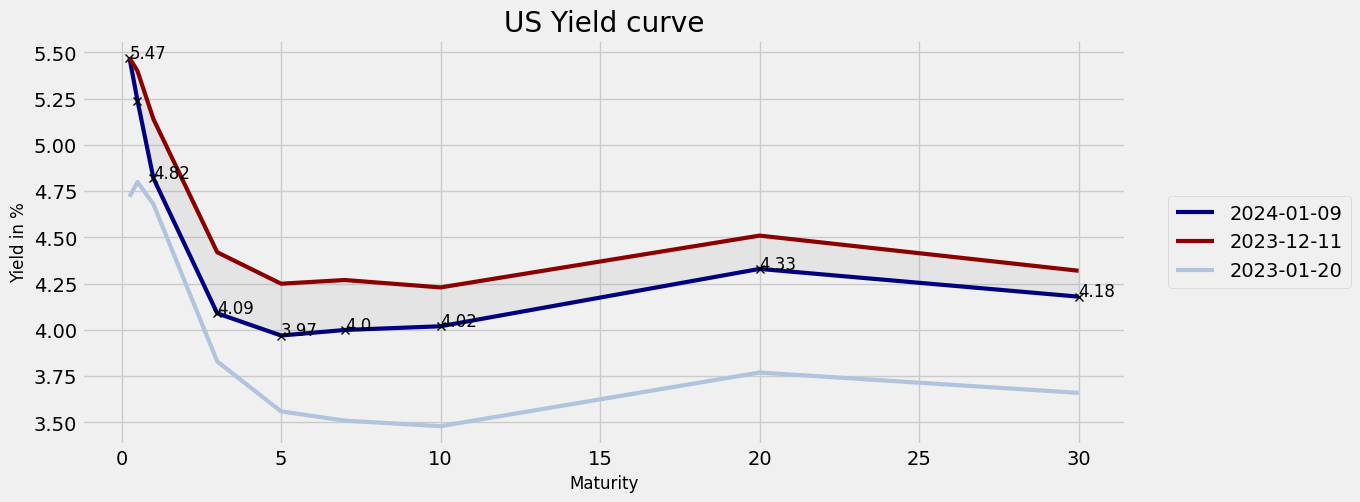

In [ ]:
#Get data Series
df_yield_curve = fred_query(yield_curve_id,yield_curve_dict, "01-01-2000")
#Plot the hell out of it
plt.figure(figsize=(12,5))
fig, ax = plt.subplots(figsize=(12,5))
plt.xlabel('Maturity', size = 12)
plt.ylabel('Yield in %', size = 12)
maturity = [30, 20, 10, 7, 5, 3,1, 0.5, 0.25]
yield_vector = df_yield_curve.iloc[-1].T.iloc[0:9]
plt.plot(maturity, df_yield_curve.iloc[-1].T.iloc[0:9], label=str(df_yield_curve.iloc[-1].T.iloc[0:9].name).split()[0], color="navy",linewidth=3.0)
plt.plot(maturity, df_yield_curve.iloc[-1].T.iloc[0:9], "x", color = "black")
plt.plot(maturity, df_yield_curve.iloc[-22].T.iloc[0:9], label=str(df_yield_curve.iloc[-22].T.iloc[0:9].name).split()[0], color="darkred",linewidth=3.0)
plt.plot(maturity, df_yield_curve.iloc[-253].T.iloc[0:9], label=str(df_yield_curve.iloc[-253].T.iloc[0:9].name).split()[0], color="lightsteelblue",linewidth=3.0)
plt.fill_between(maturity, df_yield_curve.iloc[-1].T.iloc[0:9], df_yield_curve.iloc[-22].T.iloc[0:9], color='grey', alpha=0.1)
#Add Data Labels
counter = 0
for index in range(len(maturity)):
  if counter != 7:
    ax.text(maturity[index], df_yield_curve.iloc[-1].T.iloc[counter], df_yield_curve.iloc[-1].T.iloc[counter], size=12)
  counter = counter +1

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.title("US Yield curve")
fig.savefig('temp.png', dpi=fig.dpi)
plt.show()

<Figure size 1200x500 with 0 Axes>

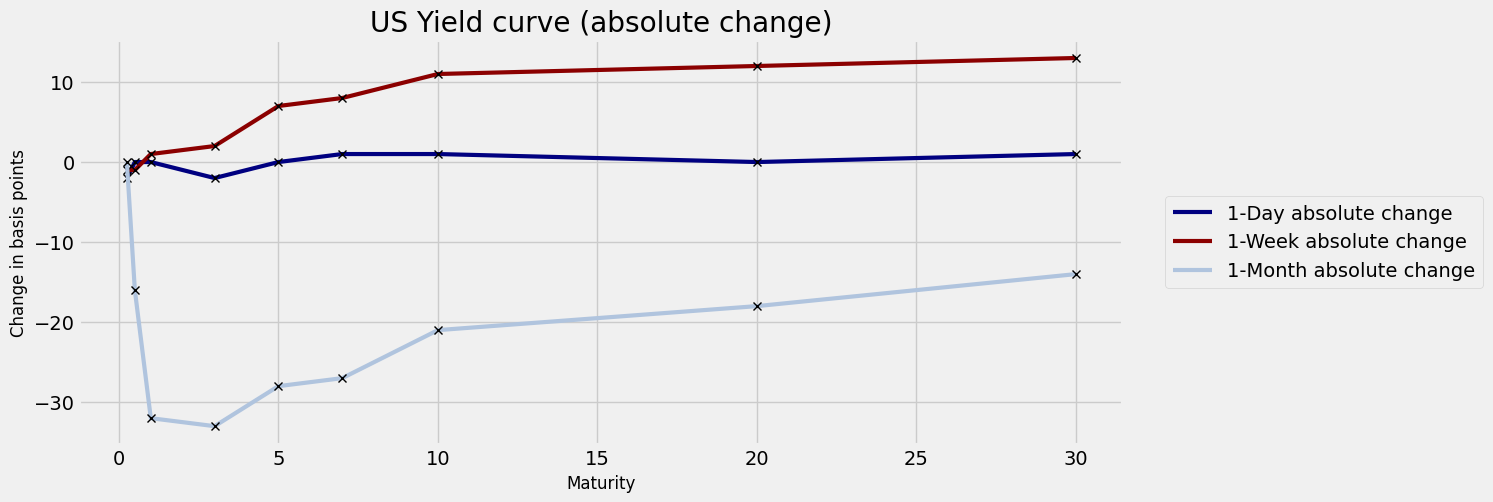

In [ ]:
plt.figure(figsize=(12,5))
fig, ax = plt.subplots(figsize=(12,5))
plt.xlabel('Maturity', size = 12)
plt.ylabel('Change in basis points', size = 12)
maturity = [30, 20, 10, 7, 5, 3,1, 0.5, 0.25]
yield_vector = df_yield_curve.iloc[-1].T.iloc[0:9]
plt.plot(maturity, (df_yield_curve.iloc[-1].T.iloc[0:9]-df_yield_curve.iloc[-2].T.iloc[0:9])*100, label="1-Day absolute change", color="navy",linewidth=3.0)
plt.plot(maturity, (df_yield_curve.iloc[-1].T.iloc[0:9]-df_yield_curve.iloc[-2].T.iloc[0:9])*100, "x", color = "black",linewidth=3.0)
plt.plot(maturity, (df_yield_curve.iloc[-1].T.iloc[0:9]-df_yield_curve.iloc[-5].T.iloc[0:9])*100, label="1-Week absolute change", color="darkred",linewidth=3.0)
plt.plot(maturity, (df_yield_curve.iloc[-1].T.iloc[0:9]-df_yield_curve.iloc[-5].T.iloc[0:9])*100, "x", color = "black",linewidth=3.0)
plt.plot(maturity, (df_yield_curve.iloc[-1].T.iloc[0:9]-df_yield_curve.iloc[-22].T.iloc[0:9])*100, label="1-Month absolute change", color="lightsteelblue",linewidth=3.0)
plt.plot(maturity, (df_yield_curve.iloc[-1].T.iloc[0:9]-df_yield_curve.iloc[-22].T.iloc[0:9])*100, "x", color = "black",linewidth=3.0)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.title("US Yield curve (absolute change)")
plt.show()

US_Treasury_Yield_30Y  US_Treasury_Yield_20Y  \
2023-12-01                    4.4                   4.58   

            US_Treasury_Yield_10Y  US_Treasury_Yield_7Y  US_Treasury_Yield_5Y  \
2023-12-01                   4.22                  4.22                  4.14   

            US_Treasury_Yield_3Y  US_Treasury_Yield_1Y  US_Treasury_Yield_6MO  \
2023-12-01                  4.31                  5.05                   5.33   

            US_Treasury_Yield_3MO  US_Treasury_Yield_1MO  
2023-12-01                   5.43                   5.55

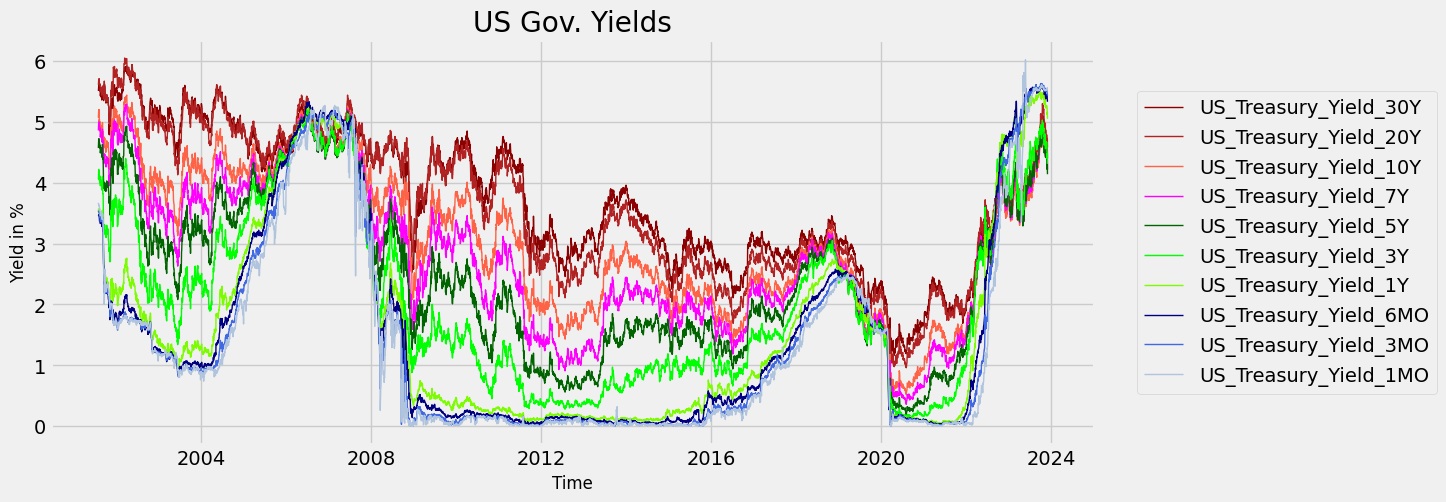

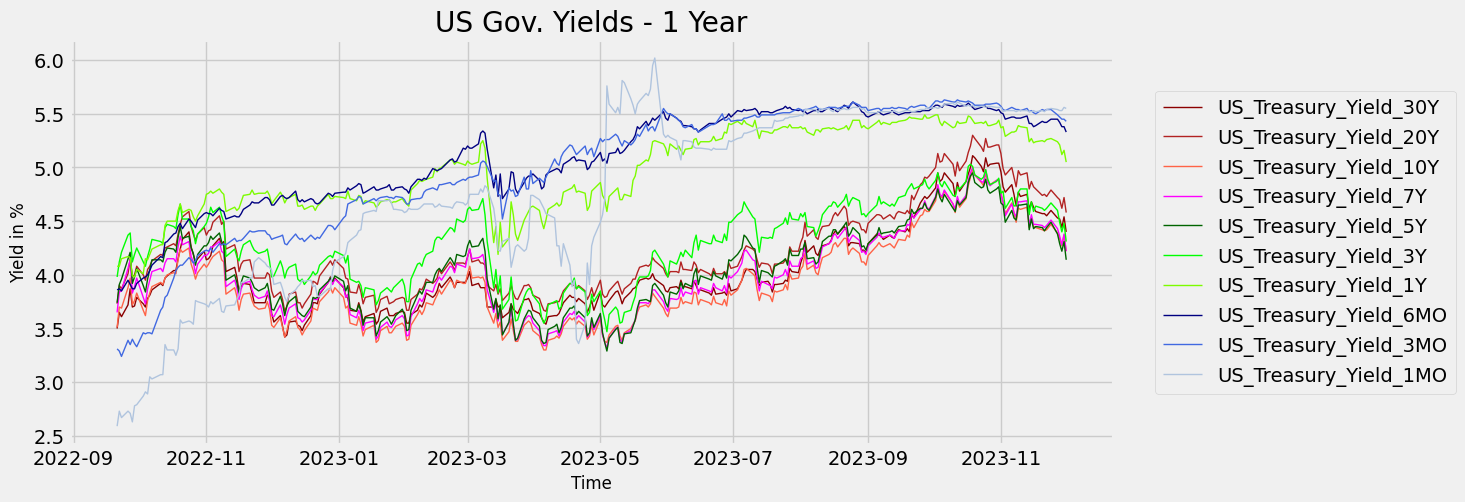

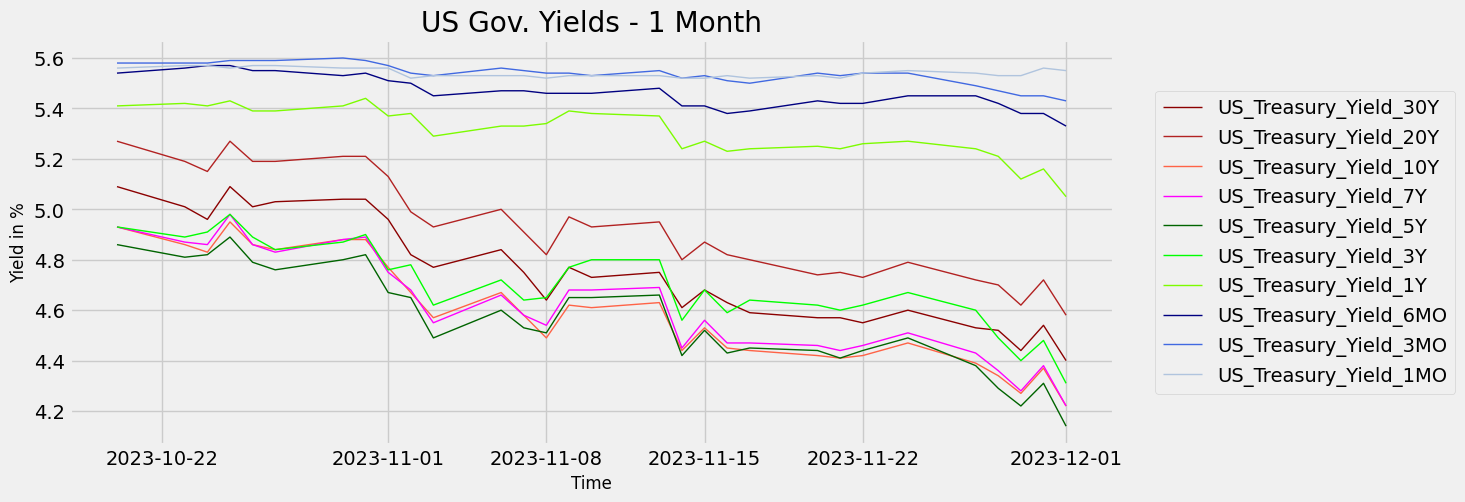

In [ ]:
df_yield_curve = df_yield_curve.drop(["US_Treasury_Yield_30Y_Inflation_Indexed","US_Treasury_Yield_20Y_Inflation_Indexed","US_Treasury_Yield_10Y_Inflation_Indexed","US_Treasury_Yield_7Y_Inflation_Indexed","US_Treasury_Yield_5Y_Inflation_Indexed"], axis = 1).dropna()
df_yield_curve_colors = {"US_Treasury_Yield_30Y":"darkred","US_Treasury_Yield_20Y":"firebrick","US_Treasury_Yield_10Y":"tomato","US_Treasury_Yield_7Y":"magenta","US_Treasury_Yield_5Y":"darkgreen","US_Treasury_Yield_3Y":"lime","US_Treasury_Yield_1Y":"lawngreen",
                         "US_Treasury_Yield_6MO":"navy","US_Treasury_Yield_3MO":"royalblue","US_Treasury_Yield_1MO":"lightsteelblue"}
for i in range(3):
  plt.figure(figsize=(12,5))
  plt.xlabel('Time', size = 12)
  plt.ylabel('Yield in %', size = 12)
  for column in df_yield_curve:
    plt.plot(df_yield_curve.index, df_yield_curve[column], label= column, color = df_yield_curve_colors[column], linewidth=1.0)
  plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
  if i==0:
    plt.title("US Gov. Yields")
    df_yield_curve = df_yield_curve.tail(300)
  elif i ==1:
    plt.title("US Gov. Yields - 1 Year")
    df_yield_curve = df_yield_curve.tail(30)
  else:
    plt.title("US Gov. Yields - 1 Month")
df_yield_curve.tail(1)

Corporate Spreads & Yields

US_High_Yield  US_Corp  US_AAA  US_AA  US_A  US_BBB  US_BB  US_B
2023-12-01           8.41     5.55    4.81    5.0  5.38    5.83   6.93  8.55

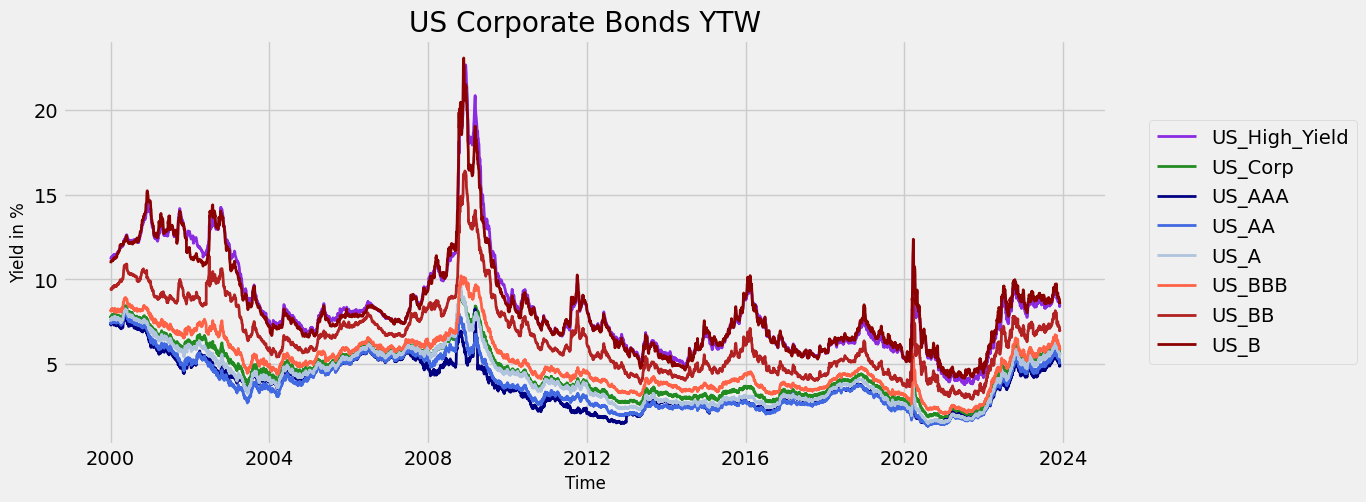

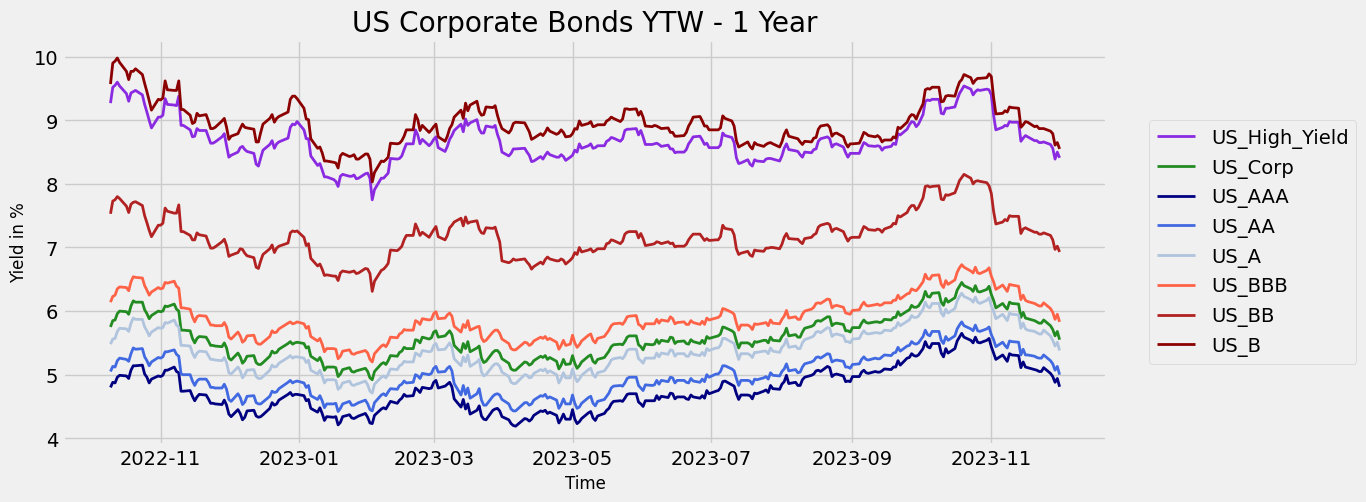

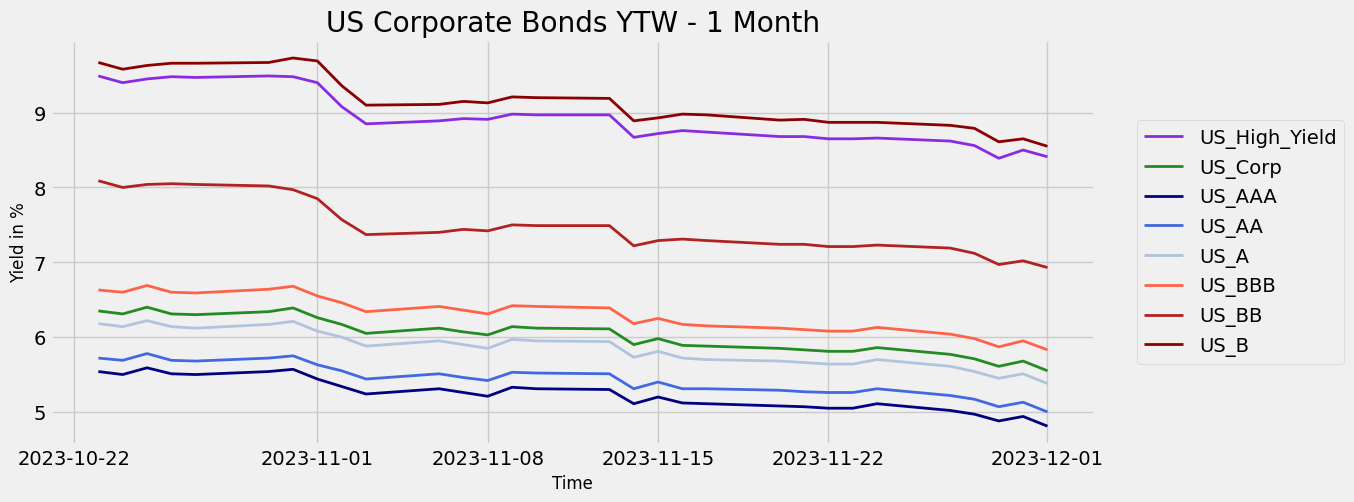

In [ ]:
df_ICE_Bofa_USD_ratings = fred_query(ICE_Bofa_USD_rating_id,ICE_Bofa_USD_rating_dict, "01-01-2000")
df_ICE_Bofa_USD_ratings = df_ICE_Bofa_USD_ratings.dropna()
ICE_Bofa_USD_ratings_colors = {"US_High_Yield":"blueviolet", "US_Corp":"forestgreen","US_AAA":"navy","US_AA":"royalblue","US_A":"lightsteelblue","US_BBB":"tomato","US_BB":"firebrick","US_B":"darkred" }
for i in range(3):
  plt.figure(figsize=(12,5))
  plt.xlabel('Time', size = 12)
  plt.ylabel('Yield in %', size = 12)
  for column in df_ICE_Bofa_USD_ratings:
    plt.plot(df_ICE_Bofa_USD_ratings.index, df_ICE_Bofa_USD_ratings[column], label= column, color = ICE_Bofa_USD_ratings_colors[column], linewidth=2.0)
  plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
  if i==0:
    plt.title("US Corporate Bonds YTW")
    df_ICE_Bofa_USD_ratings = df_ICE_Bofa_USD_ratings.tail(300)
  elif i ==1:
    plt.title("US Corporate Bonds YTW - 1 Year")
    df_ICE_Bofa_USD_ratings = df_ICE_Bofa_USD_ratings.tail(30)
  else:
    plt.title("US Corporate Bonds YTW - 1 Month")
df_ICE_Bofa_USD_ratings.tail(1)

US_High_Yield  US_Corp  US_AAA  US_AA  US_A  US_BBB  US_BB  US_B
2023-10-30            4.5     1.32    0.49   0.68  1.13    1.62   3.03  4.71

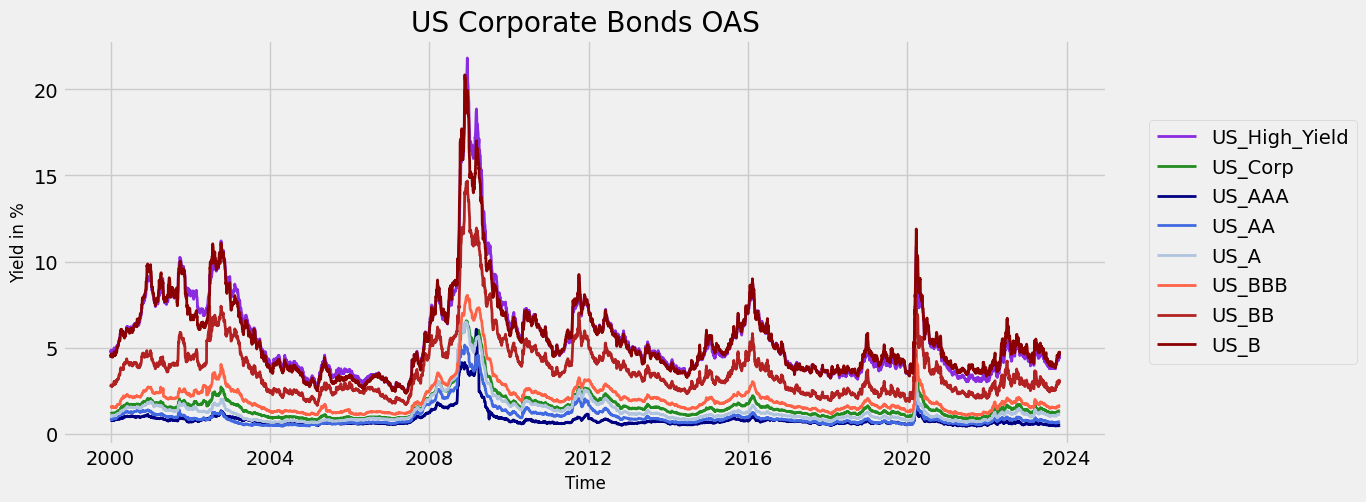

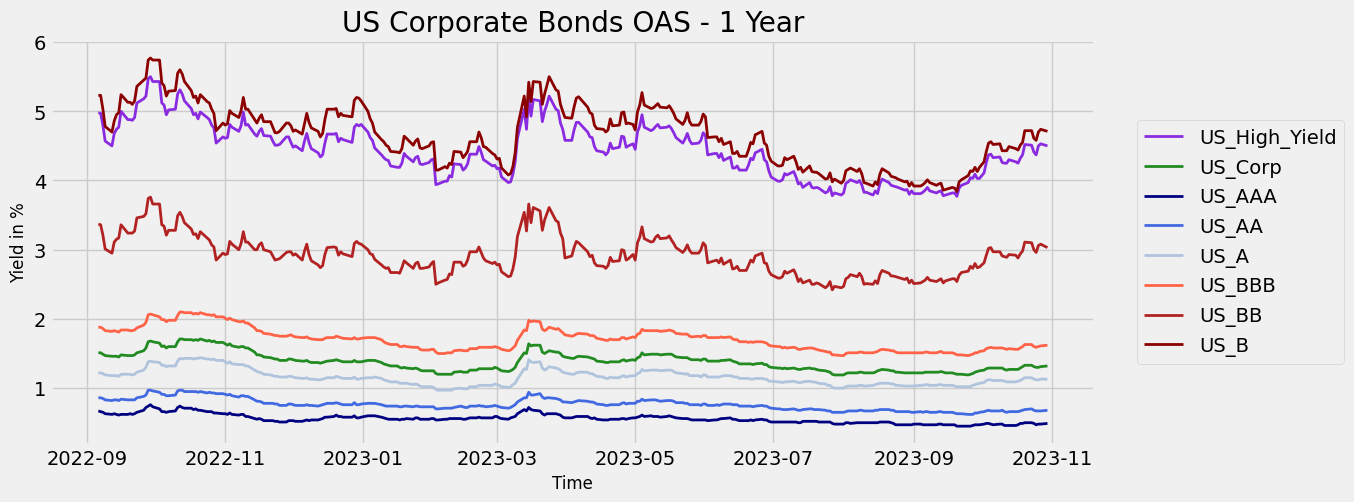

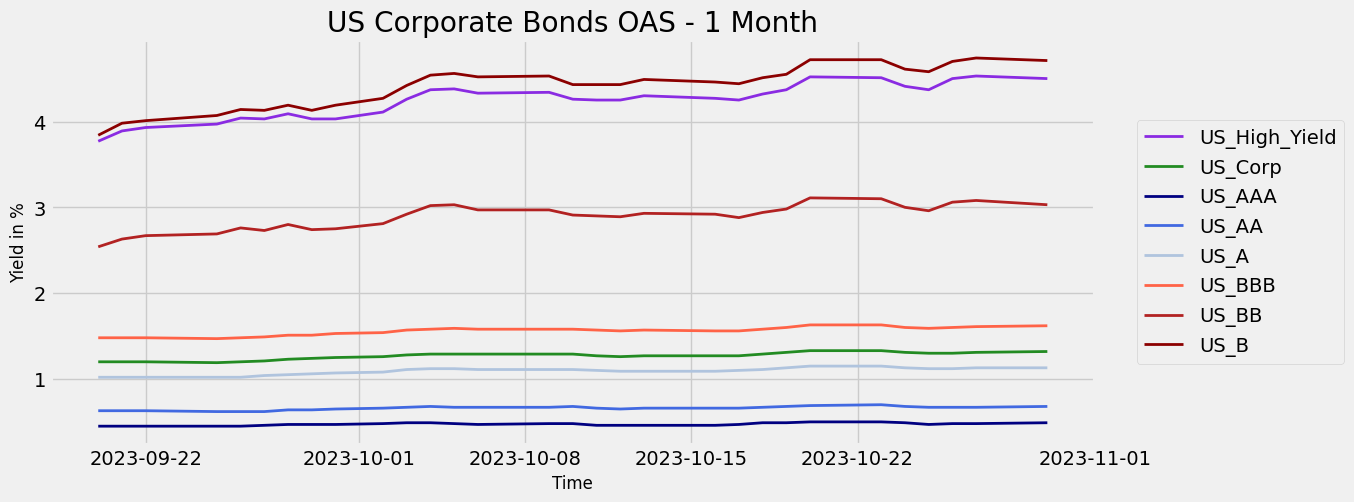

In [ ]:
df_ICE_Bofa_USD_ratings_OAS = fred_query(ICE_Bofa_USD_rating_OAS_id,ICE_Bofa_USD_rating_OAS_dict, "01-01-2000")
df_ICE_Bofa_USD_ratings_OAS = df_ICE_Bofa_USD_ratings_OAS.dropna()
ICE_Bofa_USD_ratings_colors = {"US_High_Yield":"blueviolet", "US_Corp":"forestgreen","US_AAA":"navy","US_AA":"royalblue","US_A":"lightsteelblue","US_BBB":"tomato","US_BB":"firebrick","US_B":"darkred" }
for i in range(3):
  plt.figure(figsize=(12,5))
  plt.xlabel('Time', size = 12)
  plt.ylabel('Yield in %', size = 12)
  for column in df_ICE_Bofa_USD_ratings_OAS:
    plt.plot(df_ICE_Bofa_USD_ratings_OAS.index, df_ICE_Bofa_USD_ratings_OAS[column], label= column, color = ICE_Bofa_USD_ratings_colors[column], linewidth=2.0)
  plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
  if i==0:
    plt.title("US Corporate Bonds OAS")
    df_ICE_Bofa_USD_ratings_OAS = df_ICE_Bofa_USD_ratings_OAS.tail(300)
  elif i ==1:
    plt.title("US Corporate Bonds OAS - 1 Year")
    df_ICE_Bofa_USD_ratings_OAS = df_ICE_Bofa_USD_ratings_OAS.tail(30)
  else:
    plt.title("US Corporate Bonds OAS - 1 Month")
df_ICE_Bofa_USD_ratings_OAS.tail(1)

Currency stuff

<Figure size 1200x500 with 0 Axes>

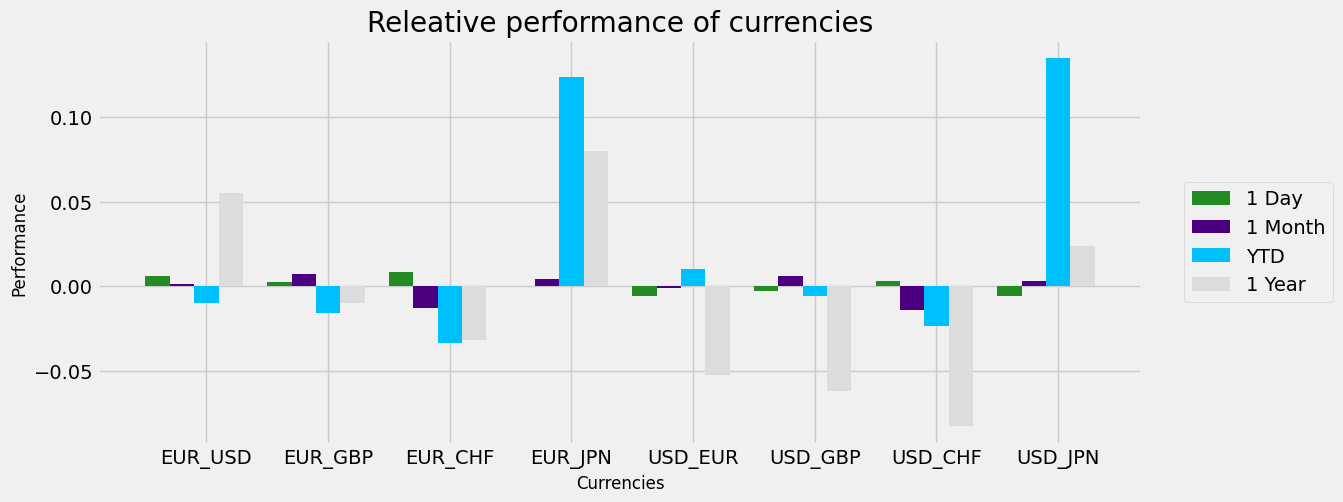

<function matplotlib.pyplot.show(close=None, block=None)>

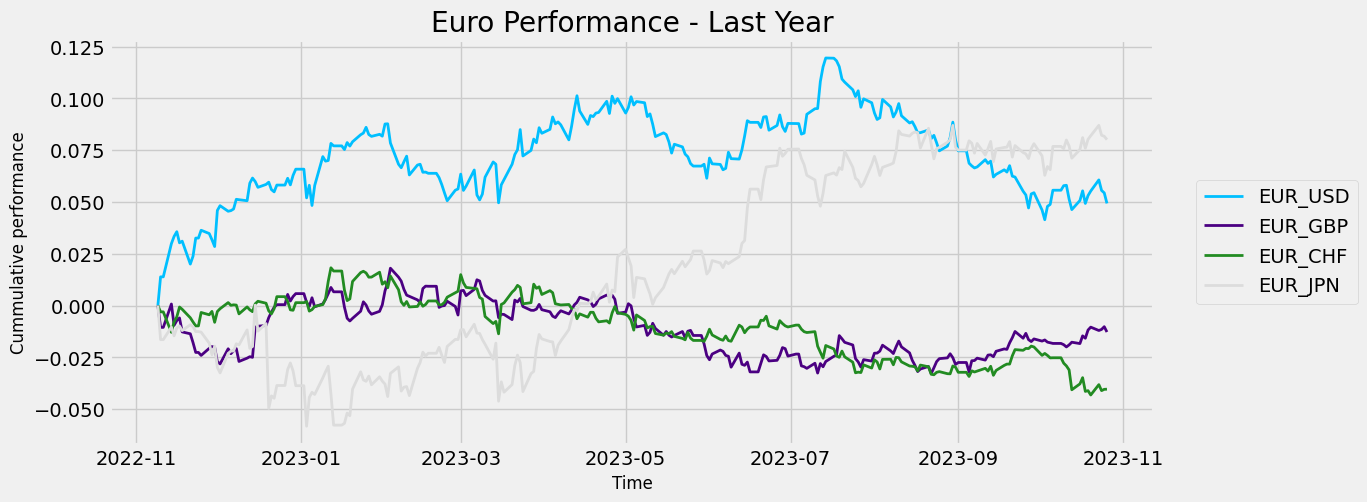

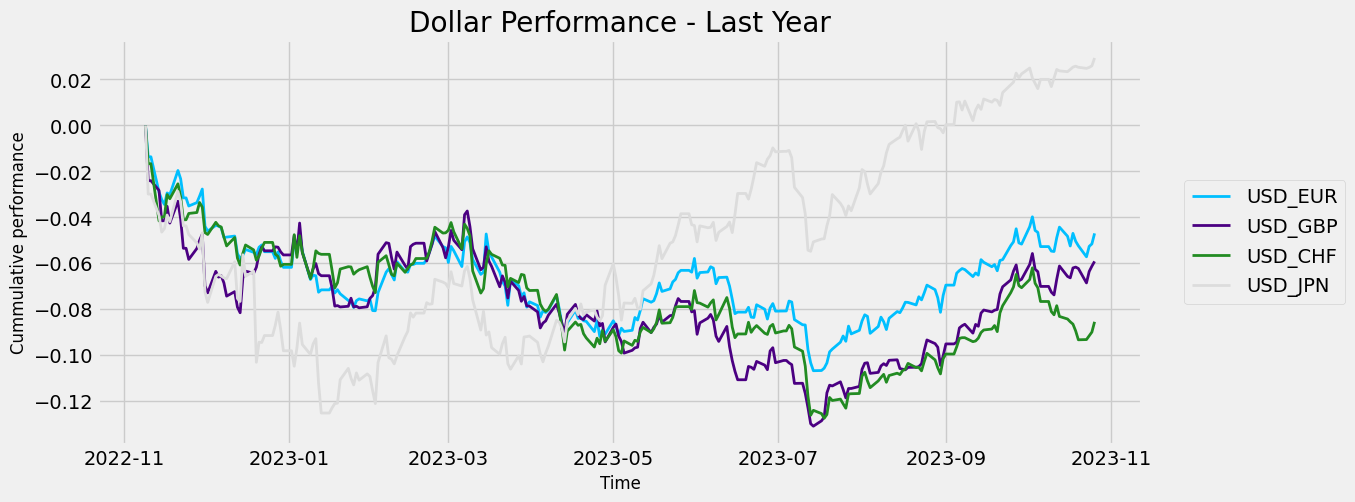

In [ ]:
df_currency = fred_query(currency_id, currency_dict, "01-02-2021")
df_currency["EUR_GBP"]= df_currency["EUR_USD"] / df_currency["GBP_USD"]
df_currency["EUR_CHF"]= df_currency["EUR_USD"] / (1/df_currency["CHF_USD"])
df_currency["EUR_JPN"]= (df_currency["EUR_USD"] / (1/df_currency["JPN_USD"]))/100
#Transformation von US-Reihen
df_currency["GBP_USD"]= 1 / df_currency["GBP_USD"]
df_currency["USD_EUR"]= 1 / df_currency["EUR_USD"]
df_currency["JPN_USD"]= df_currency["JPN_USD"]/100
df_currency = df_currency[["EUR_USD","EUR_GBP","EUR_CHF","EUR_JPN","USD_EUR","GBP_USD","CHF_USD","JPN_USD"]]

#Calculating the return [in terms of EUR and USD]
return_1D, return_1M, return_YTD, return_1Y = [], [], [], []

for column in df_currency:
  return_1D.append(df_currency.iloc[-1][column] / df_currency.iloc[-2][column]-1)
  return_1M.append(df_currency.iloc[-1][column] / df_currency.iloc[-22][column]-1)
  #return_YTD.append()
  return_1Y.append(df_currency.iloc[-1][column] / df_currency.iloc[-253][column]-1)
  #YTD
  latest_date = df_currency.index.max()
  prior_year_date = latest_date.replace(year=latest_date.year-1)
  df_filtered = df_currency[df_currency.index.year == prior_year_date.year]
  end_of_year = df_filtered.index.max()
  eoy_value = (float(df_currency[df_currency.index == end_of_year][column]))
  return_YTD.append(df_currency.iloc[-1][column] / eoy_value-1)

df_currency_perf = pd.DataFrame({'1 Day': return_1D,'1 Month': return_1M,'YTD': return_YTD, '1 Year':return_1Y}, index = (["EUR_USD","EUR_GBP","EUR_CHF","EUR_JPN","USD_EUR","USD_GBP","USD_CHF","USD_JPN"]))

X = ['EUR_USD','EUR_GBP','EUR_CHF','EUR_JPN','USD_EUR','USD_GBP','USD_CHF','USD_JPN']
X_axis = np.arange(len(X))

plt.figure(figsize=(12,5))
fig, ax = plt.subplots(figsize=(12,5))                                          #NEW
plt.bar(X_axis - 0.4, df_currency_perf["1 Day"], 0.2, label = '1 Day', color="forestgreen")
plt.bar(X_axis - 0.2, df_currency_perf["1 Month"], 0.2, label = '1 Month', color="indigo")
plt.bar(X_axis + 0, df_currency_perf["YTD"], 0.2, label = 'YTD', color= "deepskyblue")
plt.bar(X_axis + 0.2, df_currency_perf["1 Year"], 0.2, label = '1 Year', color= "gainsboro")

plt.xticks(X_axis, X)
plt.xlabel("Currencies", size = 12)
plt.ylabel("Performance", size = 12)
plt.title("Releative performance of currencies")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()

#CALCULATION OF CUMMULATIVE RETURN
df_currency_ret = df_currency.iloc[-253:-1]
df_currency_ret = df_currency_ret.pct_change()
for column in df_currency_ret:
  df_currency_ret[column] = (1 + df_currency_ret[column]).cumprod() - 1
  df_currency_ret[column].iloc[0]=0

#EURO
plt.figure(figsize=(12,5))
plt.xlabel('Time', size = 12)
plt.ylabel('Cummulative performance', size = 12)
plt.plot(df_currency_ret.index, df_currency_ret["EUR_USD"], label="EUR_USD", color="deepskyblue",linewidth=2.0)
plt.plot(df_currency_ret.index, df_currency_ret["EUR_GBP"], label="EUR_GBP", color="indigo",linewidth=2.0)
plt.plot(df_currency_ret.index, df_currency_ret["EUR_CHF"], label="EUR_CHF", color="forestgreen",linewidth=2.0)
plt.plot(df_currency_ret.index, df_currency_ret["EUR_JPN"], label="EUR_JPN", color="gainsboro",linewidth=2.0)
plt.title("Euro Performance - Last Year")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show

#DOLLAR
plt.figure(figsize=(12,5))
plt.xlabel('Time', size = 12)
plt.ylabel('Cummulative performance', size = 12)
plt.plot(df_currency_ret.index, df_currency_ret["USD_EUR"], label="USD_EUR", color="deepskyblue",linewidth=2.0)
plt.plot(df_currency_ret.index, df_currency_ret["GBP_USD"], label="USD_GBP", color="indigo",linewidth=2.0)
plt.plot(df_currency_ret.index, df_currency_ret["CHF_USD"], label="USD_CHF", color="forestgreen",linewidth=2.0)
plt.plot(df_currency_ret.index, df_currency_ret["JPN_USD"], label="USD_JPN", color="gainsboro",linewidth=2.0)

plt.title("Dollar Performance - Last Year")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show


Inflation Data

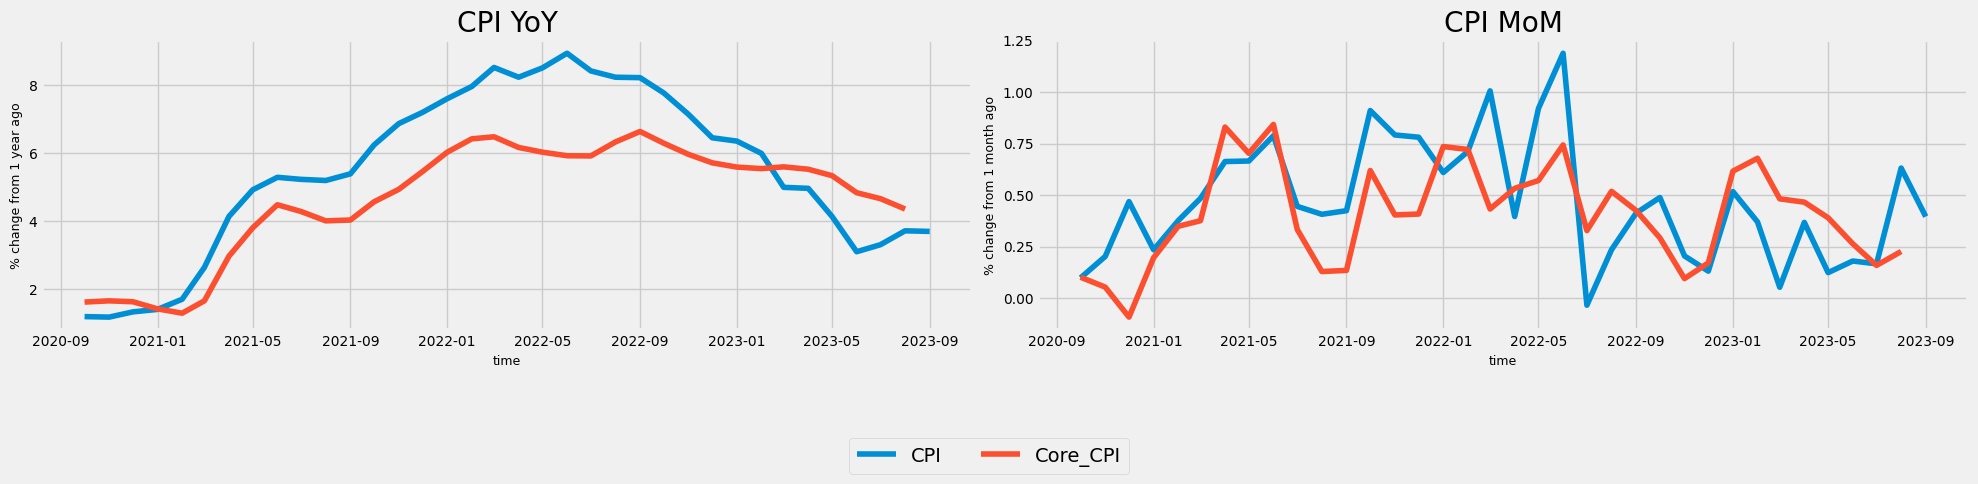

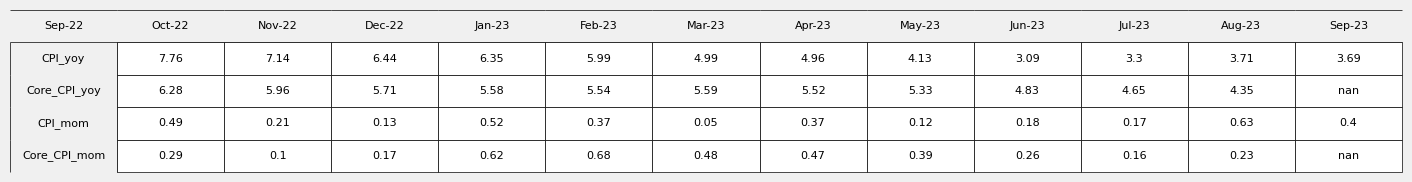

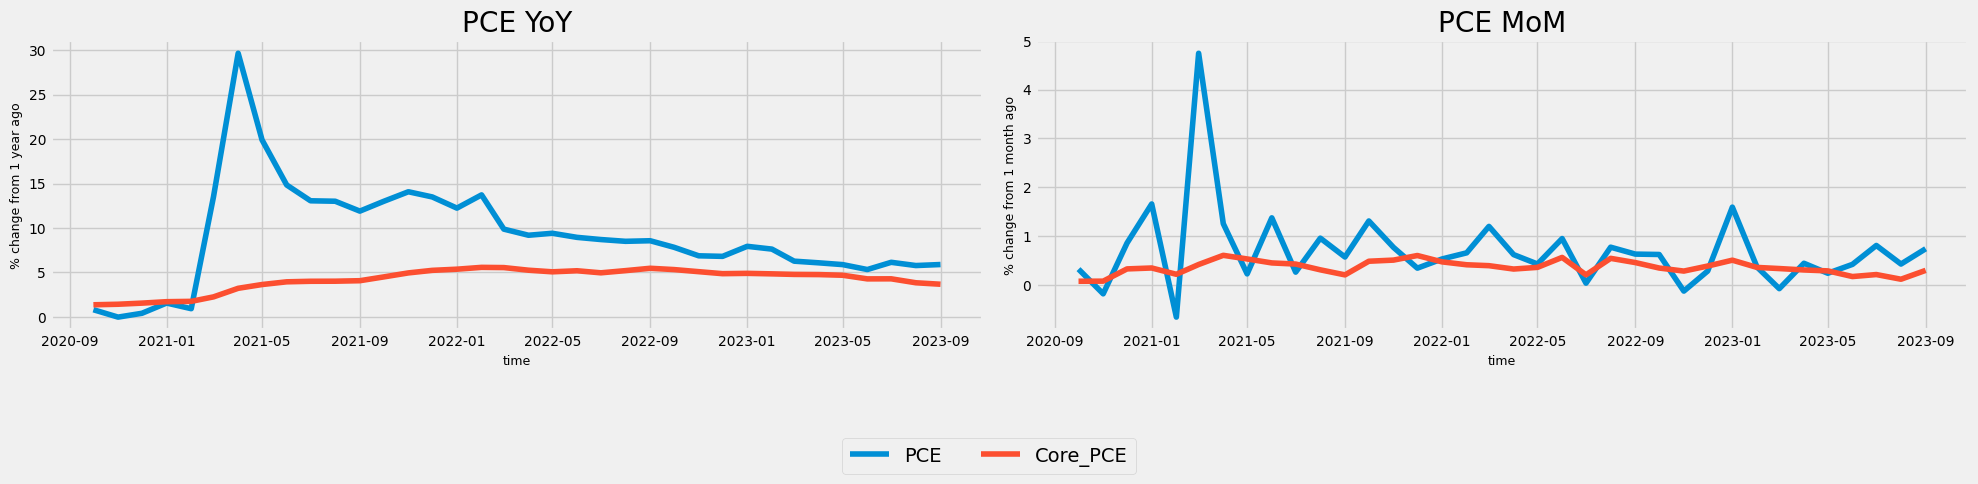

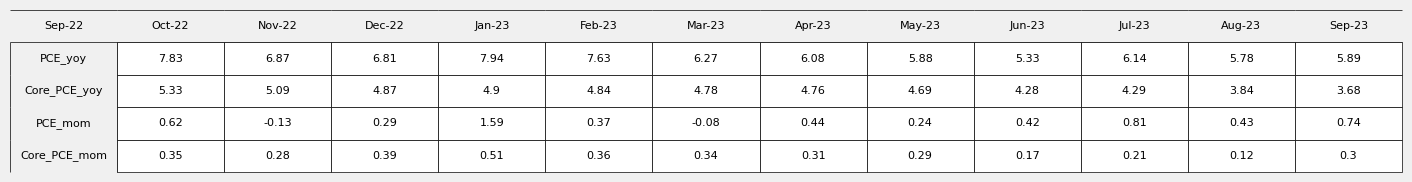

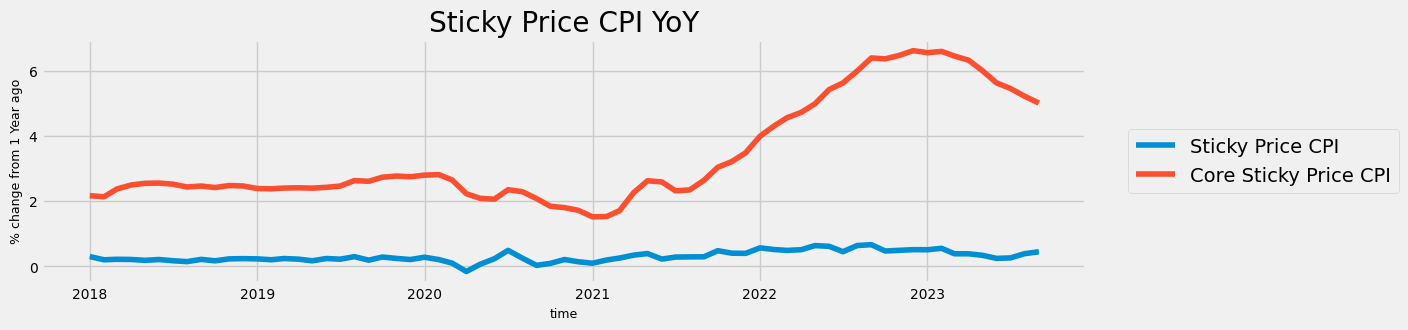

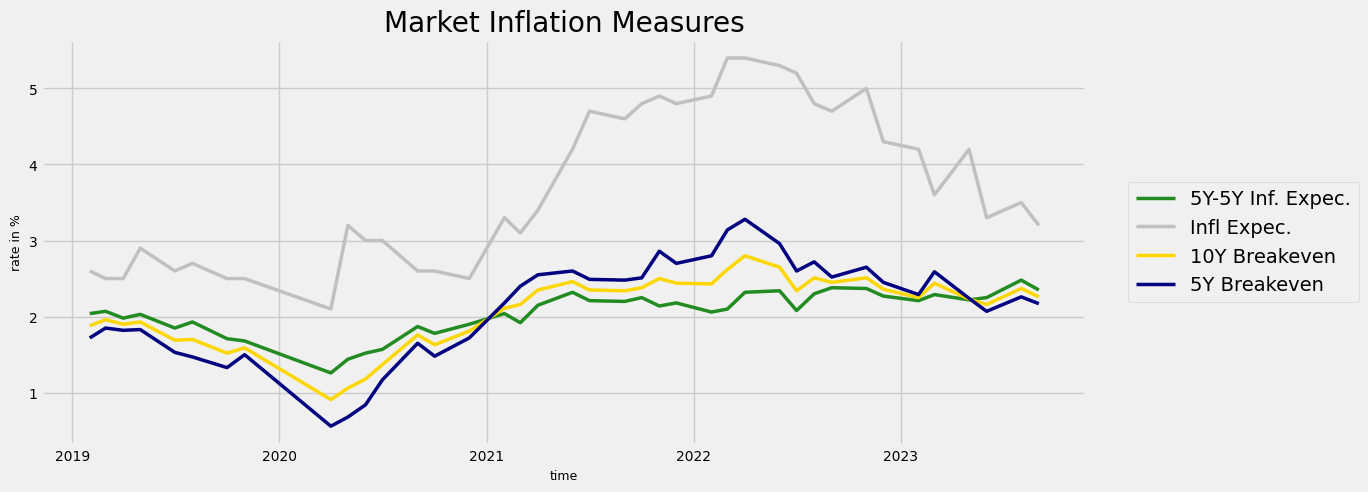

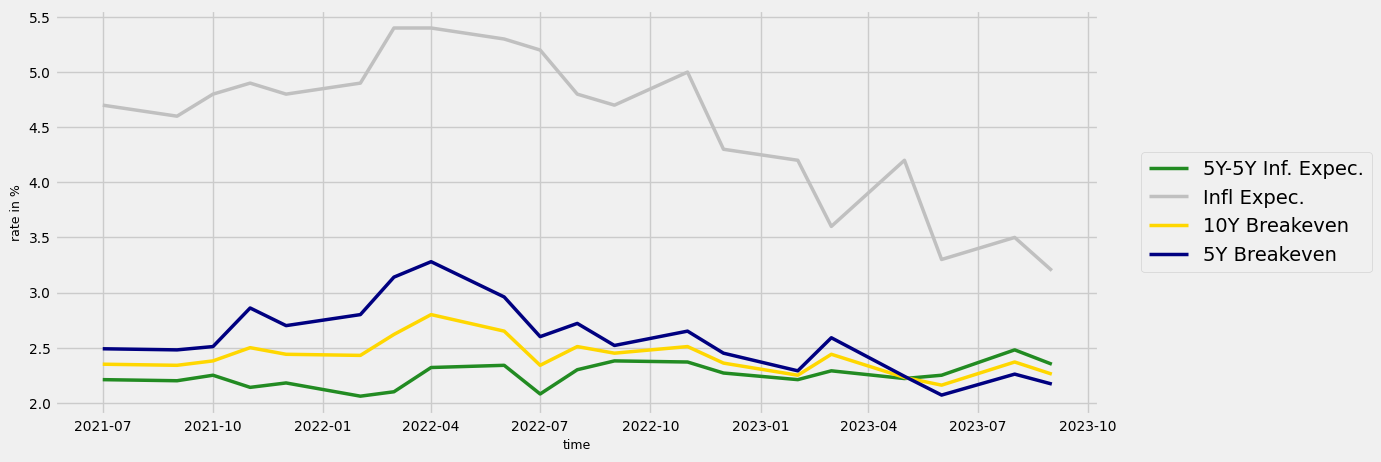

In [ ]:
import datetime
df_inflation = fred_query(inflation_id1, inflation_dict1, "01-02-2018")

df_CPI = df_inflation.drop(["PCE","Core_PCE","Sticky_Price_CPI","Core_Sticky_Price_CPI","Trimmend_Mean_PCE"], axis = 1)
df_PCE = df_inflation.drop(["CPI","Core_CPI","Sticky_Price_CPI","Core_Sticky_Price_CPI","Trimmend_Mean_PCE"], axis = 1)

Chart_YoY_MoM(df_CPI, "CPI")
Chart_YoY_MoM(df_PCE, "PCE")

#Sticky CPI Charts
plt.figure(figsize=(12,3))
plt.xlabel('time', size = 9)
plt.ylabel('% change from 1 Year ago', size = 9)
plt.plot(df_inflation.index, df_inflation["Sticky_Price_CPI"], label="Sticky Price CPI")
plt.plot(df_inflation.index, df_inflation["Core_Sticky_Price_CPI"], label="Core Sticky Price CPI")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Sticky Price CPI YoY")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show

df_inflation2 = fred_query(inflation_id2, inflation_dict2, "01-02-2019")
df_inf_short = df_inflation2.drop(["Breakeven_Inflation_30Y", "Breakeven_Inflation_20Y"], axis = 1).dropna()

for i in range(2):
  if i==1:
    df_inf_short = df_inf_short.tail(20)

  plt.figure(figsize=(12,5))
  plt.xlabel('time', size = 9)
  plt.ylabel('rate in %', size = 9)
  plt.plot(df_inf_short.index, df_inf_short["5Y_5Y_Forward_Inflation_Expectation"],linewidth=2.5, label="5Y-5Y Inf. Expec.", color="forestgreen")
  plt.plot(df_inf_short.index, df_inf_short["Michigan_Consumer_Inflation_Expectation"],linewidth=2.5, label="Infl Expec.", color="silver")
  plt.plot(df_inf_short.index, df_inf_short["Breakeven_Inflation_10Y"], linewidth=2.5,label="10Y Breakeven", color="gold")
  plt.plot(df_inf_short.index, df_inf_short["Breakeven_Inflation_5Y"], linewidth=2.5, label="5Y Breakeven", linestyle='solid', color="navy")
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  if i ==0:
    plt.title("Market Inflation Measures")
  plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
  plt.show

Orders

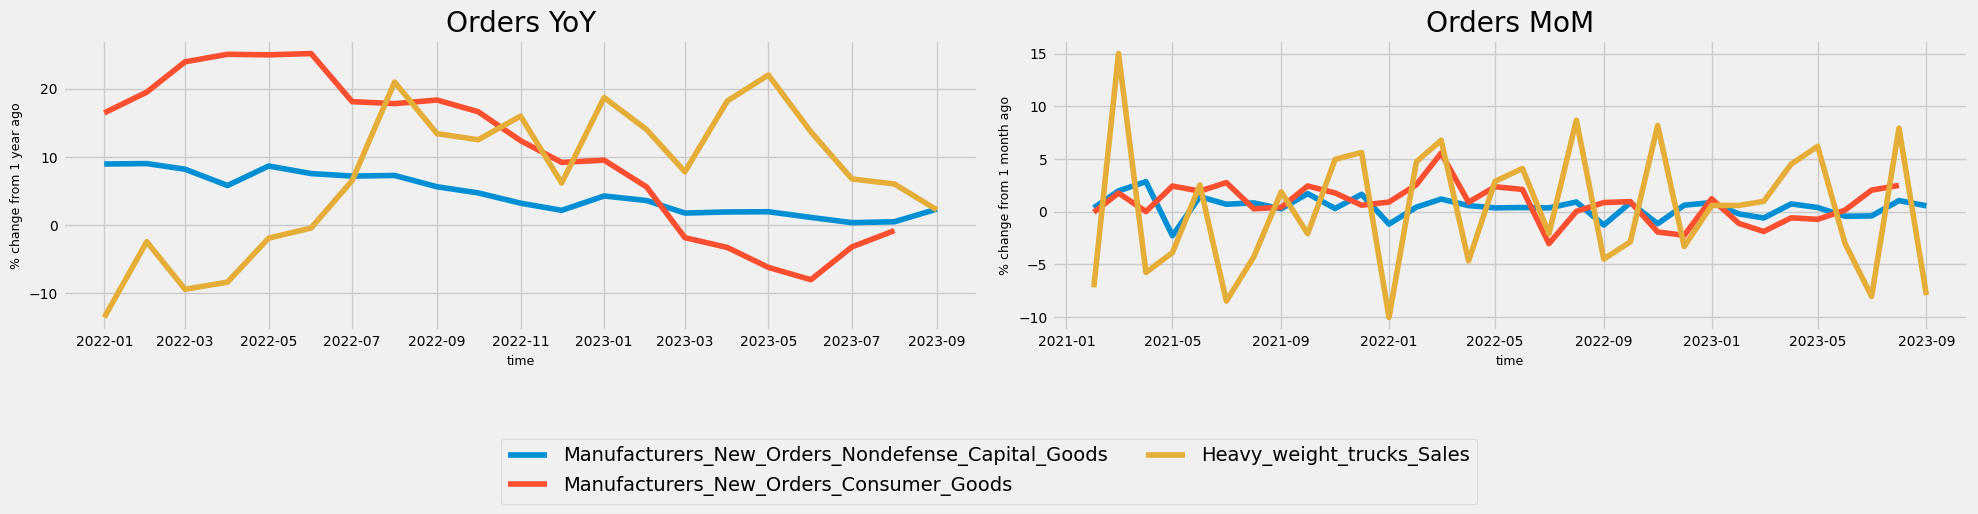

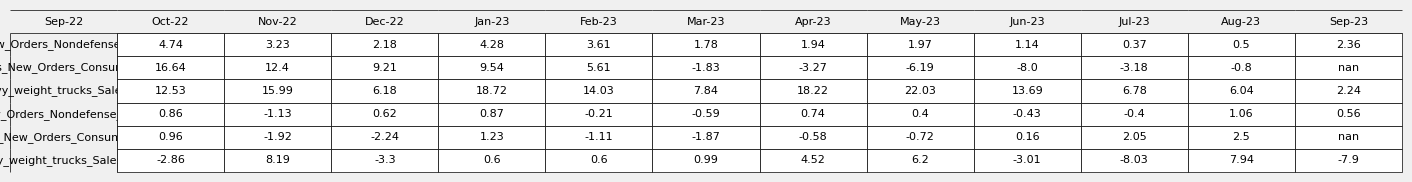

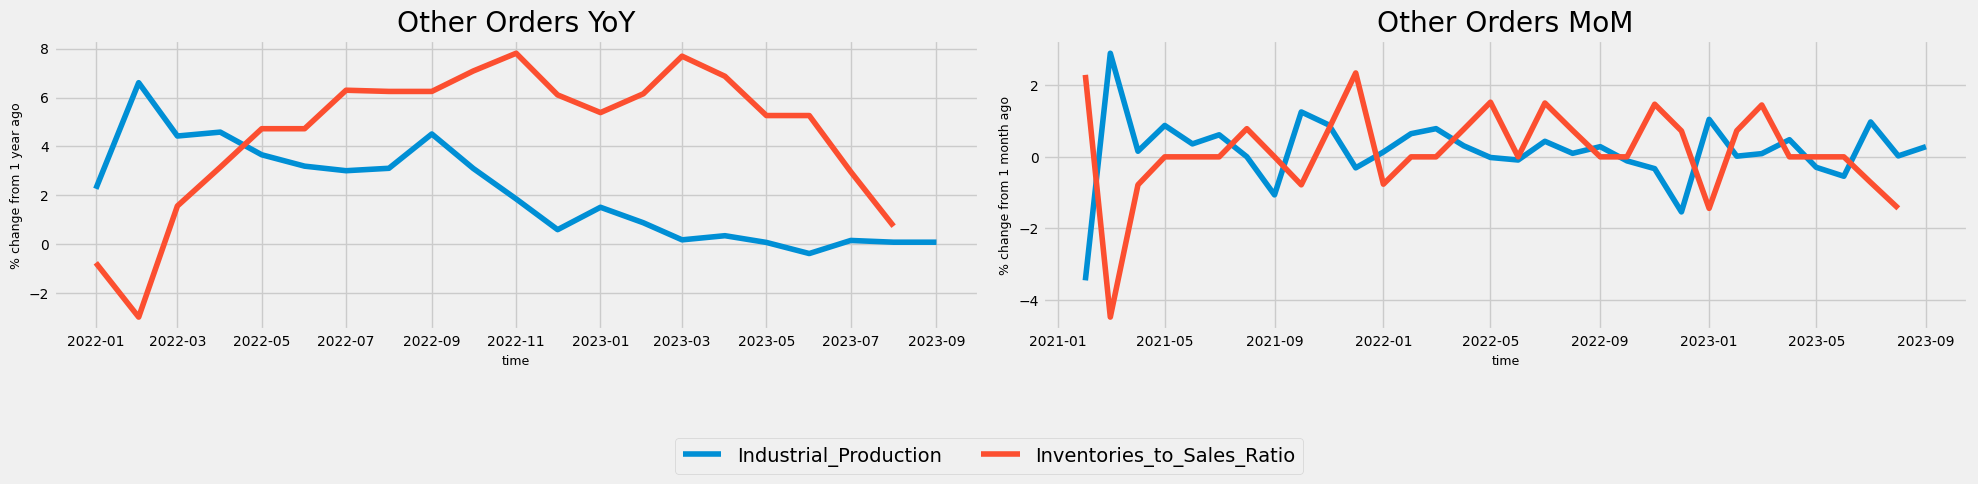

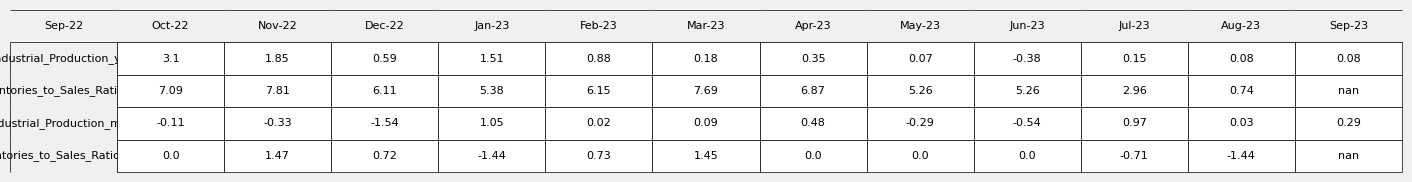

In [ ]:
df_orders = fred_query(orders_id, orders_dict, "01-02-2021")
df_new_orders= df_orders.drop(["Industrial_Production","Inventories_to_Sales_Ratio"], axis = 1)
df_orders_others = df_orders.drop(["Manufacturers_New_Orders_Nondefense_Capital_Goods","Manufacturers_New_Orders_Consumer_Goods","Heavy_weight_trucks_Sales"], axis = 1)
Chart_YoY_MoM(df_new_orders, "Orders")
Chart_YoY_MoM(df_orders_others, "Other Orders")

Consumption

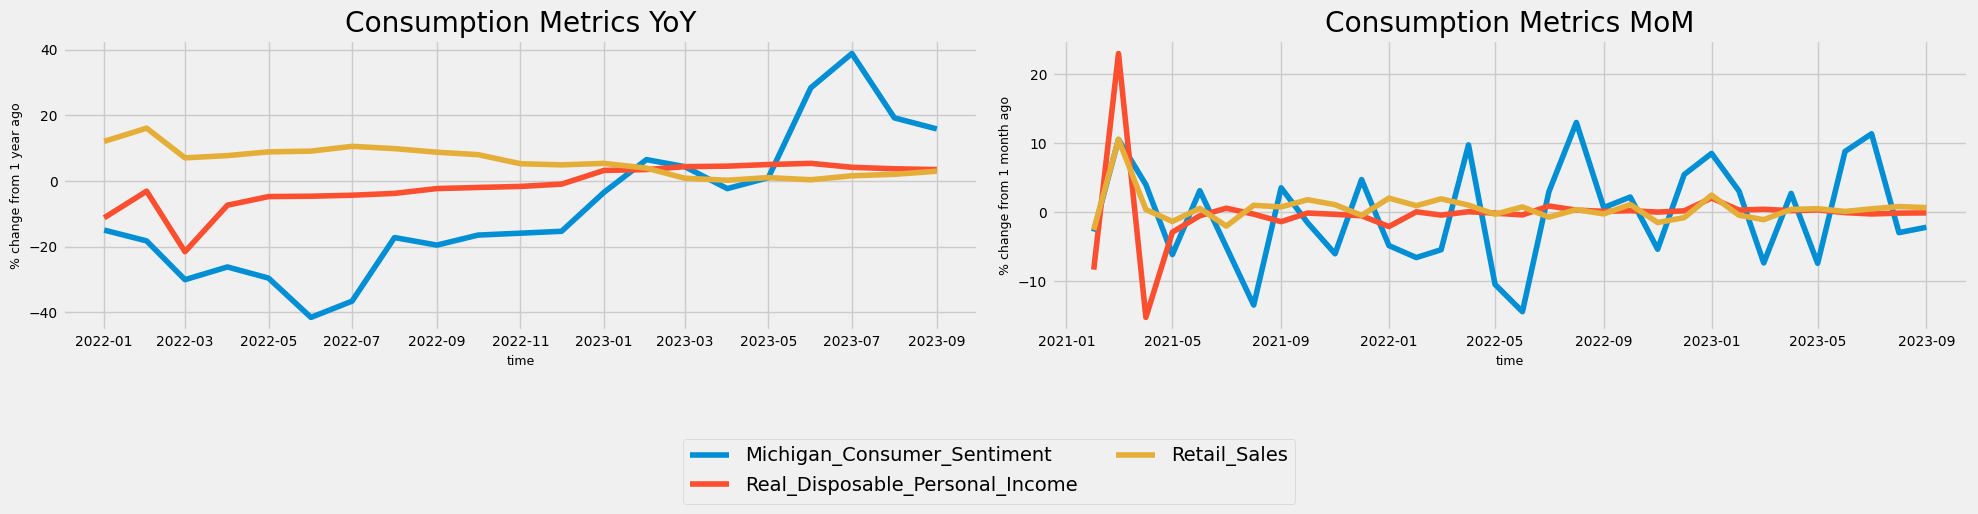

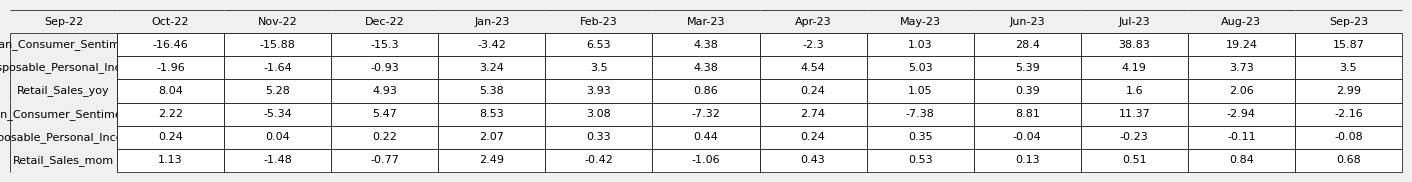

In [ ]:
df_consumption = fred_query(consumption_id, consumption_dict, "01-02-2021")
df_consumption_ready= df_consumption.drop(["Households_Checkable_Deposits&Currency","Household_Debt_Services_Payments_as_%_of_Disposable_Personal_Income"], axis = 1)
Chart_YoY_MoM(df_consumption_ready, "Consumption Metrics")


# **Yahoo Finance - Markets**

In [ ]:
from datetime import datetime
import datetime as dt

### Funktionen, fürs Sammeln & Bearbeiten

In [ ]:
def yfin_query(list_name, dict_name):                                           #Only for Last Price
  all_results = []
  start="2019-01-01"
  end= datetime.today().strftime("%Y-%m-%d")

  #Durch Liste loopen, alle Zeitreihen aus YFIN ziehen & in df temporär speichern
  for myid in list_name:
    results = pdr.get_data_yahoo(myid, start=start, end=end,progress=False)
    results[myid] = results["Adj Close"]
    results = results[myid]
    all_results.append(results)
  #Alle dataframes zusammenpacken und dann gemäß Dict umbennen
  df_yfin_results = pd.concat(all_results,axis =1)
  df_yfin_results.columns= [dict_name[c] for c in df_yfin_results.columns]

  return df_yfin_results

def yfin_query2(list_name, dict_name):                                          #For Last Price & Volume
  all_results1 = []
  all_results2 = []
  start="2019-01-01"
  end= datetime.today().strftime("%Y-%m-%d")

  #Durch Liste loopen, alle Zeitreihen aus FRED ziehen & in df temporär speichern
  for myid in list_name:
    results = pdr.get_data_yahoo(myid, start=start, end=end)
    results2 = results.copy()
    results[myid] = results["Adj Close"]
    results2[myid] = results2["Volume"]
    results = results[myid]
    results2 = results2[myid]
    all_results1.append(results)
    all_results2.append(results2)
  #Alle dataframes zusammenpacken und dann gemäß Dict umbennen
  df_res1 = pd.concat(all_results1,axis =1)
  df_res1.columns= [dict_name[c] for c in df_res1.columns]

  df_res2 = pd.concat(all_results2,axis =1)
  df_res2.columns= [dict_name[c] for c in df_res2.columns]
  return df_res1, df_res2

In [ ]:
def category_split_return_calc(df_prices ,df_volumes, category_dict):
  df_price =  df_prices.copy()                                                    #Deep Copy of price dataframe
  df_volume = df_volumes.copy()                                                   #Deep Copy of volume dataframe
  category_names = list(set(category_dict.values()))                              #Einzigartige Werte aus dem Dict extrahieren, zb. Sektoren oder Style oder ....
  cate_results = []                                                               #Leere Liste für später :)

  for category_key in category_names:                                             #Loop durch alle Kateogorien
    cate_price_df = df_price.copy()                                               #Deep copy des Dataframes
    cate_volume_df = df_volume.copy()
    for column in cate_price_df:                                                  #Loop durch alle Spalten des dfs
      if category_dict.get(column, "None") != category_key:                       #Wenn das Kriterium nicht zutrifft
        cate_price_df = cate_price_df.drop(column, axis=1)                        #Entsprechende Spalte rausschmeißen
        cate_volume_df = cate_volume_df.drop(column, axis=1)

    cate_return_df = cate_price_df.pct_change()                                   #Create new df for returns
    total_market_cap = cate_volume_df.sum(axis=1)                                 #Create new df for share of total gics volume
    weights_df = cate_volume_df.div(total_market_cap, axis=0)                     #Creates weight vectors
    sumproduct = cate_return_df.multiply(weights_df).sum(axis=1)                  #Create sumproduct
    cate_results.append(sumproduct)                                               #Put in LIST to create df later
    df_cate_results = pd.concat(cate_results,axis =1, keys= category_names)       #Create df

  return df_cate_results                                                          #IDEE: Durch jede Kategorie durchloopen, in einer Kateogorie alle rauswerfen, die nicht passen. Dann relative Gewicht aus MarketCap berechnen und mit Sumprodukt den "Portfolio Return" berechnen

In [ ]:
def calculate_returns(df_returns):
  df_cumulative_return = (1 + df_returns).cumprod()
  df_performance_results = df = pd.DataFrame(index=["2Y Return", "1Y Return", "6M Return","3M Return","1M Return", "Last Return","YTD"])
  periods = [504, 252, 126, 63, 21, 1]
  for column in df_returns:                                                   #Loop through every column
    results = []                                                              #Empty List for containers
    for times in periods:                                                     #Loop through periods to
      custom_return = df_cumulative_return.iloc[-1][column] / df_cumulative_return.iloc[-(times+1)][column] -1
      results.append(custom_return)                             #Wir fügen zur Liste unsere Ergebnisse hinzu -->-Tage -1 (da heutiger Tag Index -1 hat)                                                                     #Special treatment: YTD

    latest_date = df_cumulative_return.index.max()
    prior_year_date = latest_date.replace(year=latest_date.year-1)
    df_filtered = df_cumulative_return[df_cumulative_return.index.year == prior_year_date.year]
    end_of_year = df_filtered.index.max()
    eoy_value = (float(df_cumulative_return[df_cumulative_return.index == end_of_year][column]))
    custom_return = df_cumulative_return.iloc[-1][column] / eoy_value -1
    results.append(custom_return)
    df_performance_results[column]=results

  df_performance_results= df_performance_results.style.format("{:.2%}")
  return df_performance_results

###Sammlung von IDs für den konreten Gebrauch

In [ ]:
indices_id=["^GDAXI","^STOXX","^SP500TR","^IXIC", "XWD.TO", "EEM", "1308.T"]
indices_dict = {"^GDAXI":"DAX",
                "^STOXX":"STOXX 600 Price Index",
                "^SP500TR":"S&P500 TR","^IXIC":"Nasdaq Composite",
                "XWD.TO":"MSCI World",
                "EEM":"MSCI Emerging Markets",
                "1308.T":"TOPIX"}

index_future_id = ["ES=F","NQ=F","ZB=F","ZN=F","ZF=F","ZT=F","GC=F","SI=F","CL=F","NG=F"]
index_future_dict = {"ES=F":"E-Mini S&P500 Future","NQ=F":"NAsdaq 100 Future",
                     "ZB=F":"Treasury 30Y Future","ZN=F":"Treasury 10Y Future","ZF=F":"Treasury 5Y Future","ZT=F":"Treasury 2Y Future",
                     "GC=F":"Gold Future","SI=F":"Silver Future", "CL=F":"Crude Oil Future","NG=F":"Natural Gas Future"}

styles_id = ["^SP500-10","^SP500-15","^SP500-20","^SP500-25","^SP500-30","^SP500-35","^SP500-40","^SP500-45","^SP500-50","^SP500-55","^SP500-60"]
styles_dict = {"IVW":"S&P500 Growth", "IVE":"S&P500 Value"}


gics_id = ["IESU.L", "IUCS.L", "ICDU.L", "IITU.L", "IUUS.L", "IUHC.L", "IUIS.L", "UIFS.L", "IUCM.L", "IUMS.L"]
gics_dict = {"IESU.L":"Energy", "IUCS.L":"Consumer Staples", "ICDU.L":"Consumer Disc.", "IITU.L":"Info Tech", "IUUS.L": "Utilties", "IUHC.L":"Health Care",
               "IUIS.L":"Industrials", "UIFS.L":"Financials", "IUCM.L":"Communication", "IUMS.L":"Materials"}

SP500_members_id = ["MMM","AOS","ABT","ABBV","ACN","ATVI","ADM","ADBE","ADP","AAP","AES","AFL","A","APD","AKAM","ALK","ALB","ARE","ALGN","ALLE","LNT","ALL","GOOGL","GOOG","MO","AMZN","AMCR","AMD","AEE","AAL","AEP","AXP","AIG","AMT","AWK","AMP","ABC","AME","AMGN","APH","ADI","ANSS","AON","APA","AAPL","AMAT","APTV","ACGL","ANET","AJG","AIZ","T","ATO","ADSK","AZO","AVB","AVY","BKR","BALL","BAC","BBWI","BAX","BDX","WRB","BRK-B","BBY","BIO","TECH","BIIB","BLK","BK","BA","BKNG","BWA","BXP","BSX","BMY","AVGO","BR","BRO","BF-B","BG","CHRW","CDNS","CZR","CPT","CPB","COF","CAH","KMX","CCL","CARR","CTLT","CAT","CBOE","CBRE","CDW","CE","CNC","CNP","CDAY","CF","CRL","SCHW","CHTR","CVX","CMG","CB","CHD","CI","CINF","CTAS","CSCO","C","CFG","CLX","CME","CMS","KO","CTSH","CL","CMCSA","CMA","CAG","COP","ED","STZ","CEG","COO","CPRT","GLW","CTVA","CSGP","COST","CTRA","CCI","CSX","CMI","CVS","DHI","DHR","DRI","DVA","DE","DAL","XRAY","DVN","DXCM","FANG","DLR","DFS","DISH","DIS","DG","DLTR","D","DPZ","DOV","DOW","DTE","DUK","DD","DXC","EMN","ETN","EBAY","ECL","EIX","EW","EA","ELV","LLY","EMR","ENPH","ETR","EOG","EPAM","EQT","EFX","EQIX","EQR","ESS","EL","ETSY","EVRG","ES","EXC","EXPE","EXPD","EXR","XOM","FFIV","FDS","FICO","FAST","FRT","FDX","FITB","FSLR","FE","FIS","FLT","FMC","F","FTNT","FTV","FOXA","FOX","BEN","FCX","GRMN","IT","GEHC","GEN","GNRC","GD","GE","GIS","GM","GPC","GILD","GL","GPN","GS","HAL","HIG","HAS","HCA","PEAK","HSIC","HSY","HES","HPE","HLT","HOLX","HD","HON","HRL","HST","HWM","HPQ","HUM","HBAN","HII","IBM","IEX","IDXX","ITW","ILMN","INCY","IR","PODD","INTC","ICE","IFF","IP","IPG","INTU","ISRG","IVZ","INVH","IQV","IRM","JBHT","JKHY","J","JNJ","JCI","JPM","JNPR","K","KDP","KEY","KEYS","KMB","KIM","KMI","KLAC","KHC","KR","LHX","LH","LRCX","LW","LVS","LDOS","LEN","LNC","LIN","LYV","LKQ","LMT","L","LOW","LYB","MTB","MRO","MPC","MKTX","MAR","MMC","MLM","MAS","MA","MTCH","MKC","MCD","MCK","MDT","MRK","META","MET","MTD","MGM","MCHP","MU","MSFT","MAA","MRNA","MHK","MOH","TAP","MDLZ","MPWR","MNST","MCO","MS","MOS","MSI","MSCI","NDAQ","NTAP","NFLX","NWL","NEM","NWSA","NWS","NEE","NKE","NI","NDSN","NSC","NTRS","NOC","NCLH","NRG","NUE","NVDA","NVR","NXPI","ORLY","OXY","ODFL","OMC","ON","OKE","ORCL","OGN","OTIS","PCAR","PKG","PARA","PH","PAYX","PAYC","PYPL","PNR","PEP","PFE","PCG","PM","PSX","PNW","PXD","PNC","POOL","PPG","PPL","PFG","PG","PGR","PLD","PRU","PEG","PTC","PSA","PHM","QRVO","PWR","QCOM","DGX","RL","RJF","RTX","O","REG","REGN","RF","RSG","RMD","RHI","ROK","ROL","ROP","ROST","RCL","SPGI","CRM","SBAC","SLB","STX","SEE","SRE","NOW","SHW","SPG","SWKS","SJM","SNA","SEDG","SO","LUV","SWK","SBUX","STT","STLD","STE","SYK","SYF","SNPS","SYY","TMUS","TROW","TTWO","TPR","TRGP","TGT","TEL","TDY","TFX","TER","TSLA","TXN","TXT","TMO","TJX","TSCO","TT","TDG","TRV","TRMB","TFC","TYL","TSN","USB","UDR","ULTA","UNP","UAL","UPS","URI","UNH","UHS","VLO","VTR","VRSN","VRSK","VZ","VRTX","VFC","VTRS","VICI","V","VMC","WAB","WBA","WMT","WBD","WM","WAT","WEC","WFC","WELL","WST","WDC","WRK","WY","WHR","WMB","WTW","GWW","WYNN","XEL","XYL","YUM","ZBRA","ZBH","ZION","ZTS"]
#SP500_members_dict = {"MMM":"MMM","AOS":"AOS","ABT":"ABT","ABBV":"ABBV","ACN":"ACN","ATVI":"ATVI","ADM":"ADM","ADBE":"ADBE","ADP":"ADP","AAP":"AAP","AES":"AES","AFL":"AFL","A":"A","APD":"APD","AKAM":"AKAM","ALK":"ALK","ALB":"ALB","ARE":"ARE","ALGN":"ALGN","ALLE":"ALLE","LNT":"LNT","ALL":"ALL","GOOGL":"GOOGL","GOOG":"GOOG","MO":"MO","AMZN":"AMZN","AMCR":"AMCR","AMD":"AMD","AEE":"AEE","AAL":"AAL","AEP":"AEP","AXP":"AXP","AIG":"AIG","AMT":"AMT","AWK":"AWK","AMP":"AMP","ABC":"ABC","AME":"AME","AMGN":"AMGN","APH":"APH","ADI":"ADI","ANSS":"ANSS","AON":"AON","APA":"APA","AAPL":"AAPL","AMAT":"AMAT","APTV":"APTV","ACGL":"ACGL","ANET":"ANET","AJG":"AJG","AIZ":"AIZ","T":"T","ATO":"ATO","ADSK":"ADSK","AZO":"AZO","AVB":"AVB","AVY":"AVY","BKR":"BKR","BALL":"BALL","BAC":"BAC","BBWI":"BBWI","BAX":"BAX","BDX":"BDX","WRB":"WRB","BRK-B":"BRK-B","BBY":"BBY","BIO":"BIO","TECH":"TECH","BIIB":"BIIB","BLK":"BLK","BK":"BK","BA":"BA","BKNG":"BKNG","BWA":"BWA","BXP":"BXP","BSX":"BSX","BMY":"BMY","AVGO":"AVGO","BR":"BR","BRO":"BRO","BF-B":"BF-B","BG":"BG","CHRW":"CHRW","CDNS":"CDNS","CZR":"CZR","CPT":"CPT","CPB":"CPB","COF":"COF","CAH":"CAH","KMX":"KMX","CCL":"CCL","CARR":"CARR","CTLT":"CTLT","CAT":"CAT","CBOE":"CBOE","CBRE":"CBRE","CDW":"CDW","CE":"CE","CNC":"CNC","CNP":"CNP","CDAY":"CDAY","CF":"CF","CRL":"CRL","SCHW":"SCHW","CHTR":"CHTR","CVX":"CVX","CMG":"CMG","CB":"CB","CHD":"CHD","CI":"CI","CINF":"CINF","CTAS":"CTAS","CSCO":"CSCO","C":"C","CFG":"CFG","CLX":"CLX","CME":"CME","CMS":"CMS","KO":"KO","CTSH":"CTSH","CL":"CL","CMCSA":"CMCSA","CMA":"CMA","CAG":"CAG","COP":"COP","ED":"ED","STZ":"STZ","CEG":"CEG","COO":"COO","CPRT":"CPRT","GLW":"GLW","CTVA":"CTVA","CSGP":"CSGP","COST":"COST","CTRA":"CTRA","CCI":"CCI","CSX":"CSX","CMI":"CMI","CVS":"CVS","DHI":"DHI","DHR":"DHR","DRI":"DRI","DVA":"DVA","DE":"DE","DAL":"DAL","XRAY":"XRAY","DVN":"DVN","DXCM":"DXCM","FANG":"FANG","DLR":"DLR","DFS":"DFS","DISH":"DISH","DIS":"DIS","DG":"DG","DLTR":"DLTR","D":"D","DPZ":"DPZ","DOV":"DOV","DOW":"DOW","DTE":"DTE","DUK":"DUK","DD":"DD","DXC":"DXC","EMN":"EMN","ETN":"ETN","EBAY":"EBAY","ECL":"ECL","EIX":"EIX","EW":"EW","EA":"EA","ELV":"ELV","LLY":"LLY","EMR":"EMR","ENPH":"ENPH","ETR":"ETR","EOG":"EOG","EPAM":"EPAM","EQT":"EQT","EFX":"EFX","EQIX":"EQIX","EQR":"EQR","ESS":"ESS","EL":"EL","ETSY":"ETSY","EVRG":"EVRG","ES":"ES","EXC":"EXC","EXPE":"EXPE","EXPD":"EXPD","EXR":"EXR","XOM":"XOM","FFIV":"FFIV","FDS":"FDS","FICO":"FICO","FAST":"FAST","FRT":"FRT","FDX":"FDX","FITB":"FITB","FRC":"FRC","FSLR":"FSLR","FE":"FE","FIS":"FIS","FISV":"FISV","FLT":"FLT","FMC":"FMC","F":"F","FTNT":"FTNT","FTV":"FTV","FOXA":"FOXA","FOX":"FOX","BEN":"BEN","FCX":"FCX","GRMN":"GRMN","IT":"IT","GEHC":"GEHC","GEN":"GEN","GNRC":"GNRC","GD":"GD","GE":"GE","GIS":"GIS","GM":"GM","GPC":"GPC","GILD":"GILD","GL":"GL","GPN":"GPN","GS":"GS","HAL":"HAL","HIG":"HIG","HAS":"HAS","HCA":"HCA","PEAK":"PEAK","HSIC":"HSIC","HSY":"HSY","HES":"HES","HPE":"HPE","HLT":"HLT","HOLX":"HOLX","HD":"HD","HON":"HON","HRL":"HRL","HST":"HST","HWM":"HWM","HPQ":"HPQ","HUM":"HUM","HBAN":"HBAN","HII":"HII","IBM":"IBM","IEX":"IEX","IDXX":"IDXX","ITW":"ITW","ILMN":"ILMN","INCY":"INCY","IR":"IR","PODD":"PODD","INTC":"INTC","ICE":"ICE","IFF":"IFF","IP":"IP","IPG":"IPG","INTU":"INTU","ISRG":"ISRG","IVZ":"IVZ","INVH":"INVH","IQV":"IQV","IRM":"IRM","JBHT":"JBHT","JKHY":"JKHY","J":"J","JNJ":"JNJ","JCI":"JCI","JPM":"JPM","JNPR":"JNPR","K":"K","KDP":"KDP","KEY":"KEY","KEYS":"KEYS","KMB":"KMB","KIM":"KIM","KMI":"KMI","KLAC":"KLAC","KHC":"KHC","KR":"KR","LHX":"LHX","LH":"LH","LRCX":"LRCX","LW":"LW","LVS":"LVS","LDOS":"LDOS","LEN":"LEN","LNC":"LNC","LIN":"LIN","LYV":"LYV","LKQ":"LKQ","LMT":"LMT","L":"L","LOW":"LOW","LYB":"LYB","MTB":"MTB","MRO":"MRO","MPC":"MPC","MKTX":"MKTX","MAR":"MAR","MMC":"MMC","MLM":"MLM","MAS":"MAS","MA":"MA","MTCH":"MTCH","MKC":"MKC","MCD":"MCD","MCK":"MCK","MDT":"MDT","MRK":"MRK","META":"META","MET":"MET","MTD":"MTD","MGM":"MGM","MCHP":"MCHP","MU":"MU","MSFT":"MSFT","MAA":"MAA","MRNA":"MRNA","MHK":"MHK","MOH":"MOH","TAP":"TAP","MDLZ":"MDLZ","MPWR":"MPWR","MNST":"MNST","MCO":"MCO","MS":"MS","MOS":"MOS","MSI":"MSI","MSCI":"MSCI","NDAQ":"NDAQ","NTAP":"NTAP","NFLX":"NFLX","NWL":"NWL","NEM":"NEM","NWSA":"NWSA","NWS":"NWS","NEE":"NEE","NKE":"NKE","NI":"NI","NDSN":"NDSN","NSC":"NSC","NTRS":"NTRS","NOC":"NOC","NCLH":"NCLH","NRG":"NRG","NUE":"NUE","NVDA":"NVDA","NVR":"NVR","NXPI":"NXPI","ORLY":"ORLY","OXY":"OXY","ODFL":"ODFL","OMC":"OMC","ON":"ON","OKE":"OKE","ORCL":"ORCL","OGN":"OGN","OTIS":"OTIS","PCAR":"PCAR","PKG":"PKG","PARA":"PARA","PH":"PH","PAYX":"PAYX","PAYC":"PAYC","PYPL":"PYPL","PNR":"PNR","PEP":"PEP","PKI":"PKI","PFE":"PFE","PCG":"PCG","PM":"PM","PSX":"PSX","PNW":"PNW","PXD":"PXD","PNC":"PNC","POOL":"POOL","PPG":"PPG","PPL":"PPL","PFG":"PFG","PG":"PG","PGR":"PGR","PLD":"PLD","PRU":"PRU","PEG":"PEG","PTC":"PTC","PSA":"PSA","PHM":"PHM","QRVO":"QRVO","PWR":"PWR","QCOM":"QCOM","DGX":"DGX","RL":"RL","RJF":"RJF","RTX":"RTX","O":"O","REG":"REG","REGN":"REGN","RF":"RF","RSG":"RSG","RMD":"RMD","RHI":"RHI","ROK":"ROK","ROL":"ROL","ROP":"ROP","ROST":"ROST","RCL":"RCL","SPGI":"SPGI","CRM":"CRM","SBAC":"SBAC","SLB":"SLB","STX":"STX","SEE":"SEE","SRE":"SRE","NOW":"NOW","SHW":"SHW","SPG":"SPG","SWKS":"SWKS","SJM":"SJM","SNA":"SNA","SEDG":"SEDG","SO":"SO","LUV":"LUV","SWK":"SWK","SBUX":"SBUX","STT":"STT","STLD":"STLD","STE":"STE","SYK":"SYK","SYF":"SYF","SNPS":"SNPS","SYY":"SYY","TMUS":"TMUS","TROW":"TROW","TTWO":"TTWO","TPR":"TPR","TRGP":"TRGP","TGT":"TGT","TEL":"TEL","TDY":"TDY","TFX":"TFX","TER":"TER","TSLA":"TSLA","TXN":"TXN","TXT":"TXT","TMO":"TMO","TJX":"TJX","TSCO":"TSCO","TT":"TT","TDG":"TDG","TRV":"TRV","TRMB":"TRMB","TFC":"TFC","TYL":"TYL","TSN":"TSN","USB":"USB","UDR":"UDR","ULTA":"ULTA","UNP":"UNP","UAL":"UAL","UPS":"UPS","URI":"URI","UNH":"UNH","UHS":"UHS","VLO":"VLO","VTR":"VTR","VRSN":"VRSN","VRSK":"VRSK","VZ":"VZ","VRTX":"VRTX","VFC":"VFC","VTRS":"VTRS","VICI":"VICI","V":"V","VMC":"VMC","WAB":"WAB","WBA":"WBA","WMT":"WMT","WBD":"WBD","WM":"WM","WAT":"WAT","WEC":"WEC","WFC":"WFC","WELL":"WELL","WST":"WST","WDC":"WDC","WRK":"WRK","WY":"WY","WHR":"WHR","WMB":"WMB","WTW":"WTW","GWW":"GWW","WYNN":"WYNN","XEL":"XEL","XYL":"XYL","YUM":"YUM","ZBRA":"ZBRA","ZBH":"ZBH","ZION":"ZION","ZTS":"ZTS"}
SP500_members_dict = {'MMM':'3M','AOS':'A. O. Smith','ABT':'Abbott','ABBV':'AbbVie','ACN':'Accenture','ATVI':'Activision Blizzard','ADM':'ADM','ADBE':'Adobe Inc.','ADP':'ADP','AAP':'Advance Auto Parts','AES':'AES Corporation','AFL':'Aflac','A':'Agilent Technologies','APD':'Air Products and Chemicals','AKAM':'Akamai','ALK':'Alaska Air Group','ALB':'Albemarle Corporation','ARE':'Alexandria Real Estate Equities','ALGN':'Align Technology','ALLE':'Allegion','LNT':'Alliant Energy','ALL':'Allstate','GOOGL':'Alphabet Inc. (Class A)','GOOG':'Alphabet Inc. (Class C)','MO':'Altria','AMZN':'Amazon','AMCR':'Amcor','AMD':'AMD','AEE':'Ameren','AAL':'American Airlines Group','AEP':'American Electric Power','AXP':'American Express','AIG':'American International Group','AMT':'American Tower','AWK':'American Water Works','AMP':'Ameriprise Financial','ABC':'AmerisourceBergen Corporation','AME':'Ametek','AMGN':'Amgen','APH':'Amphenol','ADI':'Analog Devices','ANSS':'Ansys','AON':'Aon','APA':'APA Corporation','AAPL':'Apple Inc.','AMAT':'Applied Materials','APTV':'Aptiv','ACGL':'Arch Capital Group','ANET':'Arista Networks','AJG':'Arthur J. Gallagher & Co.','AIZ':'Assurant','T':'AT&T','ATO':'Atmos Energy','ADSK':'Autodesk','AZO':'AutoZone','AVB':'AvalonBay Communities','AVY':'Avery Dennison','BKR':'Baker Hughes','BALL':'Ball Corporation','BAC':'Bank of America','BBWI':'Bath & Body Works, Inc.','BAX':'Baxter International','BDX':'Becton Dickinson','WRB':'Berkley','BRK-B':'Berkshire Hathaway','BBY':'Best Buy','BIO':'Bio-Rad','TECH':'Bio-Techne','BIIB':'Biogen','BLK':'BlackRock','BK':'BNY Mellon','BA':'Boeing','BKNG':'Booking Holdings','BWA':'BorgWarner','BXP':'Boston Properties','BSX':'Boston Scientific','BMY':'Bristol Myers Squibb','AVGO':'Broadcom Inc.','BR':'Broadridge Financial Solutions','BRO':'Brown & Brown','BF-B':'Brown-Forman Corporation','BG':'Bunge Limited','CHRW':'C.H. Robinson','CDNS':'Cadence Design Systems','CZR':'Caesars Entertainment','CPT':'Camden Property Trust','CPB':'Campbell Soup Company','COF':'Capital One','CAH':'Cardinal Health','KMX':'CarMax','CCL':'Carnival','CARR':'Carrier Global','CTLT':'Catalent','CAT':'Caterpillar Inc.','CBOE':'Cboe Global Markets','CBRE':'CBRE Group','CDW':'CDW','CE':'Celanese','CNC':'Centene Corporation','CNP':'CenterPoint Energy','CDAY':'Ceridian','CF':'CF Industries','CRL':'Charles River Laboratories','SCHW':'Charles Schwab Corporation','CHTR':'Charter Communications','CVX':'Chevron Corporation','CMG':'Chipotle Mexican Grill','CB':'Chubb Limited','CHD':'Church & Dwight','CI':'Cigna','CINF':'Cincinnati Financial','CTAS':'Cintas','CSCO':'Cisco','C':'Citigroup','CFG':'Citizens Financial Group','CLX':'Clorox','CME':'CME Group','CMS':'CMS Energy','KO':'Coca-Cola Company (The)','CTSH':'Cognizant','CL':'Colgate-Palmolive','CMCSA':'Comcast','CMA':'Comerica','CAG':'Conagra Brands','COP':'ConocoPhillips','ED':'Consolidated Edison','STZ':'Constellation Brands','CEG':'Constellation Energy','COO':'CooperCompanies','CPRT':'Copart','GLW':'Corning Inc.','CTVA':'Corteva','CSGP':'CoStar Group','COST':'Costco','CTRA':'Coterra','CCI':'Crown Castle','CSX':'CSX','CMI':'Cummins','CVS':'CVS Health','DHI':'D.R. Horton','DHR':'Danaher Corporation','DRI':'Darden Restaurants','DVA':'DaVita Inc.','DE':'John Deere','DAL':'Delta Air Lines','XRAY':'Dentsply Sirona','DVN':'Devon Energy','DXCM':'Dexcom','FANG':'Diamondback Energy','DLR':'Digital Realty','DFS':'Discover Financial','DISH':'DISH Network Corporation','DIS':'Disney','DG':'Dollar General','DLTR':'Dollar Tree','D':'Dominion Energy','DPZ':'Dominos','DOV':'Dover Corporation','DOW':'Dow Inc.','DTE':'DTE Energy','DUK':'Duke Energy','DD':'DuPont','DXC':'DXC Technology','EMN':'Eastman Chemical Company','ETN':'Eaton Corporation','EBAY':'eBay','ECL':'Ecolab','EIX':'Edison International','EW':'Edwards Lifesciences','EA':'Electronic Arts','ELV':'Elevance Health','LLY':'Eli Lilly and Company','EMR':'Emerson Electric','ENPH':'Enphase','ETR':'Entergy','EOG':'EOG Resources','EPAM':'EPAM Systems','EQT':'EQT','EFX':'Equifax','EQIX':'Equinix','EQR':'Equity Residential','ESS':'Essex Property Trust','EL':'Estée Lauder Companies (The)','ETSY':'Etsy','RE':'RE','EVRG':'Evergy','ES':'Eversource','EXC':'Exelon','EXPE':'Expedia Group','EXPD':'Expeditors International','EXR':'Extra Space Storage','XOM':'ExxonMobil','FFIV':'F5, Inc.','FDS':'FactSet','FICO':'Fair Isaac','FAST':'Fastenal','FRT':'Federal Realty','FDX':'FedEx','FITB':'Fifth Third Bank','FSLR':'First Solar','FE':'FirstEnergy','FIS':'FIS','FLT':'Fleetcor','FMC':'FMC Corporation','F':'Ford Motor Company','FTNT':'Fortinet','FTV':'Fortive','FOXA':'Fox Corporation (Class A)','FOX':'Fox Corporation (Class B)','BEN':'Franklin Templeton','FCX':'Freeport-McMoRan','GRMN':'Garmin','IT':'Gartner','GEHC':'GE HealthCare','GEN':'Gen Digital','GNRC':'Generac','GD':'General Dynamics','GE':'General Electric','GIS':'General Mills','GM':'General Motors','GPC':'Genuine Parts Company','GILD':'Gilead Sciences','GL':'Globe Life','GPN':'Global Payments','GS':'Goldman Sachs','HAL':'Halliburton','HIG':'Hartford (The)','HAS':'Hasbro','HCA':'HCA Healthcare','PEAK':'Healthpeak','HSIC':'Henry Schein','HSY':'Hersheys','HES':'Hess Corporation','HPE':'Hewlett Packard Enterprise','HLT':'Hilton Worldwide','HOLX':'Hologic','HD':'Home Depot (The)','HON':'Honeywell','HRL':'Hormel Foods','HST':'Host Hotels & Resorts','HWM':'Howmet Aerospace','HPQ':'HP Inc.','HUM':'Humana','HBAN':'Huntington Bancshares','HII':'Huntington Ingalls Industries','IBM':'IBM','IEX':'IDEX Corporation','IDXX':'Idexx Laboratories','ITW':'Illinois Tool Works','ILMN':'Illumina','INCY':'Incyte','IR':'Ingersoll Rand','PODD':'Insulet','INTC':'Intel','ICE':'Intercontinental Exchange','IFF':'International Flavors & Fragrances','IP':'International Paper','IPG':'Interpublic Group of Companies (The)','INTU':'Intuit','ISRG':'Intuitive Surgical','IVZ':'Invesco','INVH':'Invitation Homes','IQV':'IQVIA','IRM':'Iron Mountain','JBHT':'J.B. Hunt','JKHY':'Jack Henry & Associates','J':'Jacobs Solutions','JNJ':'Johnson & Johnson','JCI':'Johnson Controls','JPM':'JPMorgan Chase','JNPR':'Juniper Networks','K':'Kelloggs','KDP':'Keurig Dr Pepper','KEY':'KeyCorp','KEYS':'Keysight','KMB':'Kimberly-Clark','KIM':'Kimco Realty','KMI':'Kinder Morgan','KLAC':'KLA Corporation','KHC':'Kraft Heinz','KR':'Kroger','LHX':'L3Harris','LH':'LabCorp','LRCX':'Lam Research','LW':'Lamb Weston','LVS':'Las Vegas Sands','LDOS':'Leidos','LEN':'Lennar','LNC':'Lincoln Financial','LIN':'Linde plc','LYV':'Live Nation Entertainment','LKQ':'LKQ Corporation','LMT':'Lockheed Martin','L':'Loews Corporation','LOW':'Lowes','LYB':'LyondellBasell','MTB':'M&T Bank','MRO':'Marathon Oil','MPC':'Marathon Petroleum','MKTX':'MarketAxess','MAR':'Marriott International','MMC':'Marsh McLennan','MLM':'Martin Marietta Materials','MAS':'Masco','MA':'Mastercard','MTCH':'Match Group','MKC':'McCormick & Company','MCD':'McDonalds','MCK':'McKesson','MDT':'Medtronic','MRK':'Merck & Co.','META':'Meta Platforms','MET':'MetLife','MTD':'Mettler Toledo','MGM':'MGM Resorts','MCHP':'Microchip Technology','MU':'Micron Technology','MSFT':'Microsoft','MAA':'Mid-America Apartment Communities','MRNA':'Moderna','MHK':'Mohawk Industries','MOH':'Molina Healthcare','TAP':'Molson Coors Beverage Company','MDLZ':'Mondelez International','MPWR':'Monolithic Power Systems','MNST':'Monster Beverage','MCO':'Moodys Corporation','MS':'Morgan Stanley','MOS':'Mosaic Company (The)','MSI':'Motorola Solutions','MSCI':'MSCI','NDAQ':'Nasdaq, Inc.','NTAP':'NetApp','NFLX':'Netflix','NWL':'Newell Brands','NEM':'Newmont','NWSA':'News Corp (Class A)','NWS':'News Corp (Class B)','NEE':'NextEra Energy','NKE':'Nike, Inc.','NI':'NiSource','NDSN':'Nordson Corporation','NSC':'Norfolk Southern Railway','NTRS':'Northern Trust','NOC':'Northrop Grumman','NCLH':'Norwegian Cruise Line Holdings','NRG':'NRG Energy','NUE':'Nucor','NVDA':'Nvidia','NVR':'NVR, Inc.','NXPI':'NXP Semiconductors','ORLY':'OReilly Auto Parts','OXY':'Occidental Petroleum','ODFL':'Old Dominion','OMC':'Omnicom Group','ON':'ON Semiconductor','OKE':'ONEOK','ORCL':'Oracle Corporation','OGN':'Organon & Co.','OTIS':'Otis Worldwide','PCAR':'Paccar','PKG':'Packaging Corporation of America','PARA':'Paramount Global','PH':'Parker Hannifin','PAYX':'Paychex','PAYC':'Paycom','PYPL':'PayPal','PNR':'Pentair','PEP':'PepsiCo','PFE':'Pfizer','PCG':'PG&E Corporation','PM':'Philip Morris International','PSX':'Phillips 66','PNW':'Pinnacle West','PXD':'Pioneer Natural Resources','PNC':'PNC Financial Services','POOL':'Pool Corporation','PPG':'PPG Industries','PPL':'PPL Corporation','PFG':'Principal Financial Group','PG':'Procter & Gamble','PGR':'Progressive Corporation','PLD':'Prologis','PRU':'Prudential Financial','PEG':'Public Service Enterprise Group','PTC':'PTC','PSA':'Public Storage','PHM':'PulteGroup','QRVO':'Qorvo','PWR':'Quanta Services','QCOM':'Qualcomm','DGX':'Quest Diagnostics','RL':'Ralph Lauren Corporation','RJF':'Raymond James','RTX':'RTX Corporation','O':'Realty Income','REG':'Regency Centers','REGN':'Regeneron','RF':'Regions Financial Corporation','RSG':'Republic Services','RMD':'ResMed','RHI':'Robert Half','ROK':'Rockwell Automation','ROL':'Rollins, Inc.','ROP':'Roper Technologies','ROST':'Ross Stores','RCL':'Royal Caribbean Group','SPGI':'S&P Global','CRM':'Salesforce','SBAC':'SBA Communications','SLB':'Schlumberger','STX':'Seagate Technology','SEE':'Sealed Air','SRE':'Sempra Energy','NOW':'ServiceNow','SHW':'Sherwin-Williams','SPG':'Simon Property Group','SWKS':'Skyworks Solutions','SJM':'J.M. Smucker Company (The)','SNA':'Snap-on','SEDG':'SolarEdge','SO':'Southern Company','LUV':'Southwest Airlines','SWK':'Stanley Black & Decker','SBUX':'Starbucks','STT':'State Street Corporation','STLD':'Steel Dynamics','STE':'Steris','SYK':'Stryker Corporation','SYF':'Synchrony Financial','SNPS':'Synopsys','SYY':'Sysco','TMUS':'T-Mobile US','TROW':'T. Rowe Price','TTWO':'Take-Two Interactive','TPR':'Tapestry, Inc.','TRGP':'Targa Resources','TGT':'Target Corporation','TEL':'TE Connectivity','TDY':'Teledyne Technologies','TFX':'Teleflex','TER':'Teradyne','TSLA':'Tesla, Inc.','TXN':'Texas Instruments','TXT':'Textron','TMO':'Thermo Fisher Scientific','TJX':'TJX Companies','TSCO':'Tractor Supply','TT':'Trane Technologies','TDG':'TransDigm Group','TRV':'Travelers Companies (The)','TRMB':'Trimble Inc.','TFC':'Truist','TYL':'Tyler Technologies','TSN':'Tyson Foods','USB':'U.S. Bank','UDR':'UDR, Inc.','ULTA':'Ulta Beauty','UNP':'Union Pacific Corporation','UAL':'United Airlines Holdings','UPS':'United Parcel Service','URI':'United Rentals','UNH':'UnitedHealth Group','UHS':'Universal Health Services','VLO':'Valero Energy','VTR':'Ventas','VRSN':'Verisign','VRSK':'Verisk','VZ':'Verizon','VRTX':'Vertex Pharmaceuticals','VFC':'VF Corporation','VTRS':'Viatris','VICI':'Vici Properties','V':'Visa Inc.','VMC':'Vulcan Materials Company','WAB':'Wabtec','WBA':'Walgreens Boots Alliance','WMT':'Walmart','WBD':'Warner Bros. Discovery','WM':'Waste Management','WAT':'Waters Corporation','WEC':'WEC Energy Group','WFC':'Wells Fargo','WELL':'Welltower','WST':'West Pharmaceutical Services','WDC':'Western Digital','WRK':'WestRock','WY':'Weyerhaeuser','WHR':'Whirlpool Corporation','WMB':'Williams Companies','WTW':'Willis Towers Watson','GWW':'W. W. Grainger','WYNN':'Wynn Resorts','XEL':'Xcel Energy','XYL':'Xylem Inc.','YUM':'Yum! Brands','ZBRA':'Zebra Technologies','ZBH':'Zimmer Biomet','ZION':'Zions Bancorporation','ZTS':'Zoetis'}

### Grafiken

Indices

In [ ]:
df_indices = yfin_query(indices_id, indices_dict)
df_indices_ret = df_indices.pct_change()
df_indices_res = calculate_returns(df_indices_ret)
df_indices_res

<function matplotlib.pyplot.show(close=None, block=None)>

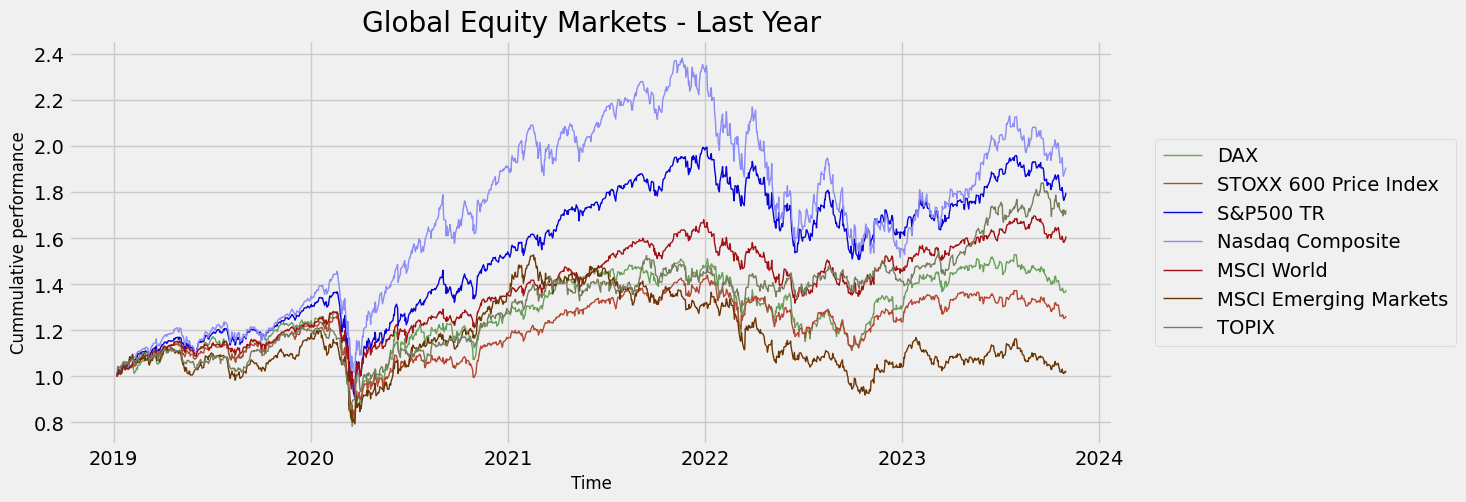

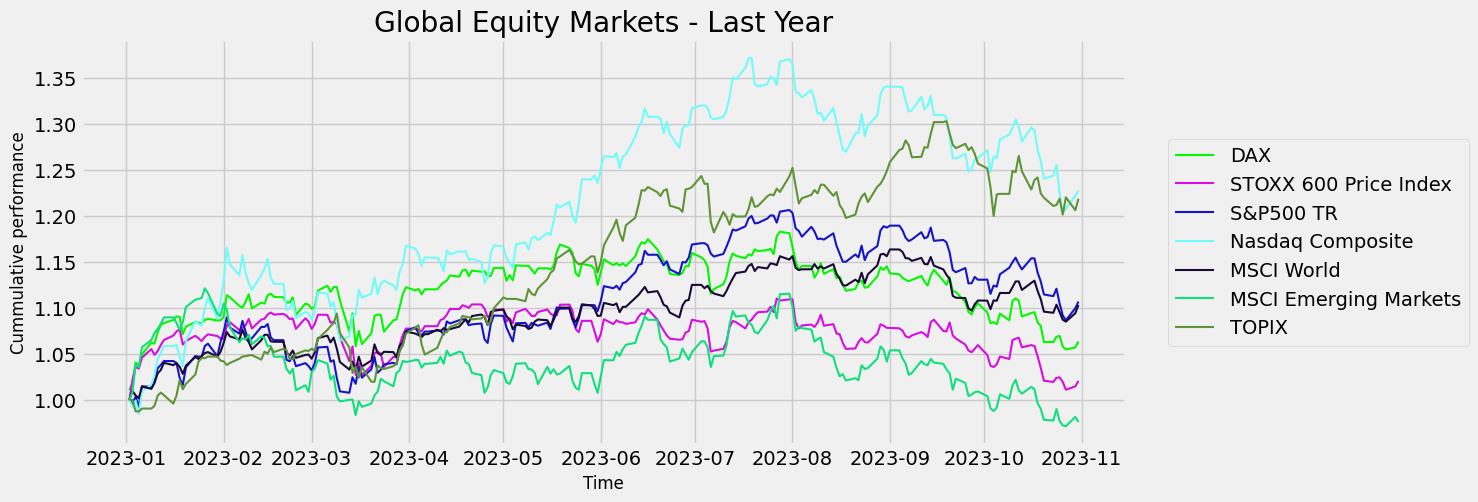

In [ ]:
df_indices_ret = df_indices_ret.dropna()
df_index_cumulative_return = (1 + df_indices_ret).cumprod()
#Longer horizon
plt.figure(figsize=(12,5))
plt.xlabel('Time', size = 12)
plt.ylabel('Cummulative performance', size = 12)
for column in df_index_cumulative_return:
  plt.plot(df_index_cumulative_return.index, df_index_cumulative_return[column], label=column, color=np.random.rand(3,),linewidth=1.0)
plt.title("Global Equity Markets - Last Year")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show

#Since YTD
ytd_count = len(df_indices_ret.loc[df_indices_ret.index >= np.datetime64(datetime.now().date().replace(month=1, day=1))])
df_indices_ret_ytd = df_indices_ret.tail(ytd_count).copy()
df_index_cumulative_return_ytd= (1 + df_indices_ret_ytd).cumprod()

plt.figure(figsize=(12,5))
plt.xlabel('Time', size = 12)
plt.ylabel('Cummulative performance', size = 12)
for column in df_index_cumulative_return_ytd:
  plt.plot(df_index_cumulative_return_ytd.index, df_index_cumulative_return_ytd[column], label=column, color=np.random.rand(3,),linewidth=1.5)
plt.title("Global Equity Markets - Last Year")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show

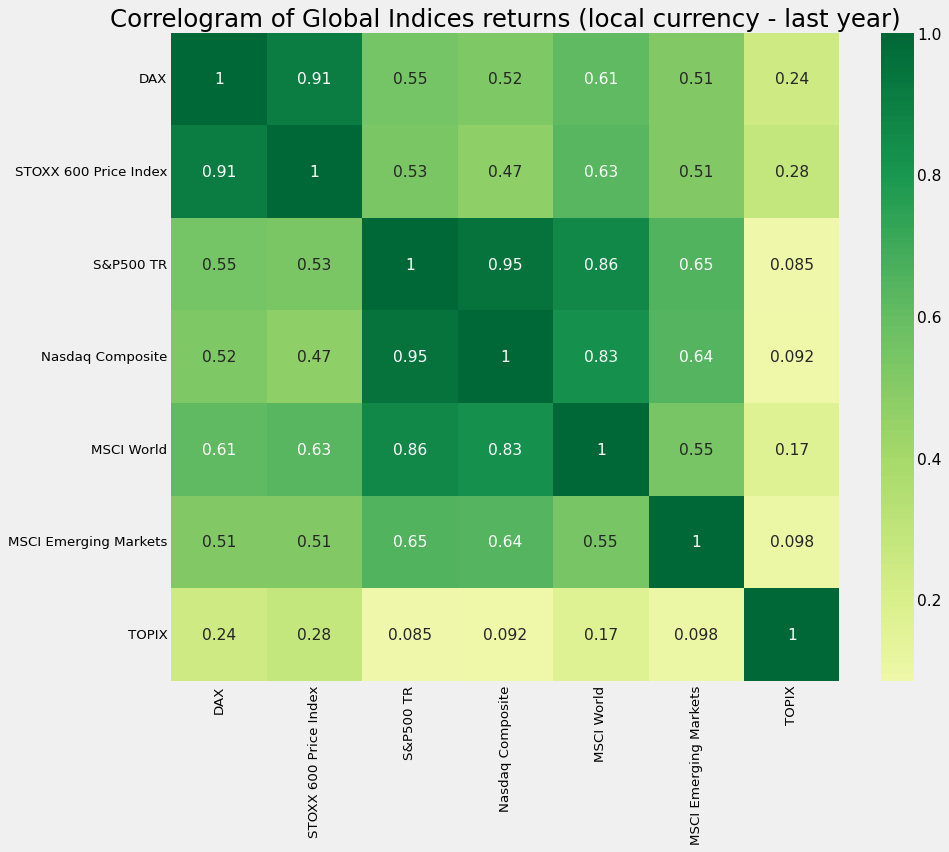

In [ ]:
df_indices_ret = df_indices_ret.dropna()
df_indices_ret = df_indices_ret.tail(252)
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df_indices_ret.corr(), xticklabels=df_indices_ret.corr().columns, yticklabels=df_indices_ret.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of Global Indices returns (local currency - last year)', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
#Wide to Long
df_indices_ret['Date'] = df_indices_ret.index
df_indices_ret_long = df_indices_ret.melt(id_vars=["Date"], var_name="Index", value_name="Return")

# Draw Plot
plt.figure(figsize=(12,10), dpi= 80)
fig, axes = joypy.joyplot(df_indices_ret_long, by="Index", ylim='own', figsize=(14,10))

# Decoration
plt.title('Distributions of Daily Global Indices returns (Last year)', fontsize=18)
plt.show()

S&P 500 - Sektoren

In [ ]:
df_gics = yfin_query(gics_id, gics_dict)
df_gics_ret = df_gics.pct_change()
df_gics_res = calculate_returns(df_gics_ret)
df_gics_res

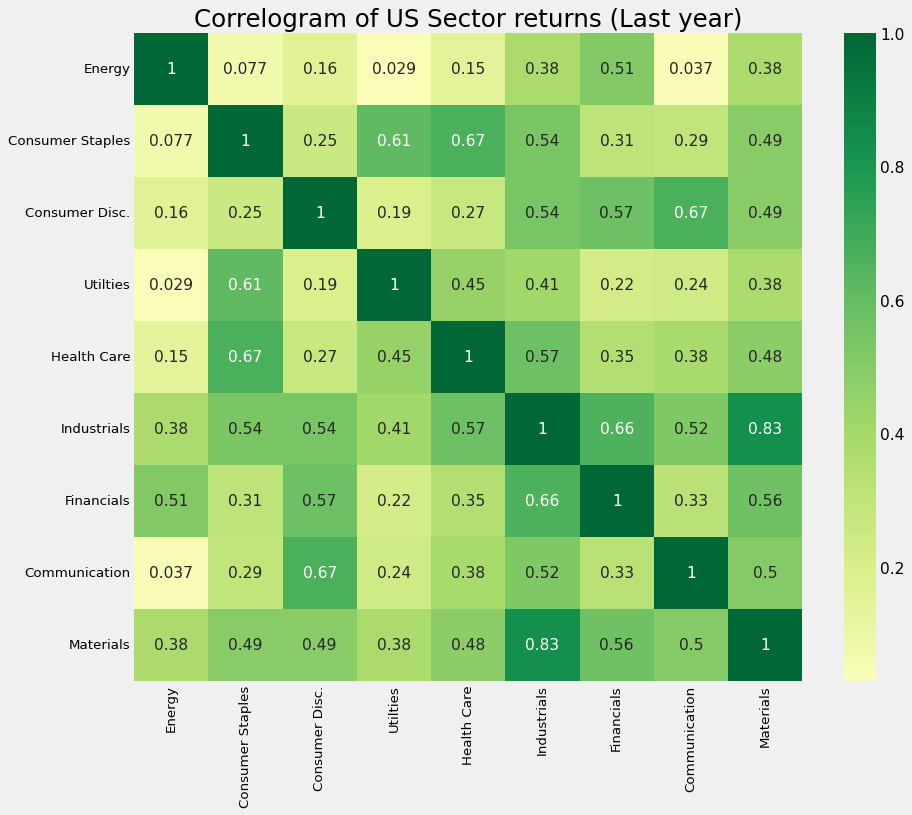

In [ ]:
df_gics_ret = df_gics_ret.dropna()
df_gics_ret = df_gics_ret.drop('Info Tech', axis=1)
df_gics_ret = df_gics_ret.tail(252)

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df_gics_ret.corr(), xticklabels=df_gics_ret.corr().columns, yticklabels=df_gics_ret.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of US Sector returns (Last year)', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Figure size 960x800 with 0 Axes>

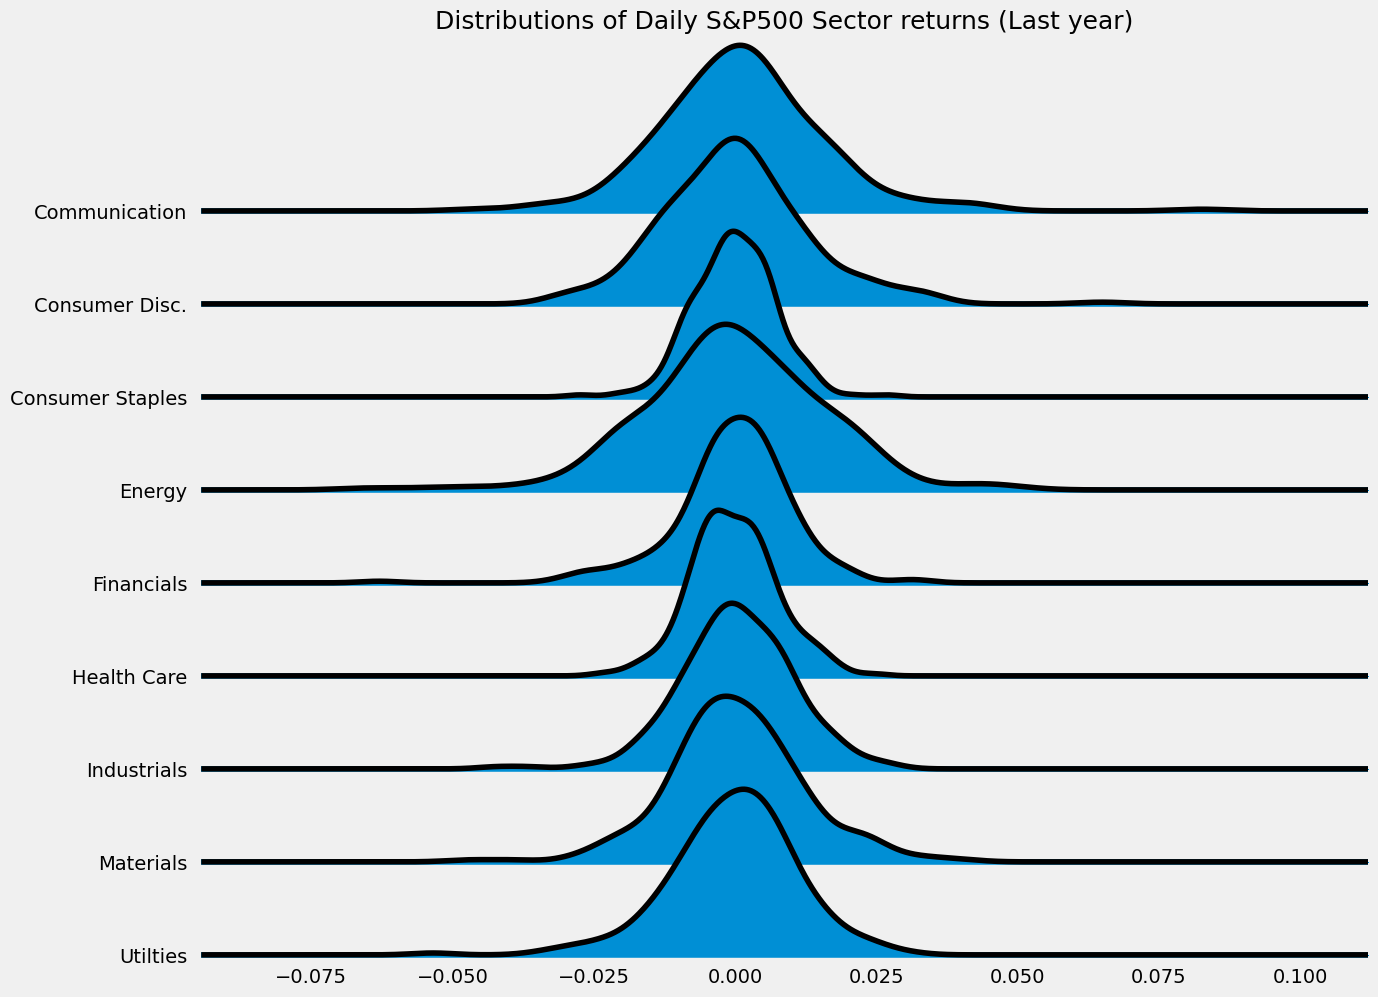

In [ ]:
#Wide to Long
df_gics_ret['Date'] = df_gics_ret.index
df_gics_ret_long = df_gics_ret.melt(id_vars=["Date"], var_name="Sector", value_name="Return")

# Draw Plot
plt.figure(figsize=(12,10), dpi= 80)
fig, axes = joypy.joyplot(df_gics_ret_long, by="Sector", ylim='own', figsize=(14,10))

# Decoration
plt.title('Distributions of Daily S&P500 Sector returns (Last year)', fontsize=18)
plt.show()

Available Future

In [ ]:
df_fut = yfin_query(index_future_id, index_future_dict)
df_fut_ret = df_fut.pct_change()
df_fut_res = calculate_returns(df_fut_ret)
df_fut_res

Top Flop Stocks

In [ ]:
test_ss_id = ["MMM","AOS","ABT","ABBV","ACN","ATVI","ADM","ADBE","ADP","AAP","AES","A","APD","AKAM","ALK","ALB","ARE","ALGN","ALLE","LNT","ALL","GOOGL","GOOG","MO","AMZN","AMCR","AMD"]
test_ss_dict = {"MMM":"MMM","AOS":"AOS","ABT":"ABT","ABBV":"ABBV","ACN":"ACN","ATVI":"ATVI","ADM":"ADM","ADBE":"ADBE","ADP":"ADP","AAP":"AAP","AES":"AES","A":"A","APD":"APD","AKAM":"AKAM","ALK":"ALK","ALB":"ALB","ARE":"ARE","ALGN":"ALGN","ALLE":"ALLE","LNT":"LNT","ALL":"ALL","GOOGL":"GOOGL","GOOG":"GOOG","MO":"MO","AMZN":"AMZN","AMCR":"AMCR","AMD":"AMD"}

df_test_ss = yfin_query(SP500_members_id, SP500_members_dict)                               #Ab dann Transformation: 1.Zeitreihe abschneiden -->Total Return
#df_test_ss = yfin_query(test_ss_id, test_ss_dict)

197


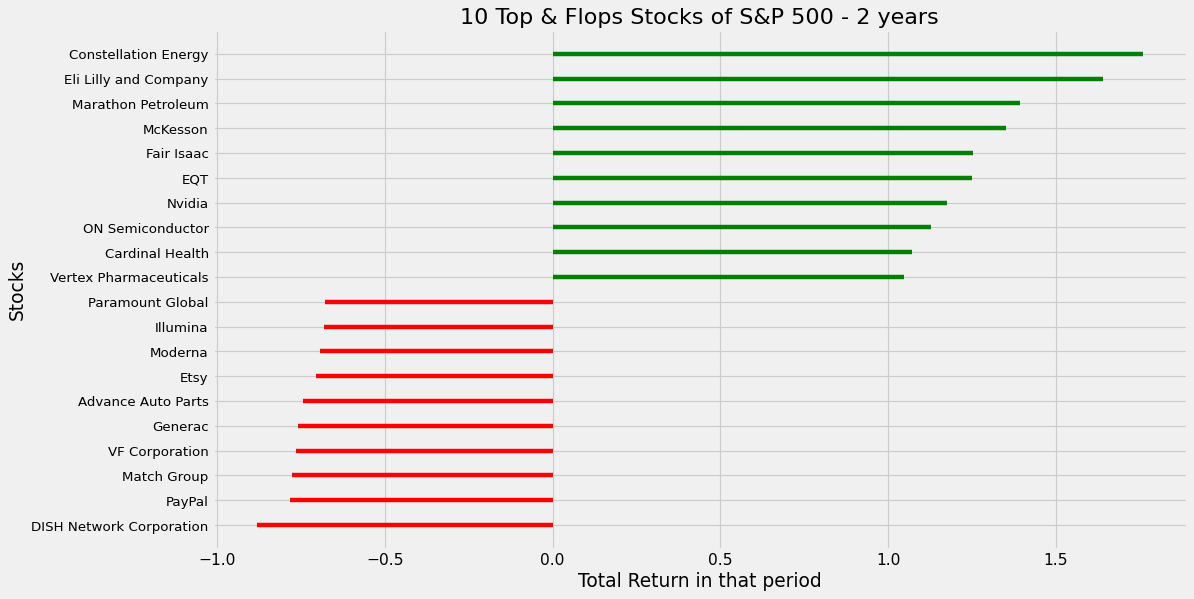

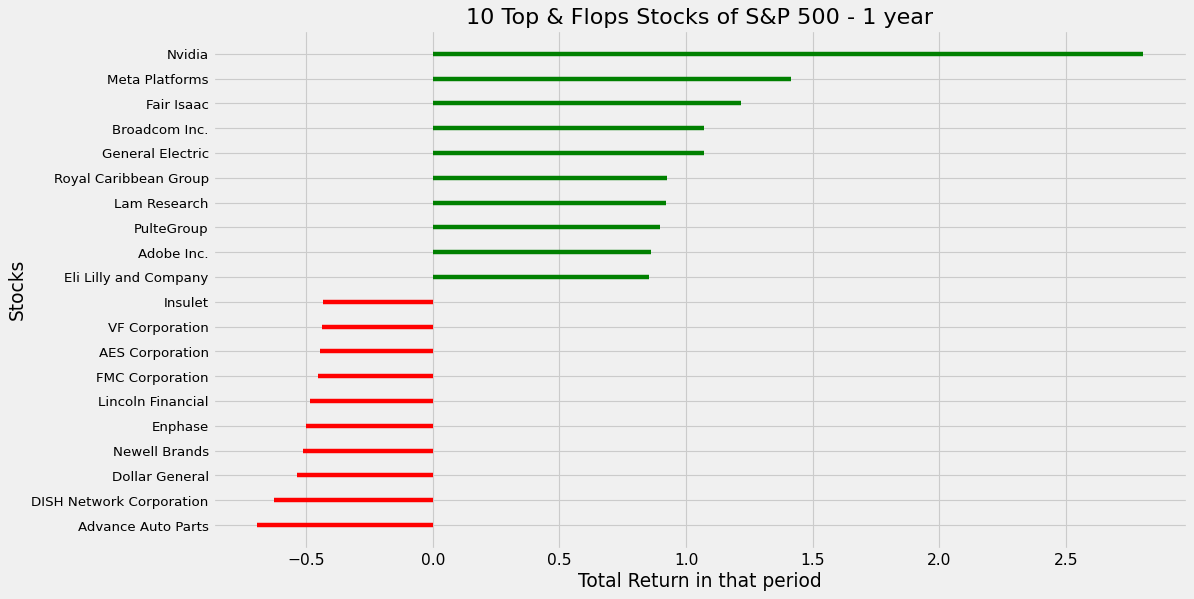

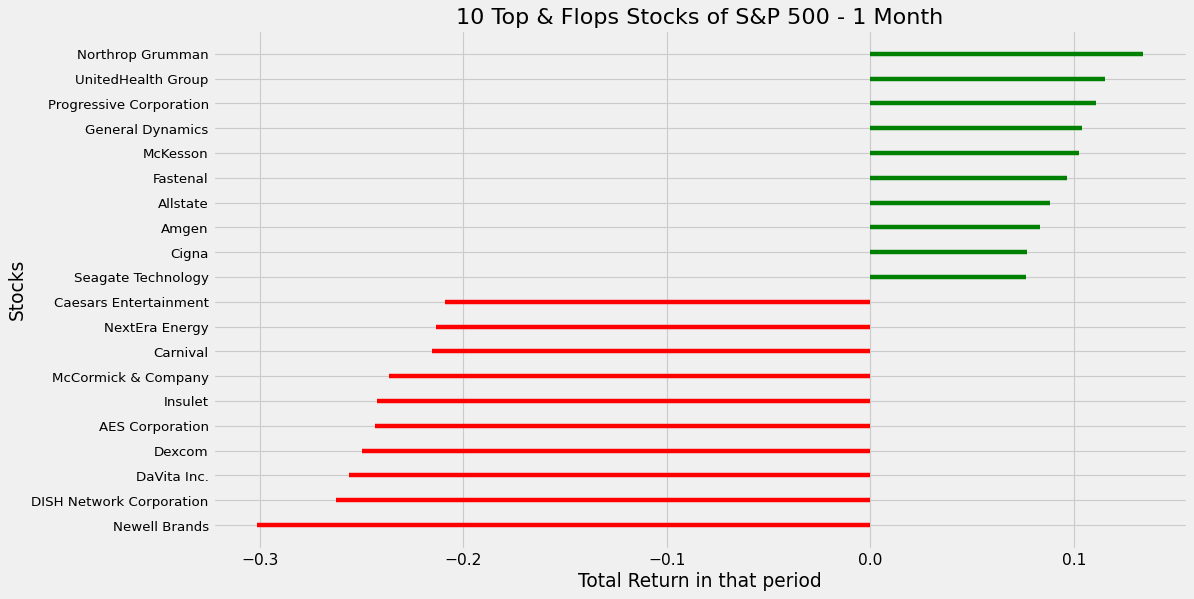

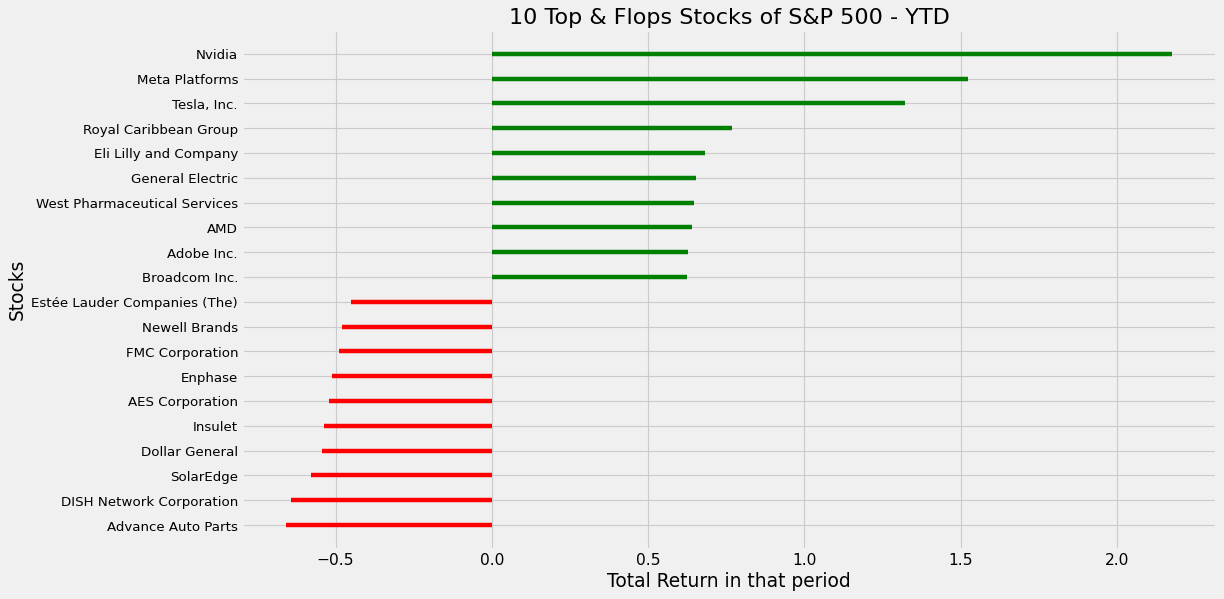

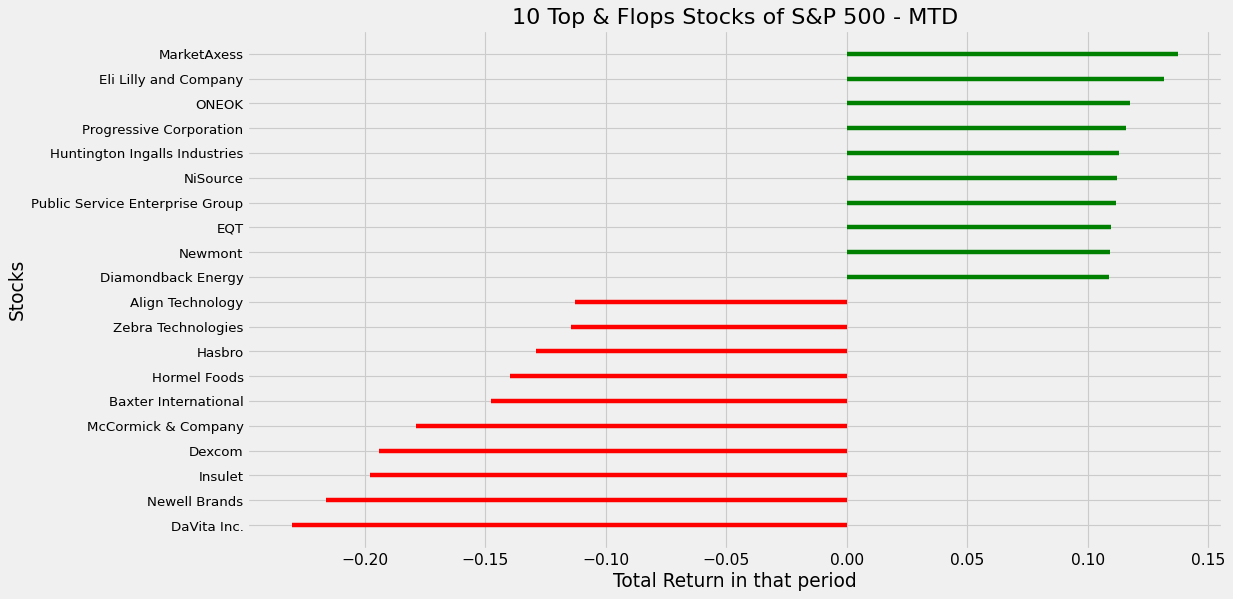

In [ ]:
#Get YTD and MTD counts, to extend list and dict
ytd_count = len(df_test_ss.loc[df_test_ss.index >= np.datetime64(datetime.now().date().replace(month=1, day=1))])
mtd_count = len(df_test_ss.loc[df_test_ss.index >= np.datetime64(datetime.now().date().replace(day=1))])
print(ytd_count)
stock_count = 10
freq_list = [504, 252, 22, ytd_count]
freq_dict = {504:"2 years", 252:"1 year",22:"1 Month", ytd_count:"YTD" }
if mtd_count != 0:                                                              #Sonderfall: Am Anfang des Monats könnte es zu Problemen kommen
  freq_list.append(mtd_count)
  freq_dict.update({mtd_count:"MTD"})

for freq in freq_list:
  df_cust = df_test_ss.tail(freq).copy()                                                                    #Deep Copy + abschneiden
  df_cust=df_cust.fillna(method='ffill')
  df_cust = df_cust.pct_change()
  df_cust = (1+ df_cust).cumprod()
  df_cust = df_cust.tail(1)-1
  df_cust['Date'] = df_cust.index
  df_cust_long = df_cust.melt(id_vars=["Date"], var_name="Stock", value_name="Return")
  df_cust_long.sort_values("Return", inplace=True)
  df_cust_long.reset_index(drop=True, inplace=True)                                                                               #Wenn das scheitert, gibt es zu viele
  df_cust_long = df_cust_long.loc[(df_cust_long.index < stock_count) | (df_cust_long.index >= (len(df_cust_long)-stock_count))]
  df_cust_long["color"] = ['red' if x < stock_count else 'green' for x in df_cust_long.index]
  df_cust_long.reset_index(drop=True, inplace=True)
  # Draw plot
  plt.figure(figsize=(14,8), dpi= 80)
  plt.hlines(y=df_cust_long.index, xmin=0, xmax=df_cust_long.Return, color=df_cust_long.color)

  #Decorations
  plt.gca().set(ylabel='Stocks', xlabel='Total Return in that period')
  plt.yticks(df_cust_long.index, df_cust_long.Stock, fontsize=12)
  plt.title(str(stock_count)+' Top & Flops Stocks of S&P 500 - ' + str(freq_dict[freq]), fontdict={'size':20})
  #plt.grid(linestyle='--', alpha=0.5)
  plt.show()

# **Option Data**

###Query Functions

In [ ]:
def yfin_opt_query(ticker):
  from datetime import datetime
  all_results = []
  exp_dates = op.get_expiration_dates(ticker)                                     #1. Expirations-Dates abgreifen
  for exp in exp_dates:
    try:
      call_data = op.get_calls(ticker, date = exp)
      call_data["type"]=str("Call")
      call_data["exp_dates"] = exp
      all_results.append(call_data)
      put_data = op.get_puts(ticker,  date = exp)
      put_data["type"] = str("Put")
      put_data["exp_dates"] = exp
      all_results.append(put_data)
    except:
      None

  #Alle dataframes zusammenpacken und dann gemäß Dict umbennen
  df_yfin_results = pd.concat(all_results,axis =0)
  df_yfin_results["exp_dates"] = pd.to_datetime(df_yfin_results["exp_dates"], format='%B %d, %Y')
  df_yfin_results['Implied Volatility'] = (df_yfin_results['Implied Volatility'].str.replace('%', ''))
  df_yfin_results['Implied Volatility'] = (pd.to_numeric(df_yfin_results['Implied Volatility'], errors='coerce')) /100
  df_yfin_results['Open Interest'] = pd.to_numeric(df_yfin_results['Open Interest'], errors='coerce')
  df_yfin_results["exp_days"] = round(((df_yfin_results["exp_dates"] - datetime.today()) / np.timedelta64(1, 's'))/(24*60*60),1)  #ACHTUNG: KORRIGIEREN
  df_yfin_results = df_yfin_results.rename(columns={'Contract Name': 'contract_name', 'Last Trade Date': 'last_trade_date', "Strike":"strike","Last Price":"last_price", "Bid":"bid","Ask":"ask","Change":"change","% Change":"change_in_%","Volume":"volume","Open Interest":"open_interest","Implied Volatility":"implied_volatility"})
  return df_yfin_results

def last_close_underlying(ticker):
  start="2023-01-01"
  end = datetime.today().strftime("%Y-%m-%d")
  df_curr_value = pdr.get_data_yahoo(ticker, start=start, end=end,progress=False)
  df_curr_value = df_curr_value["Close"].tail(1)
  curr_value = df_curr_value[0]
  return curr_value

def myround(x, base=50):
    return base * round(x/base)

###Option specific functions

In [ ]:
#Black Schooles Formel
def option_bs(type, stock ,strike, rate, vola, T):
    d1= (np.log(stock/strike)+(rate+0.5*vola**(2))*T)/(vola*(T)**0.5)
    d2= d1 - vola * T**0.5
    if type=="Call":
      price= stock*norm.cdf(d1)-strike*(e**(-rate*T)) *norm.cdf(d2)
    elif type=="Put":
      price= strike*(e**(-rate*T))*(1-norm.cdf(d2))-stock*(1-norm.cdf(d1))
    return price

In [ ]:
def impli_vola(price, type, stock ,strike ,rate ,T):
  vola1=4                                                                   #Unterer Anfangsschätzer
  vola2=0.001                                                               #Oberer Anfangsschätzer
  est_value= option_bs(type, stock, strike, rate, vola1, T)
  while price - est_value <0.001 or est_value -price >0.001:
    vola_new=(vola1+vola2)*0.5
    est_value = option_bs(type, stock, strike, rate, vola_new, T)
    if est_value < price:
      vola2= vola_new
    elif est_value >= price:
      vola1= vola_new
  return vola_new

###Charts

In [ ]:
df_test = yfin_opt_query("^SPX")
df_sp = df_test.copy()

Protective Put & Covered Call Strategy - Calculation

In [ ]:
last_close = last_close_underlying("^SPX")
#Protective Put
df_sp_puts = df_test.loc[(df_test["type"]=="Put")].copy()
df_sp_puts["hedge_level"] = df_sp_puts["strike"] - df_sp_puts["ask"]
df_sp_puts["max_loss"] = df_sp_puts["hedge_level"] / last_close - 1
df_sp_puts["breakeven"] = (last_close + df_sp_puts["ask"]) / last_close - 1
df_sp_puts = df_sp_puts.loc[(df_sp_puts["type"]=="Put") & (df_sp_puts["strike"]>1500) & (df_sp_puts["strike"]<7000) & (df_sp_puts["exp_days"] > 30) & (df_sp_puts["ask"] > 0) & (df_sp_puts["implied_volatility"] > 0)]

#Covered Call
df_sp_calls = df_test.loc[(df_test["type"]=="Call")].copy()
df_sp_calls["initial_gain"] = (df_sp_calls["last_price"] + last_close) / last_close -1
df_sp_calls["max_gain"] = (df_sp_calls["strike"] + df_sp_calls["last_price"]) / last_close -1
df_sp_calls = df_sp_calls.loc[(df_sp_calls["type"]=="Call") & (df_sp_calls["strike"]>1500) & (df_sp_calls["strike"]<7000) & (df_sp_calls["strike"] > last_close) & (df_sp_calls["exp_days"] > 30) & (df_sp_calls["ask"] > 0) & (df_sp_calls["implied_volatility"] > 0)]

Protective Puts - Chart

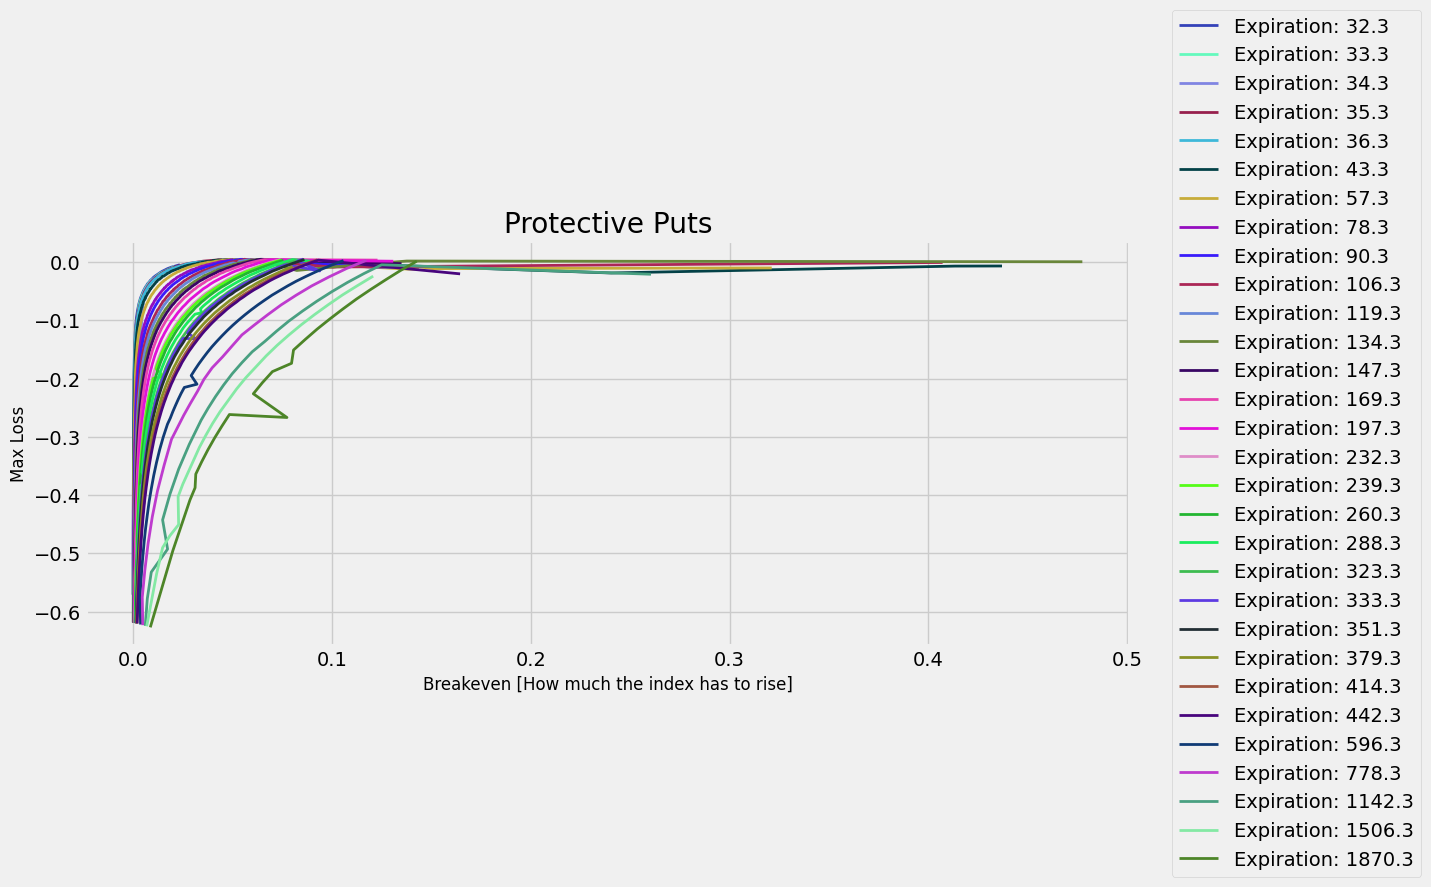

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel('Breakeven [How much the index has to rise]', size = 12)
plt.ylabel('Max Loss', size = 12)
for days in df_sp_puts['exp_days'].unique():
  plt.plot(df_sp_puts.loc[df_sp_puts["exp_days"] == days,"breakeven"], df_sp_puts.loc[df_sp_puts["exp_days"] == days,"max_loss"], label="Expiration: "+str(days), color=np.random.rand(3,),linewidth=2.0)

plt.title("Protective Puts")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show
savefig('Protective_Puts.png')

Covered Call - Chart

<function matplotlib.pyplot.show(close=None, block=None)>

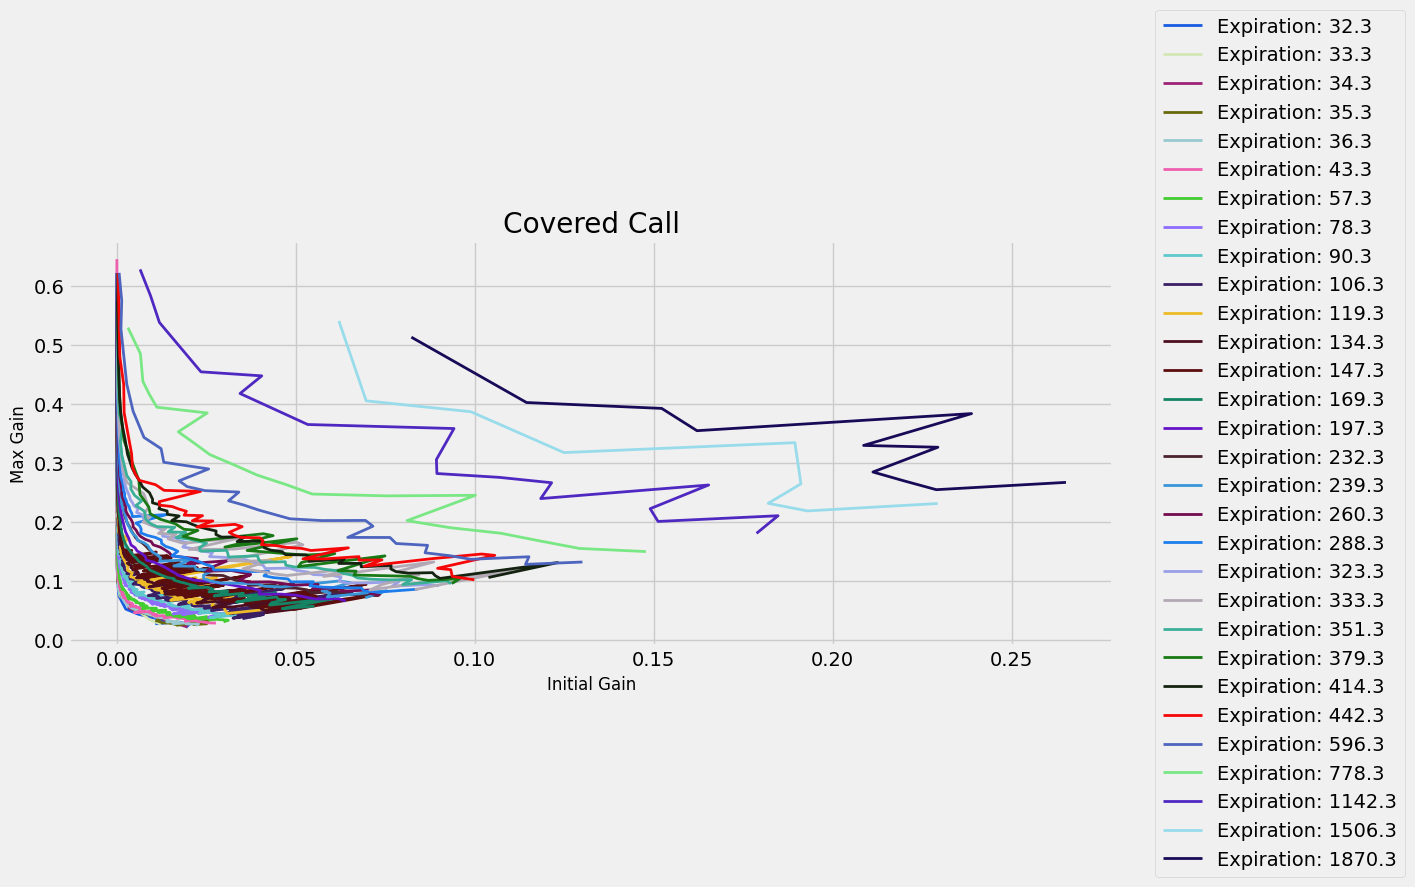

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel('Initial Gain', size = 12)
plt.ylabel('Max Gain', size = 12)
for days in df_sp_calls['exp_days'].unique():
  plt.plot(df_sp_calls.loc[df_sp_calls["exp_days"] == days,"initial_gain"], df_sp_calls.loc[df_sp_calls["exp_days"] == days,"max_gain"], label="Expiration: "+str(days), color=np.random.rand(3,),linewidth=2.0)

plt.title("Covered Call")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show

Datenaufbreitung für Zero Cost Collar & Straddle / Strangle

In [ ]:
last_close = last_close_underlying("^SPX")
#Pre Sort the Calls [größer als Indexwert] and Puts [kleiner als Indexwert]
df_collar_puts = df_test.loc[(df_test["type"]=="Put") & (df_test["strike"]<= last_close) & (df_test["exp_days"] > 30)  & (df_test["implied_volatility"] > 0) & (df_test["ask"] > 0)].drop(columns=["last_trade_date", "change","change_in_%","volume","open_interest","implied_volatility","exp_dates"], axis = 1).copy()
df_collar_calls = df_test.loc[(df_test["type"]=="Call") & (df_test["strike"] >= last_close)& (df_test["exp_days"] > 30) &  (df_test["ask"] > 0) & (df_test["implied_volatility"] > 0) & (df_test["ask"] > 0)].drop(columns=["last_trade_date", "change","change_in_%","volume","open_interest","implied_volatility","exp_dates"], axis = 1).copy()
#Round Prices for convinience (does not matter, because zero cost, so just small deviation)
df_collar_puts["ask"] = round(df_collar_puts["ask"])
df_collar_calls["ask"] = round(df_collar_calls["ask"])
df_collar_puts["approx_abs_moneyness"] = myround(x=last_close, base=50) - df_collar_puts["strike"]
df_collar_calls["approx_abs_moneyness"] = df_collar_calls["strike"] - myround(x=last_close, base=50)

Zero Cost Collar - Calculation

In [ ]:
#Merge datasets on exp_days and price to get matches
df_collar = df_collar_puts.merge(df_collar_calls, how='inner', left_on=['ask', 'exp_days'], right_on=['ask', 'exp_days'])
df_collar = df_collar.loc[df_collar["ask"]>0]
df_collar["max_gain"] = (df_collar["strike_y"]) / last_close -1
df_collar["max_loss"] = (df_collar["strike_x"]) / last_close -1

max_gain_maxes = df_collar.groupby(['max_loss','exp_days']).max_gain.transform(max)
df_collar = df_collar.loc[(df_collar.max_gain == max_gain_maxes)]
max_loss_mins = df_collar.groupby(['max_gain','exp_days']).max_loss.transform(min)
df_collar = df_collar.loc[(df_collar.max_loss == max_loss_mins)]

Zero Cost Collar - Chart

In [ ]:
for days in df_collar['exp_days'].unique():
  plt.figure(figsize=(12,5))
  plt.xlabel('Max Loss', size = 12)
  plt.ylabel('Max Gain', size = 12)
  plt.plot(df_collar.loc[df_collar["exp_days"] == days,"max_loss"], df_collar.loc[df_collar["exp_days"] == days,"max_gain"], label="Expiration: "+str(days), color="deepskyblue",linewidth=2.0)
  plt.plot(df_collar.loc[df_collar["exp_days"] == days,"max_loss"], df_collar.loc[df_collar["exp_days"] == days,"max_gain"], label="Expiration: "+str(days), marker = "x", color="red",linewidth=2.0)
  plt.title("Zero Cost Collar")
  plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
  plt.show  #

<function matplotlib.pyplot.show(close=None, block=None)>

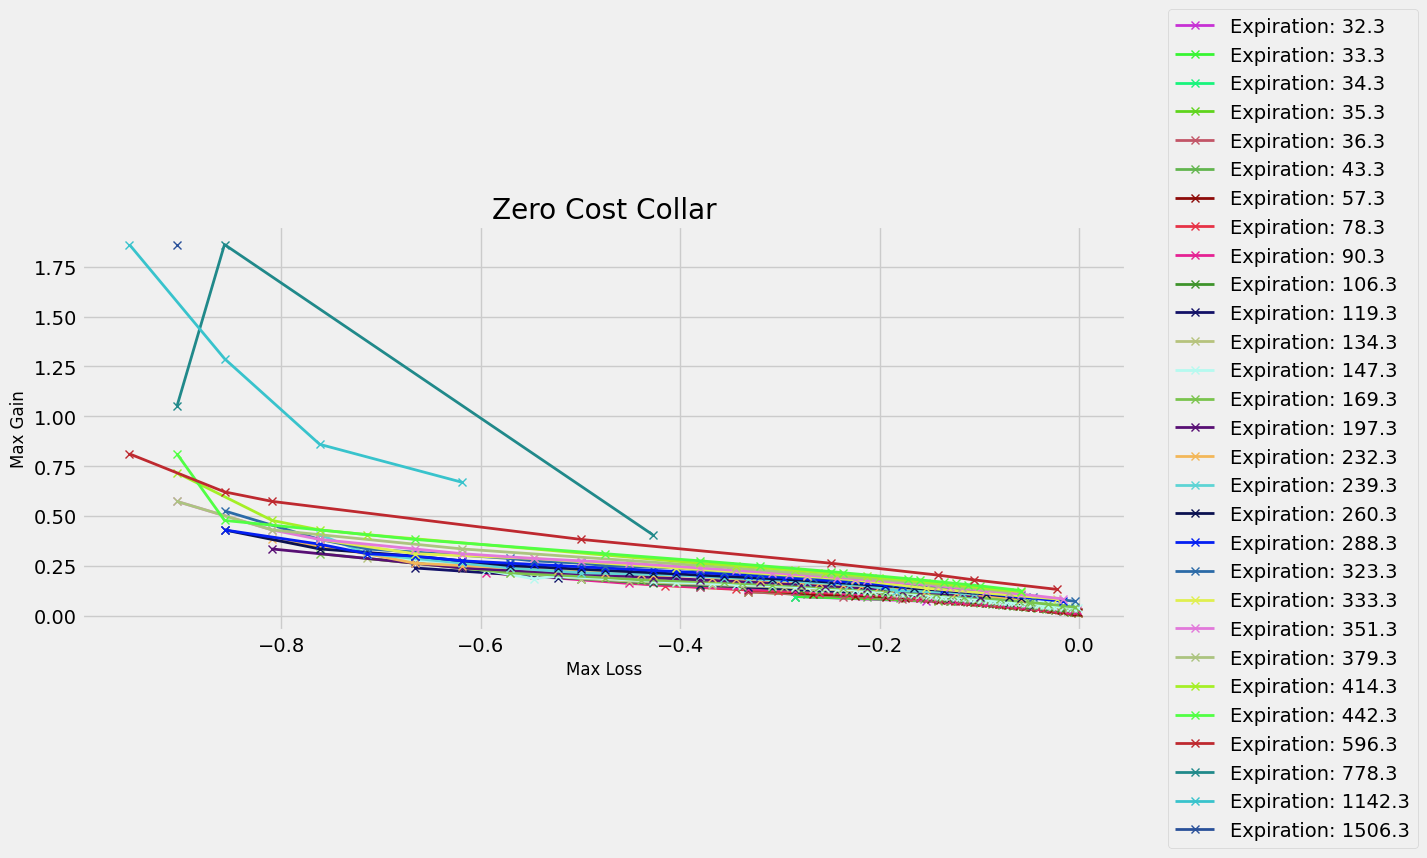

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel('Max Loss', size = 12)
plt.ylabel('Max Gain', size = 12)
for days in df_collar['exp_days'].unique():
  plt.plot(df_collar.loc[df_collar["exp_days"] == days,"max_loss"], df_collar.loc[df_collar["exp_days"] == days,"max_gain"], label="Expiration: "+str(days), marker = "x", color=np.random.rand(3,),linewidth=2.0)
plt.title("Zero Cost Collar")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show

Straddle / Strangle Berechnung

In [ ]:
df_straddle = df_collar_puts.merge(df_collar_calls, how='inner', left_on=['approx_abs_moneyness', 'exp_days'], right_on=['approx_abs_moneyness', 'exp_days'])
df_straddle["strategy_cost"] = df_straddle["ask_x"] + df_straddle["ask_y"]
df_straddle["high_breakthrough"] = ((df_straddle["approx_abs_moneyness"]+ df_straddle["strategy_cost"]) + myround(x=last_close, base=50)) / myround(x=last_close, base=50) -1
df_straddle["low_breakthrough"] = (myround(x=last_close, base=50) - (df_straddle["approx_abs_moneyness"]+ df_straddle["strategy_cost"])) / myround(x=last_close, base=50) -1

Straddle / Strangle - Chart

<function matplotlib.pyplot.show(close=None, block=None)>

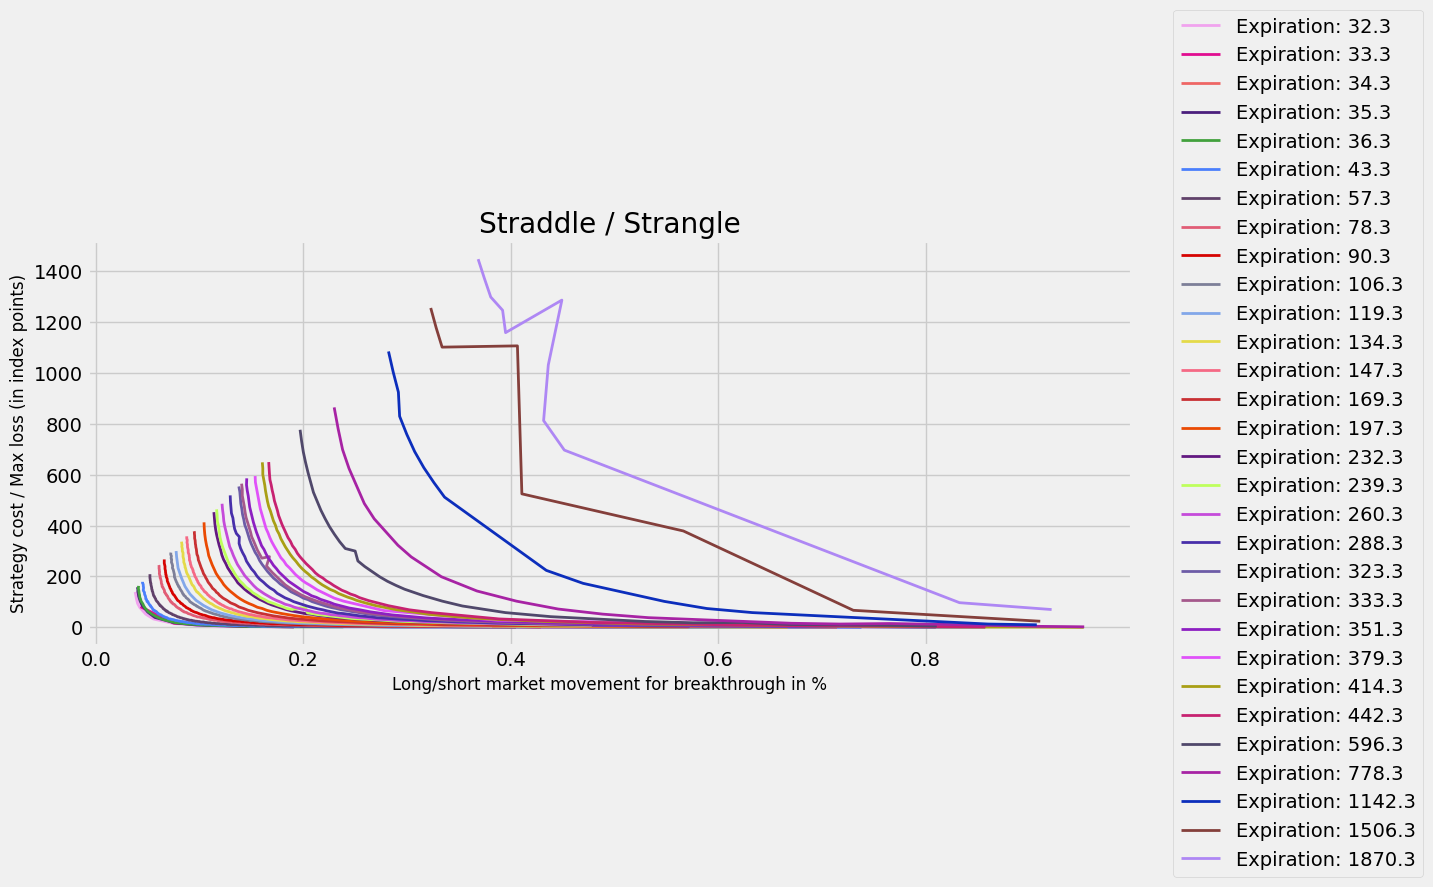

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel('Long/short market movement for breakthrough in %', size = 12)
plt.ylabel('Strategy cost / Max loss (in index points)', size = 12)
for days in df_straddle['exp_days'].unique():
  plt.plot(df_straddle.loc[df_straddle["exp_days"] == days,"high_breakthrough"], df_straddle.loc[df_straddle["exp_days"] == days,"strategy_cost"] , label="Expiration: "+str(days), color=np.random.rand(3,),linewidth=2.0)

plt.title("Straddle / Strangle")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show

Option Surface

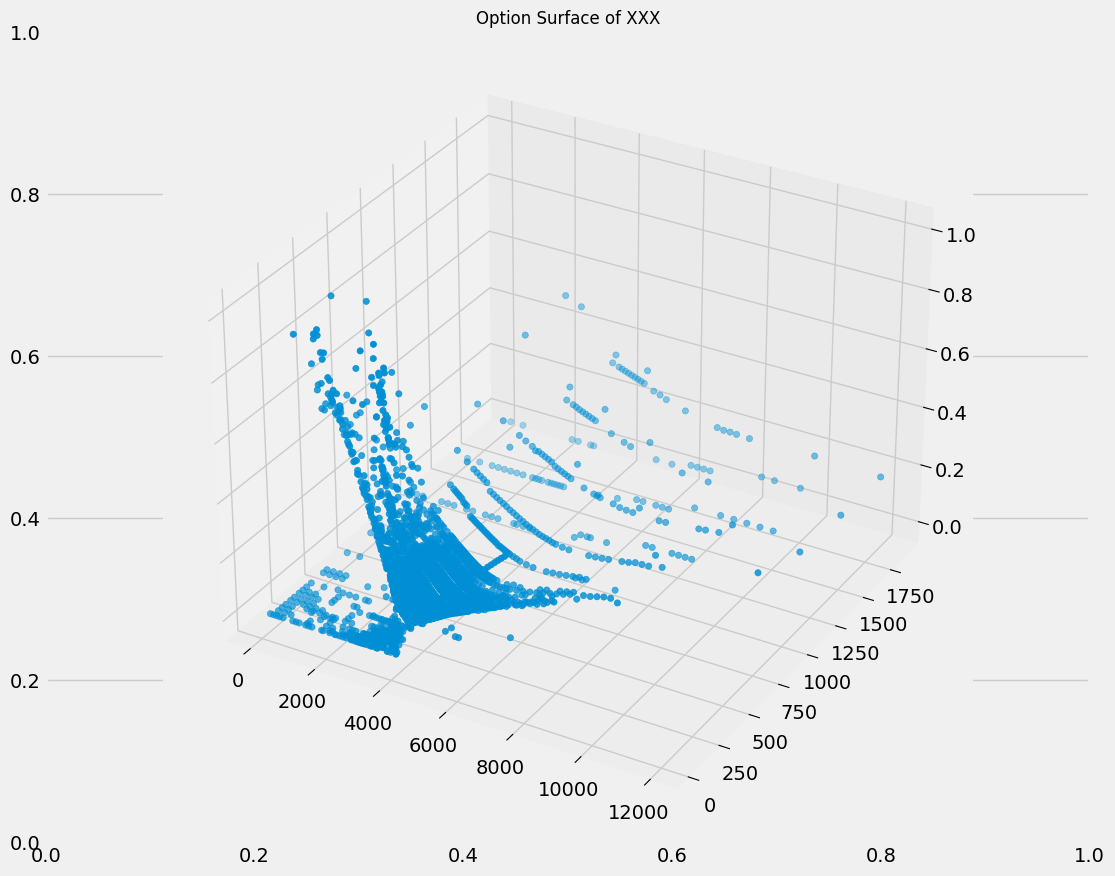

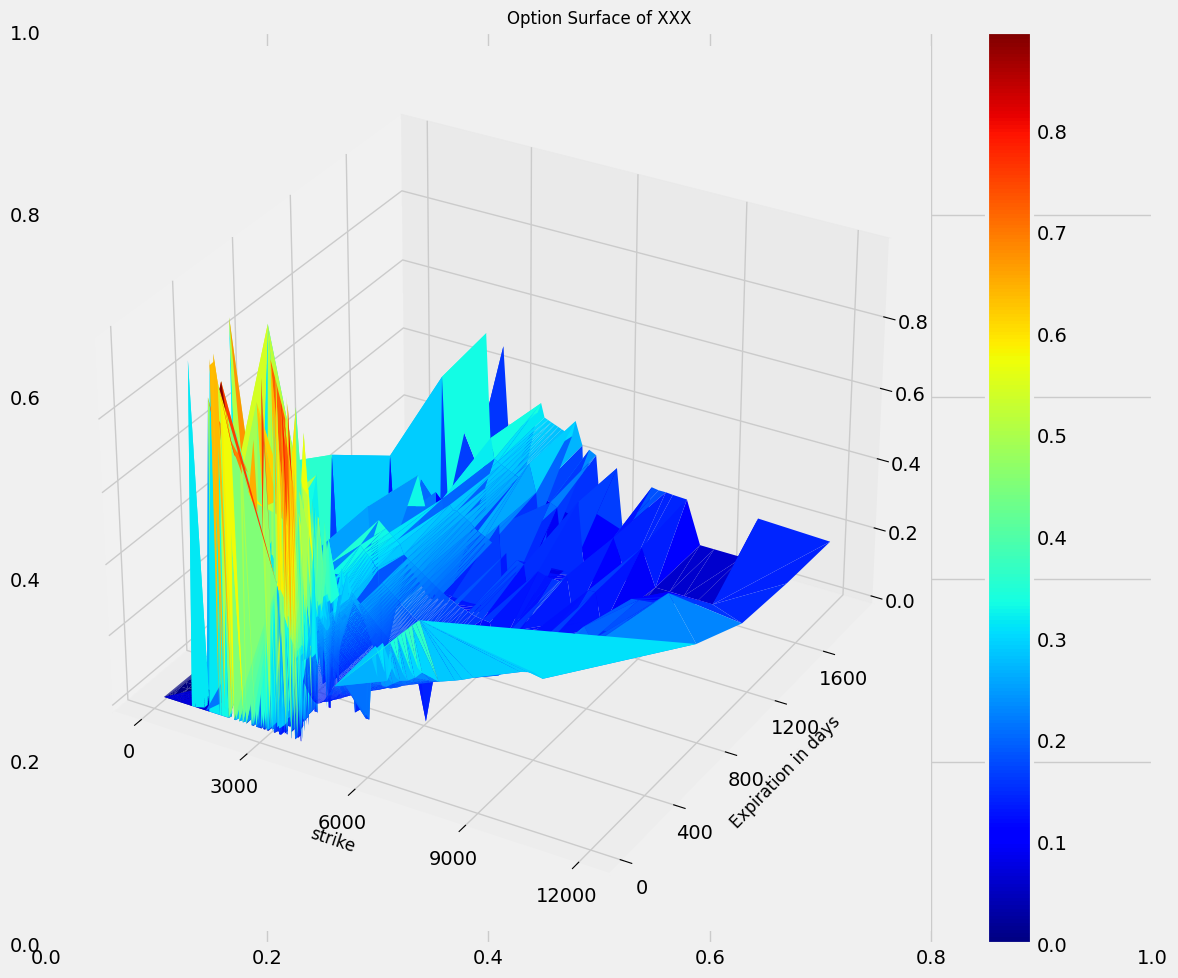

In [ ]:
df_test_calls = df_test.loc[(df_test["type"]=="Call")]
df_test_calls = df_test_calls.loc[(df_test_calls["implied_volatility"] < 1)]
df_test_calls = df_test_calls.loc[(df_test_calls["exp_days"] >= 30)]
df_test_calls.describe()

#Plot Option Surfface
fig = plt.figure(figsize=(12,10))
plt.title("Option Surface of XXX", fontsize=12)
ax = plt.axes(projection = "3d")
ax.scatter(df_test_calls["strike"], df_test_calls["exp_days"], df_test_calls["implied_volatility"])
plt.show()

fig = plt.figure(figsize=(12,10))
plt.title("Option Surface of XXX", fontsize=12)
ax = fig.add_subplot(111, projection='3d')
plt.xlabel('strike', size = 12)
plt.ylabel('Expiration in days', size = 12)
surf = ax.plot_trisurf(df_test_calls["strike"], df_test_calls["exp_days"], df_test_calls["implied_volatility"], cmap=cm.jet, linewidth=0)
fig.colorbar(surf)
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.zaxis.set_major_locator(MaxNLocator(5))
fig.tight_layout()
plt.show()

# **Fundamental Data**

###Funktionen zum Sammeln & Bearbeiten

In [ ]:
def string_to_int_yfin(value):
  if value[-1] == "T":
    return float(value[0:-1])*1000000000000
  elif value[-1] == "B":
    return float(value[0:-1])*1000000000
  elif value[-1] == "M":
    return float(value[0:-1])*1000000
  else:
    return float(value)

In [ ]:
def yfin_fundamental_query(list_name):
  all_results = []
  current_date = datetime.now().strftime("%m/%d/%Y")
  #Durch Liste loopen, alle Zeitreihen aus FRED ziehen & in df temporär speichern
  for myid in list_name:
    results= si.get_stats_valuation(myid)
    results["stock"] = myid
    results.rename(columns={results.columns[0]:"variable",results.columns[1]: current_date}, inplace = True)
    results = results.melt(id_vars=["variable","stock"], var_name="date", value_name="value")
    all_results.append(results)
  #Alle dataframes zusammenpacken und Transformationen durchführen
  df_fundamentals = pd.concat(all_results,axis =0)
  df_fundamentals = df_fundamentals[df_fundamentals['value'].isnull()==False]
  df_fundamentals["value"] = df_fundamentals["value"].apply(string_to_int_yfin)
  df_fundamentals = df_fundamentals.pivot(index=["stock","date"],columns=["variable"])
  df_fundamentals.columns = df_fundamentals.columns.droplevel(0) #remove amount
  df_fundamentals.columns.name = None                            #remove categories
  df_fundamentals = df_fundamentals.reset_index()                #index to columns
  df_fundamentals['date'] = pd.to_datetime(df_fundamentals['date'], format="%m/%d/%Y")
  df_fundamentals.sort_values(by=["stock","date"], inplace=True)
  return df_fundamentals

##Sammlung von IDs

In [ ]:
big_tech_id = ["aapl","msft","goog","meta"]

##Charts

In [ ]:
df_big_tech = yfin_fundamental_query(big_tech_id)
df_big_tech

<function matplotlib.pyplot.show(close=None, block=None)>

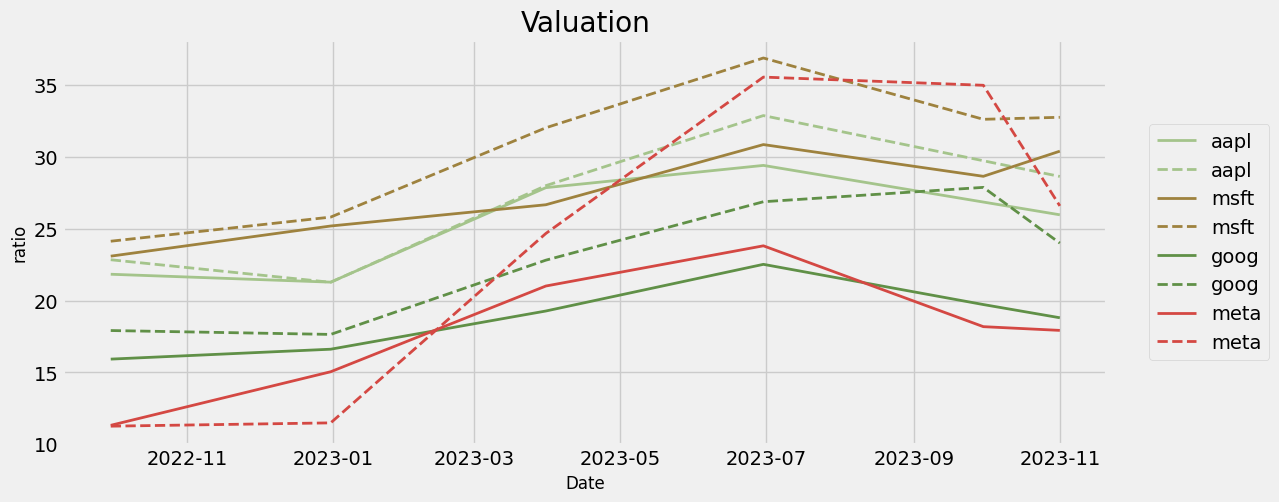

In [ ]:
df_big_tech = yfin_fundamental_query(big_tech_id)
df_big_tech
i = 0
'Chart with valuation metrics'
plt.figure(figsize=(12,5))
plt.xlabel('Date', size = 12)
plt.ylabel('ratio', size = 12)
for sec in big_tech_id:
  line_color = np.random.rand(3,)
  plt.plot(df_big_tech.loc[df_big_tech["stock"] == sec,"date"], df_big_tech.loc[df_big_tech["stock"] == sec,"Forward P/E"], label=sec, color=line_color,linewidth=2.0)
  plt.plot(df_big_tech.loc[df_big_tech["stock"] == sec,"date"], df_big_tech.loc[df_big_tech["stock"] == sec,"Trailing P/E"], label=sec, color=line_color,linewidth=2.0, linestyle = '--')
plt.title("Valuation")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show

# **EU Data**

In [ ]:
!pip install xmltodict > /dev/null
from urllib.request import urlopen
from xmltodict import parse

In [ ]:
def QueryECB(series):
    with urlopen("https://sdw-wsrest.ecb.europa.eu/service/data/" + series) as url:
         raw = parse(url.read().decode('utf8'))
    data = raw['message:GenericData']['message:DataSet']['generic:Series']['generic:Obs']
    res = {x['generic:ObsDimension']['@value']:
           float(x['generic:ObsValue']['@value'])
           for x in data}
    return res

In [ ]:
res = QueryECB("EXR/D.CAD.EUR.SP00.A")
res2 = QueryECB("FM/A.U2.EUR.RT.MM.EURIBOR3MD_.HSTA")

res2